# IMPORTS:

In [ ]:
!pip install dalex -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.6.0-py3-none-any.whl size=1045995 sha256=1e2b02571d299b2615b0f0ee1b2e07dd96b3a37b3025aa72afce1ba9987ffa61
  Stored in directory: /root/.cache/pip/wheels/c8/45/19/f5810bf7c5ff9a476ebd89bb5b81a18ffcdf93931d17dbb0c1
Successfully built dalex


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=fcba117633dbf905ca09e0b180fe9f0b59aff43856dcdf69d0aeb93023a75d10
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
#imports necesarios
import pandas as pd
import numpy as np
from sklearn import svm
from scipy.stats import ttest_rel
from sklearn.svm import LinearSVR, NuSVR
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, RepeatedKFold
from sklearn.inspection import permutation_importance
from scipy.io.arff import loadarff
import statsmodels.api as sm
from sklearn.utils import resample
import dalex as dx
from sklearn.compose import ColumnTransformer
import seaborn as sns

In [ ]:
# Función para evaluar el signo de los valores
def evaluar_valor(valor):
    if valor >= 0:
        return "Positivo"
    else:
        return "Negativo"

In [ ]:
# Crear las columnas del MultiIndex
columns = pd.MultiIndex.from_tuples([
    ('Breakdown', 'Ranking'), ('Breakdown', 'Signo'),
    ('Shapley', 'Ranking'), ('Shapley', 'Signo'),
    ('Lime', 'Ranking'), ('Lime', 'Signo')
])

# Preprocesamiento:

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/TFM/ISBG_mod.xlsx")

In [ ]:
df

Data Quality Rating UFP rating Count Approach  \
0                      D          A          NESMA   
1                      B          A          IFPUG   
2                      B          A          IFPUG   
3                      B          A          IFPUG   
4                      B          A          IFPUG   
...                  ...        ...            ...   
4101                   B          A          IFPUG   
4102                   B          A          IFPUG   
4103                   B          A          IFPUG   
4104                   B          A          IFPUG   
4105                   A        NaN     COSMIC-FFP   

      Normalised Work Effort Level 1  Normalised Work Effort  \
0                             1850.0                  1850.0   
1                              856.0                   856.0   
2                             1100.0                  1100.0   
3                               28.0                    28.0   
4                                NaN                 23913.0   
...                              ...                     ...   
4101                          3748.0                 22478.0   
4102                          1214.0                  1214.0   
4103                           710.0                   960.0   
4104                             NaN                  2312.0   
4105                            60.0                    80.0   

      Summary Work Effort  Ratio Normalised Development Type  \
0                  1850.0          1.000000  New Development   
1                   796.0          1.075377  New Development   
2                  1100.0          1.000000      Enhancement   
3                    28.0          1.000000      Enhancement   
4                 22000.0          1.086955      Enhancement   
...                   ...               ...              ...   
4101              22478.0          1.000000      Enhancement   
4102               1214.0          1.000000      Enhancement   
4103                710.0          1.352113  New Development   
4104               2312.0          1.000000      Enhancement   
4105                 80.0          1.000000  New Development   

                            Organisation type        Business Area Type  ...  \
0             Recreation & Personnel Services                     Sales  ...   
1                                Construction                       NaN  ...   
2                                     Billing                       NaN  ...   
3                                         NaN                       NaN  ...   
4                    Wholesale & Retail Trade                       NaN  ...   
...                                       ...                       ...  ...   
4101                            Manufacturing             Manufacturing  ...   
4102  Financial, Property & Business Services                       NaN  ...   
4103                                      NaN                       NaN  ...   
4104                               Government  Pension Funds Management  ...   
4105                    Public Administration        Telecommunications  ...   

     Development Platform Primary Programming Language  \
0                      MR                       ORACLE   
1                   Multi                       Access   
2                     NaN                        COBOL   
3                     NaN                          NaN   
4                      MF                        COBOL   
...                   ...                          ...   
4101                   MF                         PL/I   
4102                  NaN                          NaN   
4103                  NaN                          NaN   
4104                   MF                        COBOL   
4105                   PC                            C   

                                 Development Techniques Input count  \
0                            Data Modelling;Prototyping        60.0   
1                 

FILTROS RECOMENDADOS POR ISBSG

In [ ]:
df_filtrado = df.loc[df['Data Quality Rating'].isin(['A', 'B'])]

In [ ]:
df_filtrado

Data Quality Rating UFP rating Count Approach  \
1                      B          A          IFPUG   
2                      B          A          IFPUG   
3                      B          A          IFPUG   
4                      B          A          IFPUG   
5                      B          A          IFPUG   
...                  ...        ...            ...   
4101                   B          A          IFPUG   
4102                   B          A          IFPUG   
4103                   B          A          IFPUG   
4104                   B          A          IFPUG   
4105                   A        NaN     COSMIC-FFP   

      Normalised Work Effort Level 1  Normalised Work Effort  \
1                              856.0                   856.0   
2                             1100.0                  1100.0   
3                               28.0                    28.0   
4                                NaN                 23913.0   
5                            18160.0                 18160.0   
...                              ...                     ...   
4101                          3748.0                 22478.0   
4102                          1214.0                  1214.0   
4103                           710.0                   960.0   
4104                             NaN                  2312.0   
4105                            60.0                    80.0   

      Summary Work Effort  Ratio Normalised Development Type  \
1                   796.0          1.075377  New Development   
2                  1100.0          1.000000      Enhancement   
3                    28.0          1.000000      Enhancement   
4                 22000.0          1.086955      Enhancement   
5                 18160.0          1.000000  New Development   
...                   ...               ...              ...   
4101              22478.0          1.000000      Enhancement   
4102               1214.0          1.000000      Enhancement   
4103                710.0          1.352113  New Development   
4104               2312.0          1.000000      Enhancement   
4105                 80.0          1.000000  New Development   

                            Organisation type        Business Area Type  ...  \
1                                Construction                       NaN  ...   
2                                     Billing                       NaN  ...   
3                                         NaN                       NaN  ...   
4                    Wholesale & Retail Trade                       NaN  ...   
5                                   Insurance                       NaN  ...   
...                                       ...                       ...  ...   
4101                            Manufacturing             Manufacturing  ...   
4102  Financial, Property & Business Services                       NaN  ...   
4103                                      NaN                       NaN  ...   
4104                               Government  Pension Funds Management  ...   
4105                    Public Administration        Telecommunications  ...   

     Development Platform Primary Programming Language  \
1                   Multi                       Access   
2                     NaN                        COBOL   
3                     NaN                          NaN   
4                      MF                        COBOL   
5                      MF                         Java   
...                   ...                          ...   
4101                   MF                         PL/I   
4102                  NaN                          NaN   
4103                  NaN                          NaN   
4104                   MF                        COBOL   
4105                   PC                            C   

                                 Development Techniques Input count  \
1                                             WaterFall         NaN   
2                 

In [ ]:
df_filtrado = df_filtrado.loc[df_filtrado['UFP rating'] == 'A']

In [ ]:
df_filtrado

Data Quality Rating UFP rating Count Approach  \
1                      B          A          IFPUG   
2                      B          A          IFPUG   
3                      B          A          IFPUG   
4                      B          A          IFPUG   
5                      B          A          IFPUG   
...                  ...        ...            ...   
4100                   B          A          IFPUG   
4101                   B          A          IFPUG   
4102                   B          A          IFPUG   
4103                   B          A          IFPUG   
4104                   B          A          IFPUG   

      Normalised Work Effort Level 1  Normalised Work Effort  \
1                              856.0                   856.0   
2                             1100.0                  1100.0   
3                               28.0                    28.0   
4                                NaN                 23913.0   
5                            18160.0                 18160.0   
...                              ...                     ...   
4100                          2704.0                  3258.0   
4101                          3748.0                 22478.0   
4102                          1214.0                  1214.0   
4103                           710.0                   960.0   
4104                             NaN                  2312.0   

      Summary Work Effort  Ratio Normalised Development Type  \
1                   796.0          1.075377  New Development   
2                  1100.0          1.000000      Enhancement   
3                    28.0          1.000000      Enhancement   
4                 22000.0          1.086955      Enhancement   
5                 18160.0          1.000000  New Development   
...                   ...               ...              ...   
4100               2704.0          1.204882  New Development   
4101              22478.0          1.000000      Enhancement   
4102               1214.0          1.000000      Enhancement   
4103                710.0          1.352113  New Development   
4104               2312.0          1.000000      Enhancement   

                            Organisation type        Business Area Type  ...  \
1                                Construction                       NaN  ...   
2                                     Billing                       NaN  ...   
3                                         NaN                       NaN  ...   
4                    Wholesale & Retail Trade                       NaN  ...   
5                                   Insurance                       NaN  ...   
...                                       ...                       ...  ...   
4100                           Communications        Telecommunications  ...   
4101                            Manufacturing             Manufacturing  ...   
4102  Financial, Property & Business Services                       NaN  ...   
4103                                      NaN                       NaN  ...   
4104                               Government  Pension Funds Management  ...   

     Development Platform Primary Programming Language  \
1                   Multi                       Access   
2                     NaN                        COBOL   
3                     NaN                          NaN   
4                      MF                        COBOL   
5                      MF                         Java   
...                   ...                          ...   
4100                  NaN                          NaN   
4101                   MF                         PL/I   
4102                  NaN                          NaN   
4103                  NaN                          NaN   
4104                   MF                        COBOL   

                    Development Techniques Input count  Output count  \
1                                WaterFall         NaN           NaN   
2               

In [ ]:
df_filtrado = df_filtrado[df_filtrado['Count Approach'] == 'IFPUG']

In [ ]:
df_filtrado

Data Quality Rating UFP rating Count Approach  \
1                      B          A          IFPUG   
2                      B          A          IFPUG   
3                      B          A          IFPUG   
4                      B          A          IFPUG   
5                      B          A          IFPUG   
...                  ...        ...            ...   
4100                   B          A          IFPUG   
4101                   B          A          IFPUG   
4102                   B          A          IFPUG   
4103                   B          A          IFPUG   
4104                   B          A          IFPUG   

      Normalised Work Effort Level 1  Normalised Work Effort  \
1                              856.0                   856.0   
2                             1100.0                  1100.0   
3                               28.0                    28.0   
4                                NaN                 23913.0   
5                            18160.0                 18160.0   
...                              ...                     ...   
4100                          2704.0                  3258.0   
4101                          3748.0                 22478.0   
4102                          1214.0                  1214.0   
4103                           710.0                   960.0   
4104                             NaN                  2312.0   

      Summary Work Effort  Ratio Normalised Development Type  \
1                   796.0          1.075377  New Development   
2                  1100.0          1.000000      Enhancement   
3                    28.0          1.000000      Enhancement   
4                 22000.0          1.086955      Enhancement   
5                 18160.0          1.000000  New Development   
...                   ...               ...              ...   
4100               2704.0          1.204882  New Development   
4101              22478.0          1.000000      Enhancement   
4102               1214.0          1.000000      Enhancement   
4103                710.0          1.352113  New Development   
4104               2312.0          1.000000      Enhancement   

                            Organisation type        Business Area Type  ...  \
1                                Construction                       NaN  ...   
2                                     Billing                       NaN  ...   
3                                         NaN                       NaN  ...   
4                    Wholesale & Retail Trade                       NaN  ...   
5                                   Insurance                       NaN  ...   
...                                       ...                       ...  ...   
4100                           Communications        Telecommunications  ...   
4101                            Manufacturing             Manufacturing  ...   
4102  Financial, Property & Business Services                       NaN  ...   
4103                                      NaN                       NaN  ...   
4104                               Government  Pension Funds Management  ...   

     Development Platform Primary Programming Language  \
1                   Multi                       Access   
2                     NaN                        COBOL   
3                     NaN                          NaN   
4                      MF                        COBOL   
5                      MF                         Java   
...                   ...                          ...   
4100                  NaN                          NaN   
4101                   MF                         PL/I   
4102                  NaN                          NaN   
4103                  NaN                          NaN   
4104                   MF                        COBOL   

                    Development Techniques Input count  Output count  \
1                                WaterFall         NaN           NaN   
2               

In [ ]:
df_filtrado = df_filtrado.copy()

In [ ]:
df_filtrado

Data Quality Rating UFP rating Count Approach  \
1                      B          A          IFPUG   
2                      B          A          IFPUG   
3                      B          A          IFPUG   
4                      B          A          IFPUG   
5                      B          A          IFPUG   
...                  ...        ...            ...   
4100                   B          A          IFPUG   
4101                   B          A          IFPUG   
4102                   B          A          IFPUG   
4103                   B          A          IFPUG   
4104                   B          A          IFPUG   

      Normalised Work Effort Level 1  Normalised Work Effort  \
1                              856.0                   856.0   
2                             1100.0                  1100.0   
3                               28.0                    28.0   
4                                NaN                 23913.0   
5                            18160.0                 18160.0   
...                              ...                     ...   
4100                          2704.0                  3258.0   
4101                          3748.0                 22478.0   
4102                          1214.0                  1214.0   
4103                           710.0                   960.0   
4104                             NaN                  2312.0   

      Summary Work Effort  Ratio Normalised Development Type  \
1                   796.0          1.075377  New Development   
2                  1100.0          1.000000      Enhancement   
3                    28.0          1.000000      Enhancement   
4                 22000.0          1.086955      Enhancement   
5                 18160.0          1.000000  New Development   
...                   ...               ...              ...   
4100               2704.0          1.204882  New Development   
4101              22478.0          1.000000      Enhancement   
4102               1214.0          1.000000      Enhancement   
4103                710.0          1.352113  New Development   
4104               2312.0          1.000000      Enhancement   

                            Organisation type        Business Area Type  ...  \
1                                Construction                       NaN  ...   
2                                     Billing                       NaN  ...   
3                                         NaN                       NaN  ...   
4                    Wholesale & Retail Trade                       NaN  ...   
5                                   Insurance                       NaN  ...   
...                                       ...                       ...  ...   
4100                           Communications        Telecommunications  ...   
4101                            Manufacturing             Manufacturing  ...   
4102  Financial, Property & Business Services                       NaN  ...   
4103                                      NaN                       NaN  ...   
4104                               Government  Pension Funds Management  ...   

     Development Platform Primary Programming Language  \
1                   Multi                       Access   
2                     NaN                        COBOL   
3                     NaN                          NaN   
4                      MF                        COBOL   
5                      MF                         Java   
...                   ...                          ...   
4100                  NaN                          NaN   
4101                   MF                         PL/I   
4102                  NaN                          NaN   
4103                  NaN                          NaN   
4104                   MF                        COBOL   

                    Development Techniques Input count  Output count  \
1                                WaterFall         NaN           NaN   
2               

In [ ]:
nan_count = df_filtrado['FP Standard'].isna().sum()
nan_count

1

In [ ]:
df_filtrado.dropna(subset=['FP Standard'], inplace=True)

In [ ]:
df_filtrado

Data Quality Rating UFP rating Count Approach  \
1                      B          A          IFPUG   
2                      B          A          IFPUG   
3                      B          A          IFPUG   
4                      B          A          IFPUG   
5                      B          A          IFPUG   
...                  ...        ...            ...   
4100                   B          A          IFPUG   
4101                   B          A          IFPUG   
4102                   B          A          IFPUG   
4103                   B          A          IFPUG   
4104                   B          A          IFPUG   

      Normalised Work Effort Level 1  Normalised Work Effort  \
1                              856.0                   856.0   
2                             1100.0                  1100.0   
3                               28.0                    28.0   
4                                NaN                 23913.0   
5                            18160.0                 18160.0   
...                              ...                     ...   
4100                          2704.0                  3258.0   
4101                          3748.0                 22478.0   
4102                          1214.0                  1214.0   
4103                           710.0                   960.0   
4104                             NaN                  2312.0   

      Summary Work Effort  Ratio Normalised Development Type  \
1                   796.0          1.075377  New Development   
2                  1100.0          1.000000      Enhancement   
3                    28.0          1.000000      Enhancement   
4                 22000.0          1.086955      Enhancement   
5                 18160.0          1.000000  New Development   
...                   ...               ...              ...   
4100               2704.0          1.204882  New Development   
4101              22478.0          1.000000      Enhancement   
4102               1214.0          1.000000      Enhancement   
4103                710.0          1.352113  New Development   
4104               2312.0          1.000000      Enhancement   

                            Organisation type        Business Area Type  ...  \
1                                Construction                       NaN  ...   
2                                     Billing                       NaN  ...   
3                                         NaN                       NaN  ...   
4                    Wholesale & Retail Trade                       NaN  ...   
5                                   Insurance                       NaN  ...   
...                                       ...                       ...  ...   
4100                           Communications        Telecommunications  ...   
4101                            Manufacturing             Manufacturing  ...   
4102  Financial, Property & Business Services                       NaN  ...   
4103                                      NaN                       NaN  ...   
4104                               Government  Pension Funds Management  ...   

     Development Platform Primary Programming Language  \
1                   Multi                       Access   
2                     NaN                        COBOL   
3                     NaN                          NaN   
4                      MF                        COBOL   
5                      MF                         Java   
...                   ...                          ...   
4100                  NaN                          NaN   
4101                   MF                         PL/I   
4102                  NaN                          NaN   
4103                  NaN                          NaN   
4104                   MF                        COBOL   

                    Development Techniques Input count  Output count  \
1                                WaterFall         NaN           NaN   
2               

In [ ]:
nan_count = df_filtrado['FP Standard'].isna().sum()
nan_count

0

In [ ]:
df_filtrado = df_filtrado[df_filtrado['FP Standard'].str.contains('4', regex=False)]

In [ ]:
df_filtrado

Data Quality Rating UFP rating Count Approach  \
2                      B          A          IFPUG   
4                      B          A          IFPUG   
9                      B          A          IFPUG   
10                     B          A          IFPUG   
12                     B          A          IFPUG   
...                  ...        ...            ...   
4097                   A          A          IFPUG   
4101                   B          A          IFPUG   
4102                   B          A          IFPUG   
4103                   B          A          IFPUG   
4104                   B          A          IFPUG   

      Normalised Work Effort Level 1  Normalised Work Effort  \
2                             1100.0                  1100.0   
4                                NaN                 23913.0   
9                            20975.0                 20975.0   
10                             789.0                   789.0   
12                            7290.0                  7290.0   
...                              ...                     ...   
4097                          2185.0                  2185.0   
4101                          3748.0                 22478.0   
4102                          1214.0                  1214.0   
4103                           710.0                   960.0   
4104                             NaN                  2312.0   

      Summary Work Effort  Ratio Normalised Development Type  \
2                  1100.0          1.000000      Enhancement   
4                 22000.0          1.086955      Enhancement   
9                 20975.0          1.000000      Enhancement   
10                  789.0          1.000000      Enhancement   
12                 7290.0          1.000000      Enhancement   
...                   ...               ...              ...   
4097               2185.0          1.000000      Enhancement   
4101              22478.0          1.000000      Enhancement   
4102               1214.0          1.000000      Enhancement   
4103                710.0          1.352113  New Development   
4104               2312.0          1.000000      Enhancement   

                            Organisation type             Business Area Type  \
2                                     Billing                            NaN   
4                    Wholesale & Retail Trade                            NaN   
9                                    Ordering                            NaN   
10                          Sales & Marketing                            NaN   
12                         Voice Provisioning                            NaN   
...                                       ...                            ...   
4097  Financial, Property & Business Services  Financial (excluding Banking)   
4101                            Manufacturing                  Manufacturing   
4102  Financial, Property & Business Services                            NaN   
4103                                      NaN                            NaN   
4104                               Government       Pension Funds Management   

      ... Development Platform Primary Programming Language  \
2     ...                  NaN                        COBOL   
4     ...                   MF                        COBOL   
9     ...                   MF                            C   
10    ...                  NaN                   Coldfusion   
12    ...                  NaN                            C   
...   ...                  ...                          ...   
4097  ...                   MR                        COBOL   
4101  ...                   MF                         PL/I   
4102  ...                  NaN                          NaN   
4103  ...                  NaN                          NaN   
4104  ...                   MF                        COBOL   

                                 Development Techniques Input count  \
2                            

In [ ]:
df_filtrado=df_filtrado.copy()
df_filtrado.dropna(subset=['Normalised Work Effort Level 1'], inplace=True)

In [ ]:
df_filtrado

Data Quality Rating UFP rating Count Approach  \
2                      B          A          IFPUG   
9                      B          A          IFPUG   
10                     B          A          IFPUG   
12                     B          A          IFPUG   
15                     B          A          IFPUG   
...                  ...        ...            ...   
4096                   B          A          IFPUG   
4097                   A          A          IFPUG   
4101                   B          A          IFPUG   
4102                   B          A          IFPUG   
4103                   B          A          IFPUG   

      Normalised Work Effort Level 1  Normalised Work Effort  \
2                             1100.0                  1100.0   
9                            20975.0                 20975.0   
10                             789.0                   789.0   
12                            7290.0                  7290.0   
15                            2253.0                  2253.0   
...                              ...                     ...   
4096                         59878.0                 59878.0   
4097                          2185.0                  2185.0   
4101                          3748.0                 22478.0   
4102                          1214.0                  1214.0   
4103                           710.0                   960.0   

      Summary Work Effort  Ratio Normalised Development Type  \
2                  1100.0          1.000000      Enhancement   
9                 20975.0          1.000000      Enhancement   
10                  789.0          1.000000      Enhancement   
12                 7290.0          1.000000      Enhancement   
15                 1667.0          1.351530      Enhancement   
...                   ...               ...              ...   
4096              59878.0          1.000000  New Development   
4097               2185.0          1.000000      Enhancement   
4101              22478.0          1.000000      Enhancement   
4102               1214.0          1.000000      Enhancement   
4103                710.0          1.352113  New Development   

                            Organisation type             Business Area Type  \
2                                     Billing                            NaN   
9                                    Ordering                            NaN   
10                          Sales & Marketing                            NaN   
12                         Voice Provisioning                            NaN   
15                                        NaN                            NaN   
...                                       ...                            ...   
4096                                      NaN                            NaN   
4097  Financial, Property & Business Services  Financial (excluding Banking)   
4101                            Manufacturing                  Manufacturing   
4102  Financial, Property & Business Services                            NaN   
4103                                      NaN                            NaN   

      ... Development Platform Primary Programming Language  \
2     ...                  NaN                        COBOL   
9     ...                   MF                            C   
10    ...                  NaN                   Coldfusion   
12    ...                  NaN                            C   
15    ...                  NaN                          NaN   
...   ...                  ...                          ...   
4096  ...                  NaN                          4GL   
4097  ...                   MR                        COBOL   
4101  ...                   MF                         PL/I   
4102  ...                  NaN                          NaN   
4103  ...                  NaN                          NaN   

                                 Development Techniques Input count  \
2                            

In [ ]:
df_filtrado = df_filtrado[df_filtrado['Ratio Normalised'] < 1.21]

In [ ]:
df_filtrado

Data Quality Rating UFP rating Count Approach  \
2                      B          A          IFPUG   
9                      B          A          IFPUG   
10                     B          A          IFPUG   
12                     B          A          IFPUG   
25                     B          A          IFPUG   
...                  ...        ...            ...   
4089                   B          A          IFPUG   
4096                   B          A          IFPUG   
4097                   A          A          IFPUG   
4101                   B          A          IFPUG   
4102                   B          A          IFPUG   

      Normalised Work Effort Level 1  Normalised Work Effort  \
2                             1100.0                  1100.0   
9                            20975.0                 20975.0   
10                             789.0                   789.0   
12                            7290.0                  7290.0   
25                            3199.0                  3199.0   
...                              ...                     ...   
4089                         16306.0                 16306.0   
4096                         59878.0                 59878.0   
4097                          2185.0                  2185.0   
4101                          3748.0                 22478.0   
4102                          1214.0                  1214.0   

      Summary Work Effort  Ratio Normalised Development Type  \
2                  1100.0           1.00000      Enhancement   
9                 20975.0           1.00000      Enhancement   
10                  789.0           1.00000      Enhancement   
12                 7290.0           1.00000      Enhancement   
25                 2879.0           1.11115      Enhancement   
...                   ...               ...              ...   
4089              16306.0           1.00000      Enhancement   
4096              59878.0           1.00000  New Development   
4097               2185.0           1.00000      Enhancement   
4101              22478.0           1.00000      Enhancement   
4102               1214.0           1.00000      Enhancement   

                            Organisation type             Business Area Type  \
2                                     Billing                            NaN   
9                                    Ordering                            NaN   
10                          Sales & Marketing                            NaN   
12                         Voice Provisioning                            NaN   
25                                        NaN                            NaN   
...                                       ...                            ...   
4089                                  Billing                            NaN   
4096                                      NaN                            NaN   
4097  Financial, Property & Business Services  Financial (excluding Banking)   
4101                            Manufacturing                  Manufacturing   
4102  Financial, Property & Business Services                            NaN   

      ... Development Platform Primary Programming Language  \
2     ...                  NaN                        COBOL   
9     ...                   MF                            C   
10    ...                  NaN                   Coldfusion   
12    ...                  NaN                            C   
25    ...                   MF                        COBOL   
...   ...                  ...                          ...   
4089  ...                  NaN                          C++   
4096  ...                  NaN                          4GL   
4097  ...                   MR                        COBOL   
4101  ...                   MF                         PL/I   
4102  ...                  NaN                          NaN   

                                 Development Techniques Input count  \
2                            

In [ ]:
columnas_eliminar=["Data Quality Rating", "UFP rating",	"Count Approach",	"Normalised Work Effort", "Summary Work Effort", "Ratio Normalised", "FP Standard"]
df_filtrado = df_filtrado.drop(columnas_eliminar, axis=1)

In [ ]:
feature_names=list(df_filtrado)
feature_names

['Normalised Work Effort Level 1',
 'Development Type',
 'Organisation type',
 'Business Area Type',
 'Application Type',
 'Development Platform',
 'Primary Programming Language',
 'Development Techniques',
 'Input count',
 'Output count',
 'Enquiry count',
 'File count',
 'Interface count',
 'Adjusted Function Points']

In [ ]:
df_filtrado

Normalised Work Effort Level 1 Development Type  \
2                             1100.0      Enhancement   
9                            20975.0      Enhancement   
10                             789.0      Enhancement   
12                            7290.0      Enhancement   
25                            3199.0      Enhancement   
...                              ...              ...   
4089                         16306.0      Enhancement   
4096                         59878.0  New Development   
4097                          2185.0      Enhancement   
4101                          3748.0      Enhancement   
4102                          1214.0      Enhancement   

                            Organisation type             Business Area Type  \
2                                     Billing                            NaN   
9                                    Ordering                            NaN   
10                          Sales & Marketing                            NaN   
12                         Voice Provisioning                            NaN   
25                                        NaN                            NaN   
...                                       ...                            ...   
4089                                  Billing                            NaN   
4096                                      NaN                            NaN   
4097  Financial, Property & Business Services  Financial (excluding Banking)   
4101                            Manufacturing                  Manufacturing   
4102  Financial, Property & Business Services                            NaN   

                              Application Type Development Platform  \
2                                      Billing                  NaN   
9             Stock control & order processing                   MF   
10                                     Trading                  NaN   
12                          Voice Provisioning                  NaN   
25               Transaction/Production System                   MF   
...                                        ...                  ...   
4089                                   Billing                  NaN   
4096                                       NaN                  NaN   
4097             Management Information System                   MR   
4101                                       NaN                   MF   
4102  Financial transaction process/accounting                  NaN   

     Primary Programming Language  \
2                           COBOL   
9                               C   
10                     Coldfusion   
12                              C   
25                          COBOL   
...                           ...   
4089                          C++   
4096                          4GL   
4097                        COBOL   
4101                         PL/I   
4102                          NaN   

                                 Development Techniques  Input count  \
2                                                   NaN          NaN   
9                                                   NaN          NaN   
10                                                  NaN          NaN   
12                                                  NaN          NaN   
25                                                  NaN          NaN   
...                                                 ...          ...   
4089                                                NaN          NaN   
4096                                                NaN          NaN   
4097  Business Area Modelling;Data Modelling;Process...        123.0   
4101               Standards: ISO 9000, SEI CMM Level 2          NaN   
4102                                                NaN          NaN   

      Output count  Enquiry count  File count  Interface count  \
2              NaN            NaN         NaN              NaN   
9              NaN            NaN         NaN              NaN   

In [ ]:
total_nan = df_filtrado.isna().sum().sum()
print("Total de valores NaN en el DataFrame:", total_nan)

nan_por_columna = df_filtrado.isna().sum()
print("Valores NaN por columna:\n", nan_por_columna)

Total de valores NaN en el DataFrame: 4530
Valores NaN por columna:
 Normalised Work Effort Level 1      0
Development Type                    0
Organisation type                 257
Business Area Type                495
Application Type                  269
Development Platform              299
Primary Programming Language      151
Development Techniques            500
Input count                       511
Output count                      512
Enquiry count                     511
File count                        512
Interface count                   513
Adjusted Function Points            0
dtype: int64


In [ ]:
#columnas_eliminar=["Business Area Type", "Development Techniques"]
columnas_eliminar=["Business Area Type", "Development Techniques", "Organisation type", "Application Type"]
df_filtrado = df_filtrado.drop(columnas_eliminar, axis=1)

In [ ]:
df_filtrado

Normalised Work Effort Level 1 Development Type Development Platform  \
2                             1100.0      Enhancement                  NaN   
9                            20975.0      Enhancement                   MF   
10                             789.0      Enhancement                  NaN   
12                            7290.0      Enhancement                  NaN   
25                            3199.0      Enhancement                   MF   
...                              ...              ...                  ...   
4089                         16306.0      Enhancement                  NaN   
4096                         59878.0  New Development                  NaN   
4097                          2185.0      Enhancement                   MR   
4101                          3748.0      Enhancement                   MF   
4102                          1214.0      Enhancement                  NaN   

     Primary Programming Language  Input count  Output count  Enquiry count  \
2                           COBOL          NaN           NaN            NaN   
9                               C          NaN           NaN            NaN   
10                     Coldfusion          NaN           NaN            NaN   
12                              C          NaN           NaN            NaN   
25                          COBOL          NaN           NaN            NaN   
...                           ...          ...           ...            ...   
4089                          C++          NaN           NaN            NaN   
4096                          4GL          NaN           NaN            NaN   
4097                        COBOL        123.0          91.0           28.0   
4101                         PL/I          NaN           NaN            NaN   
4102                          NaN          NaN           NaN            NaN   

      File count  Interface count  Adjusted Function Points  
2            NaN              NaN                      74.0  
9            NaN              NaN                     832.0  
10           NaN              NaN                     183.0  
12           NaN              NaN                     135.0  
25           NaN              NaN                      90.0  
...          ...              ...                       ...  
4089         NaN              NaN                      77.0  
4096         NaN              NaN                    4078.0  
4097         0.0              0.0                     213.0  
4101         NaN              NaN                     767.0  
4102         NaN              NaN                     230.0  

[722 rows x 10 columns]

In [ ]:
df_filtrado=df_filtrado.copy()

In [ ]:
df_filtrado['nan_instancias'] = (df_filtrado[['Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count']].isnull().sum(axis=1) <= 2)

In [ ]:
df_filtrado = df_filtrado[df_filtrado['nan_instancias']]

In [ ]:
df_filtrado

Normalised Work Effort Level 1 Development Type Development Platform  \
42                             668.0  New Development                   MF   
72                            2408.0  New Development                   MF   
110                            804.0  New Development                   MF   
112                           5867.0  New Development                   MF   
131                           3348.0  New Development                   MF   
...                              ...              ...                  ...   
4033                          4190.0  New Development                Multi   
4052                           749.0  New Development                   MR   
4061                          1989.0  New Development                   MF   
4088                          5089.0  New Development                   MF   
4097                          2185.0      Enhancement                   MR   

     Primary Programming Language  Input count  Output count  Enquiry count  \
42                           PL/I         25.0          33.0           28.0   
72                          COBOL          7.0         110.0           16.0   
110                         TELON         33.0           4.0           16.0   
112                         COBOL         82.0         182.0           22.0   
131                           NaN         13.0          54.0           54.0   
...                           ...          ...           ...            ...   
4033                   JavaScript        113.0          33.0           62.0   
4052                       ORACLE         81.0         160.0           75.0   
4061                   EASYTRIEVE         86.0          51.0           76.0   
4088                    Other 4GL         67.0          75.0           48.0   
4097                        COBOL        123.0          91.0           28.0   

      File count  Interface count  Adjusted Function Points  nan_instancias  
42          42.0             35.0                     152.0            True  
72          21.0              0.0                     154.0            True  
110         21.0              0.0                      74.0            True  
112         21.0             17.0                     324.0            True  
131         40.0              7.0                     176.0            True  
...          ...              ...                       ...             ...  
4033        70.0             30.0                     308.0            True  
4052        52.0             30.0                     442.0            True  
4061       213.0             10.0                     436.0            True  
4088        37.0              5.0                     255.0            True  
4097         0.0              0.0                     213.0            True  

[210 rows x 11 columns]

In [ ]:
# Calcula la cantidad de valores NaN por fila
nan_por_fila = df_filtrado.isna().sum(axis=1)

# Filtra las filas que tienen al menos x valores NaN
filas_con_nans = df_filtrado[nan_por_fila >= 2].copy()

# Imprime las filas con al menos x valores NaN
filas_con_nans

Normalised Work Effort Level 1 Development Type Development Platform  \
3415                          9484.0  New Development                  NaN   

     Primary Programming Language  Input count  Output count  Enquiry count  \
3415                          NaN        199.0          70.0          108.0   

      File count  Interface count  Adjusted Function Points  nan_instancias  
3415       108.0            100.0                     649.0            True

In [ ]:
total_nan = df_filtrado.isna().sum().sum()
print("Total de valores NaN en el DataFrame:", total_nan)

nan_por_columna = df_filtrado.isna().sum()
print("Valores NaN por columna:\n", nan_por_columna)

Total de valores NaN en el DataFrame: 14
Valores NaN por columna:
 Normalised Work Effort Level 1    0
Development Type                  0
Development Platform              5
Primary Programming Language      8
Input count                       0
Output count                      0
Enquiry count                     0
File count                        0
Interface count                   1
Adjusted Function Points          0
nan_instancias                    0
dtype: int64


In [ ]:
df_sin_nan=df_filtrado.dropna()
df_sin_nan=df_sin_nan.drop('nan_instancias',axis=1)
df_sin_nan

Normalised Work Effort Level 1 Development Type Development Platform  \
42                             668.0  New Development                   MF   
72                            2408.0  New Development                   MF   
110                            804.0  New Development                   MF   
112                           5867.0  New Development                   MF   
144                           1171.0      Enhancement                   MR   
...                              ...              ...                  ...   
4033                          4190.0  New Development                Multi   
4052                           749.0  New Development                   MR   
4061                          1989.0  New Development                   MF   
4088                          5089.0  New Development                   MF   
4097                          2185.0      Enhancement                   MR   

     Primary Programming Language  Input count  Output count  Enquiry count  \
42                           PL/I         25.0          33.0           28.0   
72                          COBOL          7.0         110.0           16.0   
110                         TELON         33.0           4.0           16.0   
112                         COBOL         82.0         182.0           22.0   
144                         COBOL         98.0          20.0           16.0   
...                           ...          ...           ...            ...   
4033                   JavaScript        113.0          33.0           62.0   
4052                       ORACLE         81.0         160.0           75.0   
4061                   EASYTRIEVE         86.0          51.0           76.0   
4088                    Other 4GL         67.0          75.0           48.0   
4097                        COBOL        123.0          91.0           28.0   

      File count  Interface count  Adjusted Function Points  
42          42.0             35.0                     152.0  
72          21.0              0.0                     154.0  
110         21.0              0.0                      74.0  
112         21.0             17.0                     324.0  
144         63.0              5.0                     190.0  
...          ...              ...                       ...  
4033        70.0             30.0                     308.0  
4052        52.0             30.0                     442.0  
4061       213.0             10.0                     436.0  
4088        37.0              5.0                     255.0  
4097         0.0              0.0                     213.0  

[197 rows x 10 columns]

In [ ]:
df_sin_nan.reset_index(drop=True, inplace=True)

In [ ]:
df_sin_nan

Normalised Work Effort Level 1 Development Type Development Platform  \
0                             668.0  New Development                   MF   
1                            2408.0  New Development                   MF   
2                             804.0  New Development                   MF   
3                            5867.0  New Development                   MF   
4                            1171.0      Enhancement                   MR   
..                              ...              ...                  ...   
192                          4190.0  New Development                Multi   
193                           749.0  New Development                   MR   
194                          1989.0  New Development                   MF   
195                          5089.0  New Development                   MF   
196                          2185.0      Enhancement                   MR   

    Primary Programming Language  Input count  Output count  Enquiry count  \
0                           PL/I         25.0          33.0           28.0   
1                          COBOL          7.0         110.0           16.0   
2                          TELON         33.0           4.0           16.0   
3                          COBOL         82.0         182.0           22.0   
4                          COBOL         98.0          20.0           16.0   
..                           ...          ...           ...            ...   
192                   JavaScript        113.0          33.0           62.0   
193                       ORACLE         81.0         160.0           75.0   
194                   EASYTRIEVE         86.0          51.0           76.0   
195                    Other 4GL         67.0          75.0           48.0   
196                        COBOL        123.0          91.0           28.0   

     File count  Interface count  Adjusted Function Points  
0          42.0             35.0                     152.0  
1          21.0              0.0                     154.0  
2          21.0              0.0                      74.0  
3          21.0             17.0                     324.0  
4          63.0              5.0                     190.0  
..          ...              ...                       ...  
192        70.0             30.0                     308.0  
193        52.0             30.0                     442.0  
194       213.0             10.0                     436.0  
195        37.0              5.0                     255.0  
196         0.0              0.0                     213.0  

[197 rows x 10 columns]

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
cod = encoder.fit_transform(df_sin_nan[['Development Type']])
df_dev_cod = pd.DataFrame(cod, columns=encoder.get_feature_names_out(['Development Type']))
df_dev_cod = df_dev_cod.drop("Development Type_Re-development", axis=1)

In [ ]:
df_dev_cod

Development Type_Enhancement  Development Type_New Development  \
0                             0.0                               1.0   
1                             0.0                               1.0   
2                             0.0                               1.0   
3                             0.0                               1.0   
4                             1.0                               0.0   
..                            ...                               ...   
192                           0.0                               1.0   
193                           0.0                               1.0   
194                           0.0                               1.0   
195                           0.0                               1.0   
196                           1.0                               0.0   

     Development Type_Re-Development  
0                                0.0  
1                                0.0  
2                                0.0  
3                                0.0  
4                                0.0  
..                               ...  
192                              0.0  
193                              0.0  
194                              0.0  
195                              0.0  
196                              0.0  

[197 rows x 3 columns]

In [ ]:
df_dev_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Development Type_Enhancement      197 non-null    float64
 1   Development Type_New Development  197 non-null    float64
 2   Development Type_Re-Development   197 non-null    float64
dtypes: float64(3)
memory usage: 4.7 KB


In [ ]:
cod = encoder.fit_transform(df_sin_nan[['Development Platform']])
df_plat_cod = pd.DataFrame(cod, columns=encoder.get_feature_names_out(['Development Platform']))

In [ ]:
df_plat_cod

Development Platform_MF  Development Platform_MR  \
0                        1.0                      0.0   
1                        1.0                      0.0   
2                        1.0                      0.0   
3                        1.0                      0.0   
4                        0.0                      1.0   
..                       ...                      ...   
192                      0.0                      0.0   
193                      0.0                      1.0   
194                      1.0                      0.0   
195                      1.0                      0.0   
196                      0.0                      1.0   

     Development Platform_Multi  Development Platform_PC  
0                           0.0                      0.0  
1                           0.0                      0.0  
2                           0.0                      0.0  
3                           0.0                      0.0  
4                           0.0                      0.0  
..                          ...                      ...  
192                         1.0                      0.0  
193                         0.0                      0.0  
194                         0.0                      0.0  
195                         0.0                      0.0  
196                         0.0                      0.0  

[197 rows x 4 columns]

In [ ]:
df_plat_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Development Platform_MF     197 non-null    float64
 1   Development Platform_MR     197 non-null    float64
 2   Development Platform_Multi  197 non-null    float64
 3   Development Platform_PC     197 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


In [ ]:
cod = encoder.fit_transform(df_sin_nan[['Primary Programming Language']])
df_lang_cod = pd.DataFrame(cod, columns=encoder.get_feature_names_out(['Primary Programming Language']))

In [ ]:
df_lang_cod

Primary Programming Language_ABAP  Primary Programming Language_ASP  \
0                                  0.0                               0.0   
1                                  0.0                               0.0   
2                                  0.0                               0.0   
3                                  0.0                               0.0   
4                                  0.0                               0.0   
..                                 ...                               ...   
192                                0.0                               0.0   
193                                0.0                               0.0   
194                                0.0                               0.0   
195                                0.0                               0.0   
196                                0.0                               0.0   

     Primary Programming Language_Access  Primary Programming Language_C  \
0                                    0.0                             0.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             0.0   
..                                   ...                             ...   
192                                  0.0                             0.0   
193                                  0.0                             0.0   
194                                  0.0                             0.0   
195                                  0.0                             0.0   
196                                  0.0                             0.0   

     Primary Programming Language_C#  Primary Programming Language_C++  \
0                                0.0                               0.0   
1                                0.0                               0.0   
2                                0.0                               0.0   
3                                0.0                               0.0   
4                                0.0                               0.0   
..                               ...                               ...   
192                              0.0                               0.0   
193                              0.0                               0.0   
194                              0.0                               0.0   
195                              0.0                               0.0   
196                              0.0                               0.0   

     Primary Programming Language_CLIPPER  Primary Programming Language_COBOL  \
0                                     0.0                                 0.0   
1                                     0.0                                 1.0   
2                                     0.0                                 0.0   
3                                     0.0                                 1.0   
4                                     0.0                                 1.0   
..                                    ...                                 ...   
192                                   0.0                                 0.0   
193                                   0.0                                 0.0   
194                                   0.0                                 0.0   
195                                   0.0                                 0.0   
196                                   0.0                                 1.0   

     Primary Programming Language_COOL:GEN  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
..                                     ..

In [ ]:
df_lang_cod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Primary Programming Language_ABAP          197 non-null    float64
 1   Primary Programming Language_ASP           197 non-null    float64
 2   Primary Programming Language_Access        197 non-null    float64
 3   Primary Programming Language_C             197 non-null    float64
 4   Primary Programming Language_C#            197 non-null    float64
 5   Primary Programming Language_C++           197 non-null    float64
 6   Primary Programming Language_CLIPPER       197 non-null    float64
 7   Primary Programming Language_COBOL         197 non-null    float64
 8   Primary Programming Language_COOL:GEN      197 non-null    float64
 9   Primary Programming Language_EASYTRIEVE    197 non-null    float64
 10  Primary Programming Langua

In [ ]:
#df_sin_nan['Organisation type'] = df_sin_nan['Organisation type'].str.split(";")

In [ ]:
#df_sin_nan

Normalised Work Effort Level 1 Development Type  \
0                             668.0  New Development   
1                             804.0  New Development   
2                            5867.0  New Development   
3                            1171.0      Enhancement   
4                            3532.0      Enhancement   
..                              ...              ...   
183                          4190.0  New Development   
184                           749.0  New Development   
185                          1989.0  New Development   
186                          5089.0  New Development   
187                          2185.0      Enhancement   

                                     Organisation type  \
0                            [Electricity, Gas, Water]   
1                                            [Banking]   
2                                            [Banking]   
3                                            [Banking]   
4                                          [Insurance]   
..                                                 ...   
183                               [Community Services]   
184  [Public Administration, Environmental Monitoring]   
185                                          [Banking]   
186                            [Public Administration]   
187          [Financial, Property & Business Services]   

                           Application Type Development Platform  \
0             Management Information System                   MF   
1             Management Information System                   MF   
2             Transaction/Production System                   MF   
3             Transaction/Production System                   MR   
4             Transaction/Production System                   MF   
..                                      ...                  ...   
183  Catalogue/register of things or events                Multi   
184           Management Information System                   MR   
185               Office Information System                   MF   
186                 Decision Support System                   MF   
187           Management Information System                   MR   

    Primary Programming Language  Input count  Output count  Enquiry count  \
0                           PL/I         25.0          33.0           28.0   
1                          TELON         33.0           4.0           16.0   
2                          COBOL         82.0         182.0           22.0   
3                          COBOL         98.0          20.0           16.0   
4                   Visual Basic        105.0          28.0           18.0   
..                           ...          ...           ...            ...   
183                   JavaScript        113.0          33.0           62.0   
184                       ORACLE         81.0         160.0           75.0   
185                   EASYTRIEVE         86.0          51.0           76.0   
186                    Other 4GL         67.0          75.0           48.0   
187                        COBOL        123.0          91.0           28.0   

     File count  Interface count  Adjusted Function Points  
0          42.0             35.0                     152.0  
1          21.0              0.0                      74.0  
2          21.0             17.0                     324.0  
3          63.0              5.0                     190.0  
4          58.0              0.0                     245.0  
..          ...              ...                       ...  
183        70.0             30.0                     308.0  
184        52.0             30.0                     442.0  
185       213.0             10.0                     436.0  
186        37.0              5.0                     255.0  
187         0.0              0.0                     213.0  

[188 rows x 12 columns]

In [ ]:
#df_org_cod = pd.get_dummies(df_sin_nan['Organisation type'].apply(pd.Series).stack()).sum(level=0)

<ipython-input-279-23ac03b178db>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df_org_cod = pd.get_dummies(df_sin_nan['Organisation type'].apply(pd.Series).stack()).sum(level=0)


In [ ]:
#df_org_cod

Any organization which counts function points  Banking  Chemicals  \
0                                                0        0          0   
1                                                0        1          0   
2                                                0        1          0   
3                                                0        1          0   
4                                                0        0          0   
..                                             ...      ...        ...   
183                                              0        0          0   
184                                              0        0          0   
185                                              0        1          0   
186                                              0        0          0   
187                                              0        0          0   

     Communications  Community Services  Computers & Software  Construction  \
0                 0                   0                     0             0   
1                 0                   0                     0             0   
2                 0                   0                     0             0   
3                 0                   0                     0             0   
4                 0                   0                     0             0   
..              ...                 ...                   ...           ...   
183               0                   1                     0             0   
184               0                   0                     0             0   
185               0                   0                     0             0   
186               0                   0                     0             0   
187               0                   0                     0             0   

     Consultancy  Consumer Goods  Distribution  Electricity, Gas, Water  \
0              0               0             0                        1   
1              0               0             0                        0   
2              0               0             0                        0   
3              0               0             0                        0   
4              0               0             0                        0   
..           ...             ...           ...                      ...   
183            0               0             0                        0   
184            0               0             0                        0   
185            0               0             0                        0   
186            0               0             0                        0   
187            0               0             0                        0   

     Electronics  Energy  Environmental Monitoring  \
0              0       0                         0   
1              0       0                         0   
2              0       0                         0   
3              0       0                         0   
4              0       0                         0   
..           ...     ...                       ...   
183            0       0                         0   
184            0       0                         1   
185            0       0                         0   
186            0       0                         0   
187            0       0                         0   

     Financial, Property & Business Services  Government  Insurance  \
0                                          0           0          0   
1                                          0           0          0   
2                                          0           0          0   
3                                          0           0          0   
4                                          0           0          1   
..                                       ...         ...        ...   
183                                        0           0          0   
184                                        0     

In [ ]:
#df_org_cod.sum()

Any organization which counts function points     1
Banking                                          45
Chemicals                                         3
Communications                                    3
Community Services                                8
Computers & Software                              5
Construction                                      1
Consultancy                                       3
Consumer Goods                                    1
Distribution                                      1
Electricity, Gas, Water                          15
Electronics                                       1
Energy                                            4
Environmental Monitoring                          1
Financial, Property & Business Services          10
Government                                       50
Insurance                                        13
Manufacturing                                     6
Medical and Health Care                           2
Mining      

In [ ]:
#df_org_cod=df_org_cod.astype('float')

In [ ]:
#df_org_cod

Any organization which counts function points  Banking  Chemicals  \
0                                              0.0      0.0        0.0   
1                                              0.0      1.0        0.0   
2                                              0.0      1.0        0.0   
3                                              0.0      1.0        0.0   
4                                              0.0      0.0        0.0   
..                                             ...      ...        ...   
183                                            0.0      0.0        0.0   
184                                            0.0      0.0        0.0   
185                                            0.0      1.0        0.0   
186                                            0.0      0.0        0.0   
187                                            0.0      0.0        0.0   

     Communications  Community Services  Computers & Software  Construction  \
0               0.0                 0.0                   0.0           0.0   
1               0.0                 0.0                   0.0           0.0   
2               0.0                 0.0                   0.0           0.0   
3               0.0                 0.0                   0.0           0.0   
4               0.0                 0.0                   0.0           0.0   
..              ...                 ...                   ...           ...   
183             0.0                 1.0                   0.0           0.0   
184             0.0                 0.0                   0.0           0.0   
185             0.0                 0.0                   0.0           0.0   
186             0.0                 0.0                   0.0           0.0   
187             0.0                 0.0                   0.0           0.0   

     Consultancy  Consumer Goods  Distribution  Electricity, Gas, Water  \
0            0.0             0.0           0.0                      1.0   
1            0.0             0.0           0.0                      0.0   
2            0.0             0.0           0.0                      0.0   
3            0.0             0.0           0.0                      0.0   
4            0.0             0.0           0.0                      0.0   
..           ...             ...           ...                      ...   
183          0.0             0.0           0.0                      0.0   
184          0.0             0.0           0.0                      0.0   
185          0.0             0.0           0.0                      0.0   
186          0.0             0.0           0.0                      0.0   
187          0.0             0.0           0.0                      0.0   

     Electronics  Energy  Environmental Monitoring  \
0            0.0     0.0                       0.0   
1            0.0     0.0                       0.0   
2            0.0     0.0                       0.0   
3            0.0     0.0                       0.0   
4            0.0     0.0                       0.0   
..           ...     ...                       ...   
183          0.0     0.0                       0.0   
184          0.0     0.0                       1.0   
185          0.0     0.0                       0.0   
186          0.0     0.0                       0.0   
187          0.0     0.0                       0.0   

     Financial, Property & Business Services  Government  Insurance  \
0                                        0.0         0.0        0.0   
1                                        0.0         0.0        0.0   
2                                        0.0         0.0        0.0   
3                                        0.0         0.0        0.0   
4                                        0.0         0.0        1.0   
..                                       ...         ...        ...   
183                                      0.0         0.0        0.0   
184                                      0.0     

In [ ]:
#df_org_cod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 187
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Any organization which counts function points  188 non-null    float64
 1   Banking                                        188 non-null    float64
 2   Chemicals                                      188 non-null    float64
 3   Communications                                 188 non-null    float64
 4   Community Services                             188 non-null    float64
 5   Computers & Software                           188 non-null    float64
 6   Construction                                   188 non-null    float64
 7   Consultancy                                    188 non-null    float64
 8   Consumer Goods                                 188 non-null    float64
 9   Distribution                                   188 non

In [ ]:
#df_sin_nan['Application Type'] = df_sin_nan['Application Type'].str.split(";")

In [ ]:
#df_sin_nan

Normalised Work Effort Level 1 Development Type  \
0                             668.0  New Development   
1                             804.0  New Development   
2                            5867.0  New Development   
3                            1171.0      Enhancement   
4                            3532.0      Enhancement   
..                              ...              ...   
183                          4190.0  New Development   
184                           749.0  New Development   
185                          1989.0  New Development   
186                          5089.0  New Development   
187                          2185.0      Enhancement   

                                     Organisation type  \
0                            [Electricity, Gas, Water]   
1                                            [Banking]   
2                                            [Banking]   
3                                            [Banking]   
4                                          [Insurance]   
..                                                 ...   
183                               [Community Services]   
184  [Public Administration, Environmental Monitoring]   
185                                          [Banking]   
186                            [Public Administration]   
187          [Financial, Property & Business Services]   

                             Application Type Development Platform  \
0             [Management Information System]                   MF   
1             [Management Information System]                   MF   
2             [Transaction/Production System]                   MF   
3             [Transaction/Production System]                   MR   
4             [Transaction/Production System]                   MF   
..                                        ...                  ...   
183  [Catalogue/register of things or events]                Multi   
184           [Management Information System]                   MR   
185               [Office Information System]                   MF   
186                 [Decision Support System]                   MF   
187           [Management Information System]                   MR   

    Primary Programming Language  Input count  Output count  Enquiry count  \
0                           PL/I         25.0          33.0           28.0   
1                          TELON         33.0           4.0           16.0   
2                          COBOL         82.0         182.0           22.0   
3                          COBOL         98.0          20.0           16.0   
4                   Visual Basic        105.0          28.0           18.0   
..                           ...          ...           ...            ...   
183                   JavaScript        113.0          33.0           62.0   
184                       ORACLE         81.0         160.0           75.0   
185                   EASYTRIEVE         86.0          51.0           76.0   
186                    Other 4GL         67.0          75.0           48.0   
187                        COBOL        123.0          91.0           28.0   

     File count  Interface count  Adjusted Function Points  
0          42.0             35.0                     152.0  
1          21.0              0.0                      74.0  
2          21.0             17.0                     324.0  
3          63.0              5.0                     190.0  
4          58.0              0.0                     245.0  
..          ...              ...                       ...  
183        70.0             30.0                     308.0  
184        52.0             30.0                     442.0  
185       213.0             10.0                     436.0  
186        37.0              5.0                     255.0  
187         0.0              0.0                     213.0  

[188 rows x 12 columns]

In [ ]:
#df_app_cod = pd.get_dummies(df_sin_nan['Application Type'].apply(pd.Series).stack()).sum(level=0)

<ipython-input-287-05b88ebe304a>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df_app_cod = pd.get_dummies(df_sin_nan['Application Type'].apply(pd.Series).stack()).sum(level=0)


In [ ]:
#df_app_cod

Catalogue/register of things or events  Corporate Taxation  \
0                                         0                   0   
1                                         0                   0   
2                                         0                   0   
3                                         0                   0   
4                                         0                   0   
..                                      ...                 ...   
183                                       1                   0   
184                                       0                   0   
185                                       0                   0   
186                                       0                   0   
187                                       0                   0   

     Customer billing/relationship management  Decision Support System  \
0                                           0                        0   
1                                           0                        0   
2                                           0                        0   
3                                           0                        0   
4                                           0                        0   
..                                        ...                      ...   
183                                         0                        0   
184                                         0                        0   
185                                         0                        0   
186                                         0                        1   
187                                         0                        0   

     Document management  EDI  Electronic Data Interchange  \
0                      0    0                            0   
1                      0    0                            0   
2                      0    0                            0   
3                      0    0                            0   
4                      0    0                            0   
..                   ...  ...                          ...   
183                    0    0                            0   
184                    0    0                            0   
185                    0    0                            0   
186                    0    0                            0   
187                    0    0                            0   

     Financial transaction process/accounting  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
..                                        ...   
183                                         0   
184                                         0   
185                                         0   
186                                         0   
187                                         0   

     Functional Specification System  Image, video or sound processing  \
0                                  0                                 0   
1                                  0                                 0   
2                                  0                                 0   
3                                  0                                 0   
4                                  0                                 0   
..                               ...                               ...   
183                                0                                 0   
184                                0                                 0   
185                                0                                 0   
186                                0                                 0   
187                                0                                 0   

     Inventory Control  Job, case, incident, project management  \
0                    

In [ ]:
#df_app_cod.sum()

Catalogue/register of things or events       4
Corporate Taxation                           1
Customer billing/relationship management     2
Decision Support System                      6
Document management                         16
EDI                                          1
Electronic Data Interchange                  4
Financial transaction process/accounting    25
Functional Specification System              1
Image, video or sound processing            14
Inventory Control                            1
Job, case, incident, project management      1
Logistic or supply planning & control        1
Management Information System               45
Management of Licences and Permits          17
Management or performance reporting          6
Network Management                           1
Office Information System                   14
Online analysis and reporting                1
Operating system or software utility         1
Other                                        3
Personal prod

In [ ]:
#df_app_cod=df_app_cod.astype('float')

In [ ]:
#df_app_cod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 187
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Catalogue/register of things or events    188 non-null    float64
 1   Corporate Taxation                        188 non-null    float64
 2   Customer billing/relationship management  188 non-null    float64
 3   Decision Support System                   188 non-null    float64
 4   Document management                       188 non-null    float64
 5   EDI                                       188 non-null    float64
 6   Electronic Data Interchange               188 non-null    float64
 7   Financial transaction process/accounting  188 non-null    float64
 8   Functional Specification System           188 non-null    float64
 9   Image, video or sound processing          188 non-null    float64
 10  Inventory Control                     

In [ ]:
feature_names=list(df_sin_nan)
feature_names

['Normalised Work Effort Level 1',
 'Development Type',
 'Development Platform',
 'Primary Programming Language',
 'Input count',
 'Output count',
 'Enquiry count',
 'File count',
 'Interface count',
 'Adjusted Function Points']

In [ ]:
features_num=df_sin_nan[['Input count','Output count','Enquiry count','File count','Interface count','Adjusted Function Points']]
print(features_num.shape)
target=df_sin_nan['Normalised Work Effort Level 1']
print(target.shape)

print(df_dev_cod.shape)
print(df_plat_cod.shape)
print(df_lang_cod.shape)
#print(df_org_cod.shape)
#print(df_app_cod.shape)

(197, 6)
(197,)
(197, 3)
(197, 4)
(197, 24)


In [ ]:
#df_final = pd.concat([df_dev_cod, df_org_cod, df_app_cod, df_plat_cod, df_lang_cod, features_num, target], axis=1)
df_final = pd.concat([df_dev_cod, df_plat_cod, df_lang_cod, features_num, target], axis=1)

In [ ]:
df_displaynum = pd.concat([features_num, target],axis=1)
df_displaynum.describe()

Input count  Output count  Enquiry count   File count  Interface count  \
count   197.000000    197.000000     197.000000   197.000000       197.000000   
mean    188.538071    101.055838      76.121827   104.213198        17.441624   
std     688.428212    160.654662     110.371152   239.528055        34.377450   
min       0.000000      0.000000       0.000000     0.000000         0.000000   
25%      26.000000     23.000000      12.000000    20.000000         0.000000   
50%      82.000000     54.000000      40.000000    52.000000         5.000000   
75%     173.000000    119.000000      94.000000   110.000000        17.000000   
max    9404.000000   1337.000000     893.000000  2955.000000       284.000000   

       Adjusted Function Points  Normalised Work Effort Level 1  
count                197.000000                      197.000000  
mean                 526.532995                     5602.923858  
std                 1327.877063                     8208.045881  
min                   32.000000                      252.000000  
25%                  142.000000                     1084.000000  
50%                  296.000000                     2761.000000  
75%                  511.000000                     5985.000000  
max                17518.000000                    60826.000000

In [ ]:
feature_names=list(df_final)
print(feature_names)
feature_names.remove('Normalised Work Effort Level 1')
print(feature_names)
feature_names_num=['Input count','Output count','Enquiry count','File count','Interface count','Adjusted Function Points']
feature_names_binario=list(df_final)
feature_names_binario.remove('Normalised Work Effort Level 1')
feature_names_binario.remove('Input count')
feature_names_binario.remove('Output count')
feature_names_binario.remove('Enquiry count')
feature_names_binario.remove('File count')
feature_names_binario.remove('Interface count')
feature_names_binario.remove('Adjusted Function Points')
print(feature_names_binario)
print(feature_names_num)

['Development Type_Enhancement', 'Development Type_New Development', 'Development Type_Re-Development', 'Development Platform_MF', 'Development Platform_MR', 'Development Platform_Multi', 'Development Platform_PC', 'Primary Programming Language_ABAP', 'Primary Programming Language_ASP', 'Primary Programming Language_Access', 'Primary Programming Language_C', 'Primary Programming Language_C#', 'Primary Programming Language_C++', 'Primary Programming Language_CLIPPER', 'Primary Programming Language_COBOL', 'Primary Programming Language_COOL:GEN', 'Primary Programming Language_EASYTRIEVE', 'Primary Programming Language_HPS', 'Primary Programming Language_Java', 'Primary Programming Language_JavaScript', 'Primary Programming Language_Lotus Notes', 'Primary Programming Language_NATURAL', 'Primary Programming Language_ORACLE', 'Primary Programming Language_Other 4GL', 'Primary Programming Language_Other ApG', 'Primary Programming Language_PL/I', 'Primary Programming Language_PowerBuilder', '

In [ ]:
df_final

Development Type_Enhancement  Development Type_New Development  \
0                             0.0                               1.0   
1                             0.0                               1.0   
2                             0.0                               1.0   
3                             0.0                               1.0   
4                             1.0                               0.0   
..                            ...                               ...   
192                           0.0                               1.0   
193                           0.0                               1.0   
194                           0.0                               1.0   
195                           0.0                               1.0   
196                           1.0                               0.0   

     Development Type_Re-Development  Development Platform_MF  \
0                                0.0                      1.0   
1                                0.0                      1.0   
2                                0.0                      1.0   
3                                0.0                      1.0   
4                                0.0                      0.0   
..                               ...                      ...   
192                              0.0                      0.0   
193                              0.0                      0.0   
194                              0.0                      1.0   
195                              0.0                      1.0   
196                              0.0                      0.0   

     Development Platform_MR  Development Platform_Multi  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        1.0                         0.0   
..                       ...                         ...   
192                      0.0                         1.0   
193                      1.0                         0.0   
194                      0.0                         0.0   
195                      0.0                         0.0   
196                      1.0                         0.0   

     Development Platform_PC  Primary Programming Language_ABAP  \
0                        0.0                                0.0   
1                        0.0                                0.0   
2                        0.0                                0.0   
3                        0.0                                0.0   
4                        0.0                                0.0   
..                       ...                                ...   
192                      0.0                                0.0   
193                      0.0                                0.0   
194                      0.0                                0.0   
195                      0.0                                0.0   
196                      0.0                                0.0   

     Primary Programming Language_ASP  Primary Programming Language_Access  \
0                                 0.0                                  0.0   
1                                 0.0                                  0.0   
2                                 0.0                                  0.0   
3                                 0.0                                  0.0   
4                                 0.0                                  0.0   
..                                ...                                  ...   
192                               0.0                                  0.0   
193                               0.0                                  0.0   
194                               0.0                                  0.0   
195                               0.0                            

In [ ]:
df_final.info() #comprobar el tipo de variables y su cantidad.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Development Type_Enhancement               197 non-null    float64
 1   Development Type_New Development           197 non-null    float64
 2   Development Type_Re-Development            197 non-null    float64
 3   Development Platform_MF                    197 non-null    float64
 4   Development Platform_MR                    197 non-null    float64
 5   Development Platform_Multi                 197 non-null    float64
 6   Development Platform_PC                    197 non-null    float64
 7   Primary Programming Language_ABAP          197 non-null    float64
 8   Primary Programming Language_ASP           197 non-null    float64
 9   Primary Programming Language_Access        197 non-null    float64
 10  Primary Programming Langua

In [ ]:
from google.colab.data_table import DataTable
DataTable.max_columns = 100

In [ ]:
pd.set_option('display.max_columns', None)
df_final.describe() #obtener algunas estadísitcas de cada atributo

Development Type_Enhancement  Development Type_New Development  \
count                    197.000000                        197.000000   
mean                       0.411168                          0.527919   
std                        0.493299                          0.500492   
min                        0.000000                          0.000000   
25%                        0.000000                          0.000000   
50%                        0.000000                          1.000000   
75%                        1.000000                          1.000000   
max                        1.000000                          1.000000   

       Development Type_Re-Development  Development Platform_MF  \
count                       197.000000               197.000000   
mean                          0.005076                 0.568528   
std                           0.071247                 0.496544   
min                           0.000000                 0.000000   
25%                           0.000000                 0.000000   
50%                           0.000000                 1.000000   
75%                           0.000000                 1.000000   
max                           1.000000                 1.000000   

       Development Platform_MR  Development Platform_Multi  \
count               197.000000                  197.000000   
mean                  0.126904                    0.172589   
std                   0.333713                    0.378854   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    0.000000   
max                   1.000000                    1.000000   

       Development Platform_PC  Primary Programming Language_ABAP  \
count               197.000000                         197.000000   
mean                  0.131980                           0.010152   
std                   0.339331                           0.100501   
min                   0.000000                           0.000000   
25%                   0.000000                           0.000000   
50%                   0.000000                           0.000000   
75%                   0.000000                           0.000000   
max                   1.000000                           1.000000   

       Primary Programming Language_ASP  Primary Programming Language_Access  \
count                        197.000000                           197.000000   
mean                           0.005076                             0.025381   
std                            0.071247                             0.157679   
min                            0.000000                             0.000000   
25%                            0.000000                             0.000000   
50%                            0.000000                             0.000000   
75%                            0.000000                             0.000000   
max                            1.000000                             1.000000   

       Primary Programming Language_C  Primary Programming Language_C#  \
count                      197.000000                       197.000000   
mean                         0.025381                         0.055838   
std                          0.157679                         0.230193   
min                          0.000000                         0.000000   
25%                          0.000000                         0.000000   
50%                          0.000000                         0.000000   
75%                          0.000000                         0.000000   
max                          1.000000                         1.000000   

       Primary Programming Language_C++  Primary Programming Language_CLIPPER  \
count                        197.000000                            197.000000   
mean          

In [ ]:
correlation_matrix=df_final.corr()
print(correlation_matrix) #coeficientes de correlación

                                               Development Type_Enhancement  \
Development Type_Enhancement                                       1.000000   
Development Type_New Development                                  -0.879174   
Development Type_Re-Development                                   -0.062938   
Any organization which counts function points                     -0.062938   
Banking                                                           -0.205460   
...                                                                     ...   
Enquiry count                                                     -0.197115   
File count                                                        -0.255652   
Interface count                                                   -0.177220   
Adjusted Function Points                                          -0.179280   
Normalised Work Effort Level 1                                    -0.221685   

                                               Deve

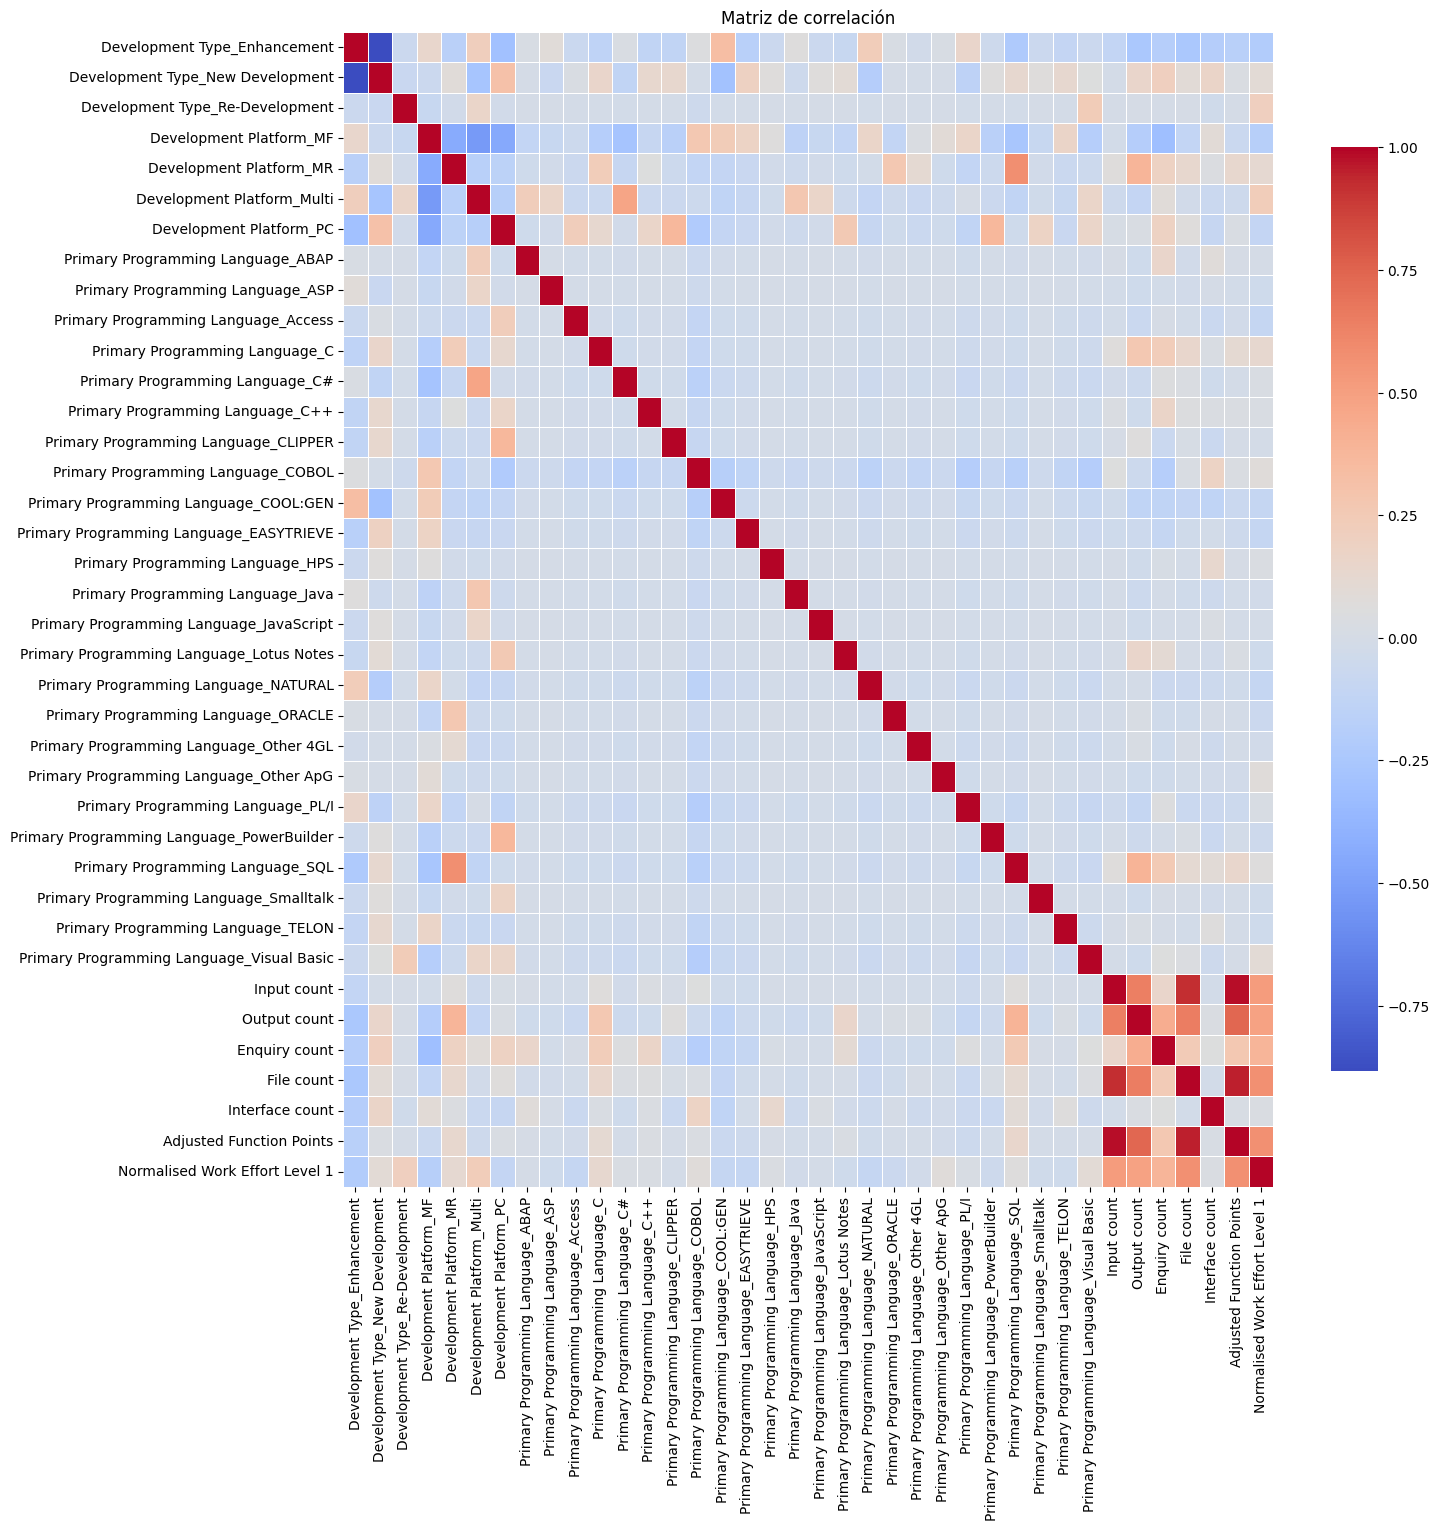

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Matriz de correlación")
plt.show()

In [ ]:
# Pares de atributos con correlación superior al umbral
high_correlation_pairs = []
atributos = []

# Recorre la matriz de correlación y verifica los valores
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            attribute_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_correlation_pairs.append(attribute_pair)

# Imprime los pares de atributos con correlación superior a 0.8 y crear una lista de atributos sin repetir
for pair in high_correlation_pairs:
    print("Correlación alta entre: ", pair[0], "y", pair[1])
    atributos.extend(pair)

# Eliminar duplicados y mantener el orden
atributos = list(dict.fromkeys(atributos))

# Imprimir la lista de atributos
print("Lista de atributos con correlación alta: ", atributos)

Correlación alta entre:  Development Type_Enhancement y Development Type_New Development
Correlación alta entre:  Input count y File count
Correlación alta entre:  Input count y Adjusted Function Points
Correlación alta entre:  File count y Adjusted Function Points
Lista de atributos con correlación alta:  ['Development Type_Enhancement', 'Development Type_New Development', 'Input count', 'File count', 'Adjusted Function Points']


In [ ]:
# Defino los algoritmos base para evaluar
reg_svr=svm.SVR()
rfr=RandomForestRegressor()
knnr=KNeighborsRegressor()
reg_gbr=GradientBoostingRegressor()
votr=VotingRegressor([('svr',reg_svr),('rf',rfr),('gbr',reg_gbr),('knn',knnr)])
modelos=[reg_svr, rfr, reg_gbr, knnr, votr]

In [ ]:
for i in atributos:
  print("\n##########################################################################################################")
  print("\nPARA EL ATRIBUTO: ", i)
  # Preparando los datos
  x=df_final[['Input count','Output count','Enquiry count','File count','Interface count','Adjusted Function Points']].values
  y=df_final['Normalised Work Effort Level 1'].values
  binarios=df_final[feature_names_binario]

  alg_escalado = StandardScaler(with_mean=True, with_std=True)
  x_escalado = alg_escalado.fit_transform(x)
  y=y.reshape(-1,1)
  y_escalado = alg_escalado.fit_transform(y)

  df_x_transf = pd.DataFrame(x_escalado, columns=feature_names_num)
  df_y_transf = pd.DataFrame(y_escalado, columns=['Normalised Work Effort Level 1'])
  df_data_transf = pd.concat([binarios, df_x_transf, df_y_transf], axis=1)

  X=df_data_transf[feature_names]
  Y=df_data_transf['Normalised Work Effort Level 1']

  x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)
  x_train_sin=x_train.drop(i, axis=1)

  for j in modelos:
    # Realizar validación cruzada con y sin el atributo con alta correlación:
    # Con el atributo
    cv_scores_con = cross_val_score(j, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Sin el atributo
    cv_scores_sin = cross_val_score(j, x_train_sin, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calcular el estadístico t y el p-valor
    t_statistic, p_value = ttest_rel(cv_scores_con, cv_scores_sin)

    # Mostrar los resultados
    print("-------------------------------------------------------------------------------------------------------------")
    print("El modelo: ", j)
    print("MSE de validación cruzada (con atributo):", cv_scores_con)
    print("MSE de validación cruzada (sin atributo):", cv_scores_sin)
    print("El MSE medio con atributo es: ", np.mean(cv_scores_con), "\nEl MSE medio sin atributo es: ", np.mean(cv_scores_sin))
    if np.mean(cv_scores_con) > np.mean(cv_scores_sin):
      print("El atributo mejora el desempeño del modelo, con una diferencia de: ", np.mean(cv_scores_con)-np.mean(cv_scores_sin))
    else:
      print("El atributo no mejora el desempeño del modelo, con una diferencia de: ", np.mean(cv_scores_con)-np.mean(cv_scores_sin))

    print("Estadístico t:", t_statistic)
    print("p-valor:", p_value)


##########################################################################################################

PARA EL ATRIBUTO:  Any organization which counts function points
-------------------------------------------------------------------------------------------------------------
El modelo:  SVR()
MSE de validación cruzada (con atributo): [-0.06310152 -0.97958228 -0.21498498 -0.6557249  -0.16927074]
MSE de validación cruzada (sin atributo): [-0.06202828 -0.97925479 -0.21502687 -0.65532697 -0.16949368]
El MSE medio con atributo es:  -0.41653288115107723 
El MSE medio sin atributo es:  -0.4162261169885083
El atributo no mejora el desempeño del modelo, con una diferencia de:  -0.0003067641625689177
Estadístico t: -1.3730123970413095
p-valor: 0.2416889444234704
-------------------------------------------------------------------------------------------------------------
El modelo:  RandomForestRegressor()
MSE de validación cruzada (con atributo): [-0.14113853 -0.83799314 -0.12258803 -0.4

In [ ]:
#df_final=df_final.drop('Chemicals', axis=1)
#df_final=df_final.drop('Any organization which counts function points', axis=1)
#df_final=df_final.drop('Functional Specification System', axis=1)
#df_final=df_final.drop('Other', axis=1)
#df_final=df_final.drop('Inventory Control', axis=1)
df_final=df_final.drop('Primary Programming Language_ASP', axis=1)
df_final=df_final.drop('Input count', axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
df_final.describe() #obtener algunas estadísitcas de cada atributo

Development Type_Enhancement  Development Type_New Development  \
count                    197.000000                        197.000000   
mean                       0.411168                          0.527919   
std                        0.493299                          0.500492   
min                        0.000000                          0.000000   
25%                        0.000000                          0.000000   
50%                        0.000000                          1.000000   
75%                        1.000000                          1.000000   
max                        1.000000                          1.000000   

       Development Type_Re-Development  Development Platform_MF  \
count                       197.000000               197.000000   
mean                          0.005076                 0.568528   
std                           0.071247                 0.496544   
min                           0.000000                 0.000000   
25%                           0.000000                 0.000000   
50%                           0.000000                 1.000000   
75%                           0.000000                 1.000000   
max                           1.000000                 1.000000   

       Development Platform_MR  Development Platform_Multi  \
count               197.000000                  197.000000   
mean                  0.126904                    0.172589   
std                   0.333713                    0.378854   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    0.000000   
max                   1.000000                    1.000000   

       Development Platform_PC  Primary Programming Language_ABAP  \
count               197.000000                         197.000000   
mean                  0.131980                           0.010152   
std                   0.339331                           0.100501   
min                   0.000000                           0.000000   
25%                   0.000000                           0.000000   
50%                   0.000000                           0.000000   
75%                   0.000000                           0.000000   
max                   1.000000                           1.000000   

       Primary Programming Language_Access  Primary Programming Language_C  \
count                           197.000000                      197.000000   
mean                              0.025381                        0.025381   
std                               0.157679                        0.157679   
min                               0.000000                        0.000000   
25%                               0.000000                        0.000000   
50%                               0.000000                        0.000000   
75%                               0.000000                        0.000000   
max                               1.000000                        1.000000   

       Primary Programming Language_C#  Primary Programming Language_C++  \
count                       197.000000                        197.000000   
mean                          0.055838                          0.020305   
std                           0.230193                          0.141399   
min                           0.000000                          0.000000   
25%                           0.000000                          0.000000   
50%                           0.000000                          0.000000   
75%                           0.000000                          0.000000   
max                           1.000000                          1.000000   

       Primary Programming Language_CLIPPER  \
count                            197.000000   
mean                               0.020305   
std                                

In [ ]:
feature_names=list(df_final)
print(feature_names)
feature_names.remove('Normalised Work Effort Level 1')
print(feature_names)
feature_names_num=['Output count','Enquiry count','File count','Interface count','Adjusted Function Points']
feature_names_binario=list(df_final)
feature_names_binario.remove('Normalised Work Effort Level 1')
feature_names_binario.remove('Output count')
feature_names_binario.remove('Enquiry count')
feature_names_binario.remove('File count')
feature_names_binario.remove('Interface count')
feature_names_binario.remove('Adjusted Function Points')
print(feature_names_binario)
print(feature_names_num)

['Development Type_Enhancement', 'Development Type_New Development', 'Development Type_Re-Development', 'Development Platform_MF', 'Development Platform_MR', 'Development Platform_Multi', 'Development Platform_PC', 'Primary Programming Language_ABAP', 'Primary Programming Language_Access', 'Primary Programming Language_C', 'Primary Programming Language_C#', 'Primary Programming Language_C++', 'Primary Programming Language_CLIPPER', 'Primary Programming Language_COBOL', 'Primary Programming Language_COOL:GEN', 'Primary Programming Language_EASYTRIEVE', 'Primary Programming Language_HPS', 'Primary Programming Language_Java', 'Primary Programming Language_JavaScript', 'Primary Programming Language_Lotus Notes', 'Primary Programming Language_NATURAL', 'Primary Programming Language_ORACLE', 'Primary Programming Language_Other 4GL', 'Primary Programming Language_Other ApG', 'Primary Programming Language_PL/I', 'Primary Programming Language_PowerBuilder', 'Primary Programming Language_SQL', '

In [ ]:
x=df_final[['Output count','Enquiry count','File count','Interface count','Adjusted Function Points']].values
y=df_final['Normalised Work Effort Level 1'].values
binarios=df_final[feature_names_binario]

# Se realiza una normalización con el objetivo de obtener una distribución de media cero y varianza uno
alg_escalado = StandardScaler(with_mean=True, with_std=True)

x_escalado = alg_escalado.fit_transform(x)
y = y.reshape(-1,1) #es necesario que sea un array 1d
y_escalado = alg_escalado.fit_transform(y)
df_x_transf = pd.DataFrame(x_escalado, columns= ['Output count','Enquiry count','File count','Interface count','Adjusted Function Points'])
df_y_transf = pd.DataFrame(y_escalado, columns= ['Normalised Work Effort Level 1'])
df_data_transf = pd.concat([binarios, df_x_transf, df_y_transf], axis=1)

X=df_data_transf[feature_names]
Y=df_data_transf['Normalised Work Effort Level 1']

In [ ]:
# Dividir en conjunto de entrenamiento y test 70%-30%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)

# Algoritmos:

## **SVR:**

**GRIDSEARCHCV:**

In [ ]:
#Búsqueda combinacion de parámetros usando GridSearchCV
modelo=svm.SVR()
params={'kernel':['linear','poly', 'rbf', 'sigmoid'],'degree':[1,2,3,4],'gamma':['auto','scale',0.1],'C':list(np.arange(0.5,21.5,1))}
score={'mae':'neg_mean_absolute_error','mse':'neg_mean_squared_error','R2':'r2'}

# Definir la validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=3)

grid=GridSearchCV(modelo,params,cv=cv,scoring='r2',verbose=1)
grid.fit(x_train,y_train)

Fitting 15 folds for each of 1008 candidates, totalling 15120 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=SVR(),
             param_grid={'C': [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5,
                               10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5,
                               18.5, 19.5, 20.5],
                         'degree': [1, 2, 3, 4],
                         'gamma': ['auto', 'scale', 0.1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'C': 9.5, 'degree': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}
SVR(C=9.5, degree=1, gamma='auto', kernel='sigmoid')
0.35388566814878925


In [ ]:
#definir algoritmo SVR con los mejores parámetros
svr = svm.SVR(C=9.5, degree=1, gamma='auto', kernel='sigmoid')

In [ ]:
#entrenamiento
modelo_svr=svr.fit(x_train,y_train)

In [ ]:
#predicciones
y_pred = modelo_svr.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

       Actual  Predicted
183 -0.159725  -0.222798
162 -0.466057  -0.308245
18  -0.493883  -0.204898
15   0.916547   0.593587
67   0.058594   0.329694
108  0.115227   0.309256
45  -0.228370  -0.155705
76  -0.630195  -0.723680
16  -0.319204  -0.710325
146  0.619040   0.393863
60  -0.075265   0.516770
123 -0.581162   0.039262
42   0.320920  -0.711422
155 -0.339552   0.041618
55  -0.177621  -0.160817
66  -0.311236   0.111728
115 -0.278752  -0.843544
158  6.022092   5.153610
30  -0.087156  -0.004769
119 -0.281694  -0.344859
69  -0.632769  -0.598726
173 -0.618182  -0.515629
136  0.060310   0.280344
19  -0.574175  -0.406017
51  -0.386869   0.009765
178 -0.548678  -0.139295
5    0.022065  -0.355028
171 -0.577239  -0.204034
24  -0.593665  -0.284331
96   0.578465  -0.442089
166  0.105543   1.997821
9   -0.638898  -0.417906
152 -0.329501  -0.256084
78  -0.583001  -0.547254
161  2.711516   0.847658
111  1.349507   0.891591
65  -0.501238  -0.552159
132  0.579691   0.622946
35  -0.451470  -0.512574


In [ ]:
#calcular residuos
residuos = y_test - y_pred
print(residuos)

183    0.063074
162   -0.157812
18    -0.288985
15     0.322959
67    -0.271100
108   -0.194028
45    -0.072666
76     0.093486
16     0.391121
146    0.225177
60    -0.592036
123   -0.620424
42     1.032342
155   -0.381170
55    -0.016805
66    -0.422964
115    0.564792
158    0.868482
30    -0.082387
119    0.063166
69    -0.034043
173   -0.102553
136   -0.220033
19    -0.168158
51    -0.396634
178   -0.409383
5      0.377093
171   -0.373206
24    -0.309334
96     1.020554
166   -1.892278
9     -0.220992
152   -0.073416
78    -0.035746
161    1.863859
111    0.457915
65     0.050921
132   -0.043256
35     0.061104
98     0.364453
104    0.086484
75     0.276980
93     1.253139
68    -0.090242
29     6.071974
127   -0.176336
159   -0.277727
56    -0.199312
31     0.041788
12     0.241416
41    -0.101321
100    0.764721
126   -0.013317
97    -0.267911
125    0.022146
26    -0.088805
38     0.083634
Name: Normalised Work Effort Level 1, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: 0.1416
Median Bias Error: -0.0357
Maximum Absolute Error: 6.0720
Interquartile Range of Error: 0.4614
Standard Deviation of Error: 0.9489
Variance of Error: 0.9005
---------------------------------------------------
Mean absolute error: 0.44
Median absolute error: 0.23
Mean absolute percentage error: 1895.73 %
Mean squared error: 0.92
Root mean squared error: 0.96
Root mean squared percentage error: 1313.19 %
Coefficient of determination: 0.50
---------------------------------------------------
Mean Magnitude of Error: -16.7923
Median Magnitude of Error: -0.1582
Percentage of Relative Error within 25%: 70.18 %


In [ ]:
modelo_svr.score(x_test, y_test)

0.49907884208599795

In [ ]:
modelo_svr.score(x_train, y_train)

0.5342215477118315

**VALIDACIÓN CRUZADA**

In [ ]:
# El número de folds
n_folds = 5

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['Normalised Work Effort Level 1']
    X_test = test_data[feature_names]
    Y_test = test_data['Normalised Work Effort Level 1']

    # Entrenar el modelo.
    cv_svr=svm.SVR(C=9.5, degree=1, gamma='auto', kernel='sigmoid')
    cv_svr.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_svr.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = mre[mre <= 0.25].count()
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.39
CV Mean squared error: 0.56
CV Root mean squared error: 0.73
CV Coefficient of determination: 0.42
CV Mean Magnitude of Error: -4.4631
CV Percentage of Relative Error within 25%: 75.06 %


In [ ]:
cv_results = cross_validate(svr, X, Y, cv=5, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.34609956 -0.36248635 -0.38334009 -0.50810574 -0.3491166 ]  // Con una media de:  -0.3898296680921401
Error Cuadrático Medio:  [-1.04359799 -0.36543918 -0.35266508 -0.61620778 -0.39223703]  // Con una media de:  -0.5540294128265499
Raiz Error Cuadrático Medio:  [-1.02156644 -0.60451566 -0.59385611 -0.78498903 -0.6262883 ]  // Con una media de:  -0.7262431075560889
Coeficiente de Determinación:  [0.2609274  0.42227757 0.33047154 0.3629143  0.72504946]  // Con una media de:  0.42032805347132546


In [ ]:
score_result={"Modelo":["SVR"],"MAE":[mean_mae], "MSE":[mean_mmre], "RMSE":[mean_rmse], "R2":[mean_r2], "MMRE":[mean_mse], "PRED(0.25)":[mean_pred_25/100]}
score_result=pd.DataFrame(score_result)

In [ ]:
score_result

Modelo       MAE       MSE     RMSE        R2      MMRE  PRED(0.25)
0    SVR  0.390254 -4.463103  0.72817  0.417103  0.555911     0.75064

## RandomForest:

In [ ]:
modelo=RandomForestRegressor(random_state=42)
params={'n_estimators':[100,200,400],'criterion':["squared_error", "absolute_error"],'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2,3],'bootstrap':[True,False],'max_depth':[None,1,3]}
score={'mae':'neg_mean_absolute_error','rmse':'neg_root_mean_squared_error','R2':'r2'}

# Definir la validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=3)

grid=GridSearchCV(modelo,params,cv=cv,scoring='r2',verbose=1)
grid.fit(x_train,y_train)

Fitting 15 folds for each of 432 candidates, totalling 6480 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 1, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 400]},
             scoring='r2', verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'bootstrap': True, 'criterion': 'absolute_error', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 400}
RandomForestRegressor(criterion='absolute_error', min_samples_leaf=3,
                      n_estimators=400, random_state=42)
0.3240482613354037


In [ ]:
rf = RandomForestRegressor(criterion='absolute_error', min_samples_leaf=3, n_estimators=400, random_state=42)

In [ ]:
modelo_rf=rf.fit(x_train,y_train)

In [ ]:
y_pred = modelo_rf.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

       Actual  Predicted
183 -0.159725  -0.145759
162 -0.466057  -0.224349
18  -0.493883  -0.255964
15   0.916547   0.185396
67   0.058594   0.397372
108  0.115227  -0.079204
45  -0.228370  -0.041571
76  -0.630195  -0.581510
16  -0.319204  -0.573199
146  0.619040   0.780878
60  -0.075265   0.779372
123 -0.581162  -0.135234
42   0.320920  -0.279069
155 -0.339552  -0.112057
55  -0.177621  -0.275967
66  -0.311236  -0.031139
115 -0.278752  -0.330563
158  6.022092   1.611586
30  -0.087156  -0.072925
119 -0.281694  -0.256122
69  -0.632769  -0.591957
173 -0.618182  -0.562075
136  0.060310   0.378058
19  -0.574175  -0.397102
51  -0.386869  -0.262597
178 -0.548678  -0.104560
5    0.022065  -0.234493
171 -0.577239  -0.131487
24  -0.593665  -0.210362
96   0.578465  -0.299685
166  0.105543   1.733196
9   -0.638898  -0.556627
152 -0.329501  -0.276526
78  -0.583001  -0.514517
161  2.711516   0.000905
111  1.349507   0.668478
65  -0.501238  -0.517664
132  0.579691   0.048673
35  -0.451470  -0.547717


In [ ]:
residuos = y_test - y_pred
print(residuos)

183   -0.013965
162   -0.241708
18    -0.237919
15     0.731150
67    -0.338778
108    0.194431
45    -0.186799
76    -0.048684
16     0.253995
146   -0.161838
60    -0.854637
123   -0.445928
42     0.599989
155   -0.227496
55     0.098346
66    -0.280097
115    0.051811
158    4.410506
30    -0.014231
119   -0.025572
69    -0.040812
173   -0.056107
136   -0.317748
19    -0.177073
51    -0.124272
178   -0.444117
5      0.256557
171   -0.445752
24    -0.383303
96     0.878150
166   -1.627653
9     -0.082271
152   -0.052975
78    -0.068483
161    2.710611
111    0.681029
65     0.016426
132    0.531018
35     0.096247
98     0.344849
104   -0.105931
75     0.303953
93     0.913760
68    -0.007334
29     6.394900
127   -0.399544
159    0.107682
56    -0.318186
31    -0.012399
12    -0.212182
41    -0.022942
100   -0.066885
126   -0.088607
97    -0.277499
125    0.001780
26    -0.097457
38    -0.011263
Name: Normalised Work Effort Level 1, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: 0.1940
Median Bias Error: -0.0487
Maximum Absolute Error: 6.3949
Interquartile Range of Error: 0.3352
Standard Deviation of Error: 1.1420
Variance of Error: 1.3042
---------------------------------------------------
Mean absolute error: 0.49
Median absolute error: 0.21
Mean absolute percentage error: 1791.42 %
Mean squared error: 1.34
Root mean squared error: 1.16
Root mean squared percentage error: 1242.50 %
Coefficient of determination: 0.27
---------------------------------------------------
Mean Magnitude of Error: -16.0161
Median Magnitude of Error: -0.0908
Percentage of Relative Error within 25%: 68.42 %


In [ ]:
modelo_rf.score(x_test, y_test)

0.26982555039447076

In [ ]:
modelo_rf.score(x_train, y_train)

0.7456805121080936

**VALIDACIÓN CRUZADA:**

In [ ]:
# El número de folds
n_folds = 5

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['Normalised Work Effort Level 1']
    X_test = test_data[feature_names]
    Y_test = test_data['Normalised Work Effort Level 1']

    # Entrenar el modelo.
    cv_rf=RandomForestRegressor(criterion='absolute_error', min_samples_leaf=3, n_estimators=400, random_state=42)
    cv_rf.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_rf.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = mre[mre <= 0.25].count()
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.40
CV Mean squared error: 0.66
CV Root mean squared error: 0.79
CV Coefficient of determination: 0.36
CV Mean Magnitude of Error: -4.5842
CV Percentage of Relative Error within 25%: 76.12 %


In [ ]:
cv_results = cross_validate(rf, X, Y, cv=5, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.34477953 -0.2921831  -0.36111638 -0.54019727 -0.46377277]  // Con una media de:  -0.400409812044247
Error Cuadrático Medio:  [-1.0932277  -0.23320263 -0.35271978 -0.75131853 -0.86932366]  // Con una media de:  -0.6599584600269344
Raiz Error Cuadrático Medio:  [-1.0455753  -0.48291058 -0.59390217 -0.86678632 -0.93237528]  // Con una media de:  -0.7843099282514666
Coeficiente de Determinación:  [0.22577981 0.63133021 0.33036768 0.22322582 0.39062101]  // Con una media de:  0.3602649035260392


In [ ]:
score_result=score_result.append({"Modelo":"RandomForest","MAE":mean_mae, "MSE":mean_mmre, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":mean_mse, "PRED(0.25)":mean_pred_25/100}, ignore_index=True)

<ipython-input-381-9ca73929f778>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_result=score_result.append({"Modelo":"RandomForest","MAE":mean_mae, "MSE":mean_mmre, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":mean_mse, "PRED(0.25)":mean_pred_25/100}, ignore_index=True)


## GradientBoostingRegresor:

In [ ]:
#Búsqueda combinacion de parámetros usando GridSearchCV
modelo=GradientBoostingRegressor(random_state=42)
params={'loss':['squared_error', 'absolute_error'],'learning_rate':[0.1,0.3,0.5],'n_estimators':[100,300,500],'criterion':['friedman_mse','squared_error'],'min_samples_split':[2,3,4],'min_samples_leaf':[1,3,5],'max_depth':[None,1,3]}
score={'mae':'neg_mean_absolute_error','mse':'neg_mean_squared_error','R2':'r2'}

# Definir la validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=3)

grid=GridSearchCV(modelo,params,cv=cv,scoring='r2',verbose=1)
grid.fit(x_train,y_train)

Fitting 15 folds for each of 972 candidates, totalling 14580 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.3, 0.5],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 1, 3],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 300, 500]},
             scoring='r2', verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
GradientBoostingRegressor(loss='absolute_error', max_depth=None,
                          n_estimators=300, random_state=42)
0.39370478914222556


In [ ]:
#gbr=GradientBoostingRegressor(max_depth=None, min_samples_split=3, n_estimators=300, random_state=42)
gbr=GradientBoostingRegressor(loss='absolute_error', max_depth=None, n_estimators=300, random_state=42)

In [ ]:
modelo_gbr=gbr.fit(x_train,y_train)

In [ ]:
y_pred = modelo_gbr.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

       Actual  Predicted
183 -0.159725  -0.011456
162 -0.466057  -0.259000
18  -0.493883  -0.150241
15   0.916547   0.177638
67   0.058594   0.161574
108  0.115227   0.055455
45  -0.228370  -0.104549
76  -0.630195  -0.587577
16  -0.319204  -0.523806
146  0.619040   1.862433
60  -0.075265   0.493129
123 -0.581162  -0.463420
42   0.320920  -0.086135
155 -0.339552  -0.022363
55  -0.177621  -0.239782
66  -0.311236   0.177627
115 -0.278752  -0.126585
158  6.022092   1.297672
30  -0.087156  -0.073042
119 -0.281694  -0.345645
69  -0.632769  -0.604415
173 -0.618182  -0.588032
136  0.060310   0.086112
19  -0.574175  -0.503658
51  -0.386869  -0.260301
178 -0.548678  -0.166124
5    0.022065  -0.200690
171 -0.577239  -0.178923
24  -0.593665  -0.320056
96   0.578465  -0.411323
166  0.105543   0.801075
9   -0.638898  -0.553844
152 -0.329501  -0.377236
78  -0.583001  -0.522285
161  2.711516   0.340535
111  1.349507   1.400561
65  -0.501238  -0.554973
132  0.579691   0.327564
35  -0.451470  -0.582418


In [ ]:
residuos = y_test - y_pred
print(residuos)

183   -0.148269
162   -0.207057
18    -0.343642
15     0.738909
67    -0.102979
108    0.059772
45    -0.123822
76    -0.042617
16     0.204602
146   -1.243393
60    -0.568394
123   -0.117742
42     0.407055
155   -0.317189
55     0.062160
66    -0.488863
115   -0.152167
158    4.724420
30    -0.014114
119    0.063952
69    -0.028354
173   -0.030150
136   -0.025801
19    -0.070516
51    -0.126568
178   -0.382553
5      0.222755
171   -0.398316
24    -0.273610
96     0.989789
166   -0.695532
9     -0.085054
152    0.047735
78    -0.060715
161    2.370981
111   -0.051055
65     0.053735
132    0.252126
35     0.130948
98     0.280525
104   -0.133400
75     0.210353
93     1.049461
68    -0.017505
29     6.768980
127   -0.411656
159   -0.070763
56    -0.028775
31     0.024090
12    -0.078243
41     0.033403
100   -0.656921
126   -0.110209
97    -0.396990
125    0.004545
26    -0.298332
38     0.012821
Name: Normalised Work Effort Level 1, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: 0.1827
Median Bias Error: -0.0426
Maximum Absolute Error: 6.7690
Interquartile Range of Error: 0.2143
Standard Deviation of Error: 1.1789
Variance of Error: 1.3897
---------------------------------------------------
Mean absolute error: 0.47
Median absolute error: 0.13
Mean absolute percentage error: 1438.76 %
Mean squared error: 1.42
Root mean squared error: 1.19
Root mean squared percentage error: 1010.59 %
Coefficient of determination: 0.23
---------------------------------------------------
Mean Magnitude of Error: -13.2333
Median Magnitude of Error: -0.1072
Percentage of Relative Error within 25%: 70.18 %


In [ ]:
modelo_gbr.score(x_test, y_test)

0.22561854920844338

In [ ]:
modelo_gbr.score(x_train, y_train)

0.9991193870217328

**VALIDACIÓN CRUZADA:**

In [ ]:
# El número de folds
n_folds = 5

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['Normalised Work Effort Level 1']
    X_test = test_data[feature_names]
    Y_test = test_data['Normalised Work Effort Level 1']

    # Entrenar el modelo.
    cv_gbr=GradientBoostingRegressor(loss='absolute_error', max_depth=None, n_estimators=300, random_state=42)
    cv_gbr.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_gbr.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = mre[mre <= 0.25].count()
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.40
CV Mean squared error: 0.62
CV Root mean squared error: 0.76
CV Coefficient of determination: 0.40
CV Mean Magnitude of Error: -2.5772
CV Percentage of Relative Error within 25%: 75.58 %


In [ ]:
cv_results = cross_validate(gbr, X, Y, cv=5, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.33018047 -0.26728808 -0.37695048 -0.45262168 -0.43207596]  // Con una media de:  -0.371823332509792
Error Cuadrático Medio:  [-1.19404207 -0.19526557 -0.3175582  -0.49314412 -0.77403421]  // Con una media de:  -0.5948088340712786
Raiz Error Cuadrático Medio:  [-1.09272232 -0.44188864 -0.56352303 -0.70224221 -0.87979214]  // Con una media de:  -0.7360336675640898
Coeficiente de Determinación:  [0.15438341 0.69130486 0.39712132 0.49014751 0.45741706]  // Con una media de:  0.4380748323550779


In [ ]:
score_result=score_result.append({"Modelo":"GradientBoosting","MAE":mean_mae, "MSE":mean_mmre, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":mean_mse, "PRED(0.25)":mean_pred_25/100}, ignore_index=True)

<ipython-input-386-86fa8f61200e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_result=score_result.append({"Modelo":"GradientBoosting","MAE":mean_mae, "MSE":mean_mmre, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":mean_mse, "PRED(0.25)":mean_pred_25/100}, ignore_index=True)


## Voting:

In [ ]:
reg_vot=VotingRegressor(estimators=[('rf',rf),('SVR',svr),('gbr',gbr)])

In [ ]:
modelo_voting=reg_vot.fit(x_train,y_train)

In [ ]:
y_pred = modelo_voting.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

       Actual  Predicted
183 -0.159725  -0.126671
162 -0.466057  -0.263865
18  -0.493883  -0.203701
15   0.916547   0.318874
67   0.058594   0.296213
108  0.115227   0.095169
45  -0.228370  -0.100608
76  -0.630195  -0.630923
16  -0.319204  -0.602443
146  0.619040   1.012391
60  -0.075265   0.596423
123 -0.581162  -0.186464
42   0.320920  -0.358876
155 -0.339552  -0.030934
55  -0.177621  -0.225522
66  -0.311236   0.086072
115 -0.278752  -0.433564
158  6.022092   2.687623
30  -0.087156  -0.050245
119 -0.281694  -0.315542
69  -0.632769  -0.598366
173 -0.618182  -0.555245
136  0.060310   0.248171
19  -0.574175  -0.435592
51  -0.386869  -0.171045
178 -0.548678  -0.136660
5    0.022065  -0.263404
171 -0.577239  -0.171481
24  -0.593665  -0.271583
96   0.578465  -0.384366
166  0.105543   1.510697
9   -0.638898  -0.509459
152 -0.329501  -0.303282
78  -0.583001  -0.528019
161  2.711516   0.396366
111  1.349507   0.986877
65  -0.501238  -0.541599
132  0.579691   0.333061
35  -0.451470  -0.547570


In [ ]:
residuos = y_test - y_pred
print(residuos)

183   -0.033053
162   -0.202193
18    -0.290182
15     0.597673
67    -0.237619
108    0.020058
45    -0.127762
76     0.000728
16     0.283239
146   -0.393351
60    -0.671689
123   -0.394698
42     0.679796
155   -0.308618
55     0.047901
66    -0.397308
115    0.154812
158    3.334469
30    -0.036911
119    0.033848
69    -0.034403
173   -0.062937
136   -0.187861
19    -0.138582
51    -0.215825
178   -0.412018
5      0.285468
171   -0.405758
24    -0.322082
96     0.962831
166   -1.405154
9     -0.129439
152   -0.026219
78    -0.054982
161    2.315150
111    0.362630
65     0.040360
132    0.246630
35     0.096100
98     0.329942
104   -0.050949
75     0.263762
93     1.072120
68    -0.038360
29     6.411952
127   -0.329179
159   -0.080269
56    -0.182091
31     0.017826
12    -0.016336
41    -0.030287
100    0.013638
126   -0.070711
97    -0.314133
125    0.009490
26    -0.161531
38     0.028398
Name: Normalised Work Effort Level 1, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: 0.1727
Median Bias Error: -0.0344
Maximum Absolute Error: 6.4120
Interquartile Range of Error: 0.2983
Standard Deviation of Error: 1.0546
Variance of Error: 1.1122
---------------------------------------------------
Mean absolute error: 0.45
Median absolute error: 0.19
Mean absolute percentage error: 1700.77 %
Mean squared error: 1.14
Root mean squared error: 1.07
Root mean squared percentage error: 1188.73 %
Coefficient of determination: 0.38
---------------------------------------------------
Mean Magnitude of Error: -15.3818
Median Magnitude of Error: -0.0943
Percentage of Relative Error within 25%: 71.93 %


In [ ]:
modelo_voting.score(x_test, y_test)

0.378527102231062

In [ ]:
modelo_voting.score(x_train, y_train)

0.8450750451749577

**VALIDACIÓN CRUZADA:**

In [ ]:
# El número de folds
n_folds = 5

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['Normalised Work Effort Level 1']
    X_test = test_data[feature_names]
    Y_test = test_data['Normalised Work Effort Level 1']

    # Entrenar el modelo.
    cv_vot=VotingRegressor(estimators=[('rf',rf),('SVR',svr),('gbr',gbr)])
    cv_vot.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_vot.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = np.sum(mre <= 0.25)
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.38
CV Mean squared error: 0.57
CV Root mean squared error: 0.73
CV Coefficient of determination: 0.44
CV Mean Magnitude of Error: -3.8678
CV Percentage of Relative Error within 25%: 76.63 %


In [ ]:
cv_results = cross_validate(reg_vot, X, Y, cv=5, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.31513497 -0.29266014 -0.35649596 -0.47504218 -0.40250178]  // Con una media de:  -0.3683670066003367
Error Cuadrático Medio:  [-1.09611438 -0.22466163 -0.31044169 -0.57486913 -0.56481396]  // Con una media de:  -0.5541801594602527
Raiz Error Cuadrático Medio:  [-1.04695481 -0.47398484 -0.55717295 -0.75820125 -0.75154106]  // Con una media de:  -0.7175709815775744
Coeficiente de Determinación:  [0.22373548 0.64483266 0.41063189 0.40565355 0.60407639]  // Con una media de:  0.45778599180565716


In [ ]:
score_result=score_result.append({"Modelo":"Voting","MAE":mean_mae, "MSE":mean_mmre, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":mean_mse, "PRED(0.25)":mean_pred_25/100}, ignore_index=True)

<ipython-input-391-3758453eff4a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_result=score_result.append({"Modelo":"Voting","MAE":mean_mae, "MSE":mean_mmre, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":mean_mse, "PRED(0.25)":mean_pred_25/100}, ignore_index=True)


# **Explicabilidad:**

In [ ]:
# Crear las columnas del MultiIndex
columns_multi = pd.MultiIndex.from_tuples([
    ('Breakdown', 'Ranking'), ('Breakdown', 'Signo'),
    ('Shapley', 'Ranking'), ('Shapley', 'Signo'),
    ('Lime', 'Ranking'), ('Lime', 'Signo')
])

## **SVR:**

**FEATURE IMPORTANCE:**

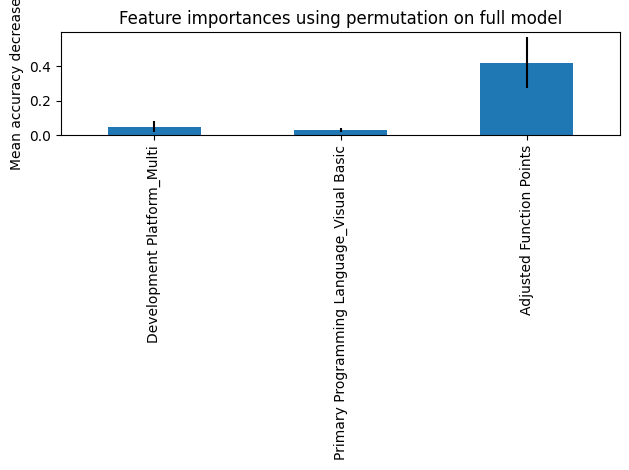

In [ ]:
# Uso de permutation importance
permu = permutation_importance(modelo_svr, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(2), index=feature_names)[permu.importances_mean.round(2) > 0.01]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(2) > 0.01], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

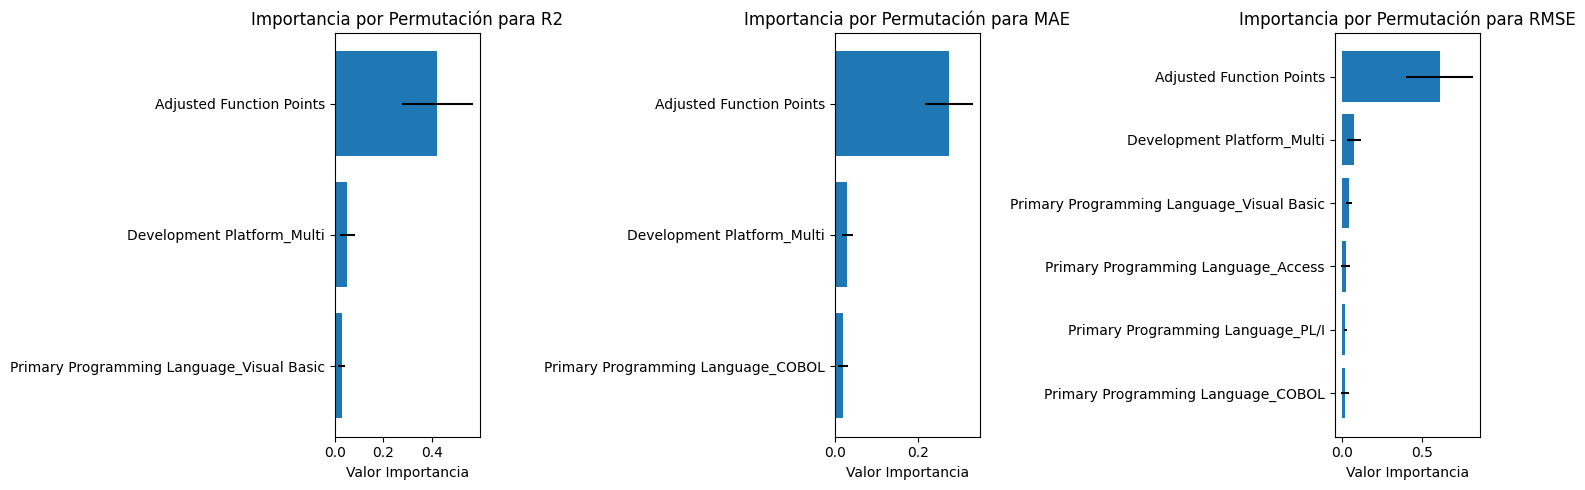

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_svr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(2) > 0.01]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_svr = {}

permu_score = permutation_importance(modelo_svr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(2) > 0.01]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_svr[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_svr['df_global_R2']

Feature  Importance_Mean  Importance_Std
2                   Adjusted Function Points         0.421460        0.146654
0                 Development Platform_Multi         0.051031        0.030215
1  Primary Programming Language_Visual Basic         0.028030        0.013202

In [ ]:
results_global_svr['df_global_MAE']

Feature  Importance_Mean  Importance_Std
2            Adjusted Function Points         0.276380        0.057425
0          Development Platform_Multi         0.030728        0.013069
1  Primary Programming Language_COBOL         0.019821        0.012251

In [ ]:
results_global_svr['df_global_RMSE']

Feature  Importance_Mean  Importance_Std
5                   Adjusted Function Points         0.611449        0.212763
0                 Development Platform_Multi         0.074035        0.043836
4  Primary Programming Language_Visual Basic         0.040666        0.019153
1        Primary Programming Language_Access         0.020492        0.027110
3          Primary Programming Language_PL/I         0.017834        0.010973
2         Primary Programming Language_COBOL         0.016664        0.024702

**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_svr, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 137 rows 35 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 137 values
  -> model_class       : sklearn.svm._classes.SVR (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7a8245779d80> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -65.6, mean = -1.02, max = 2.02
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.88, mean = 0.95, max = 71.6
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  22
El valor máximo obtenido es:  1.6863433234682588
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  10
El valor mínimo obtenido es:  -9.184786780965322
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  40
El valor de la mediana es:  -0.1896147822266424


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

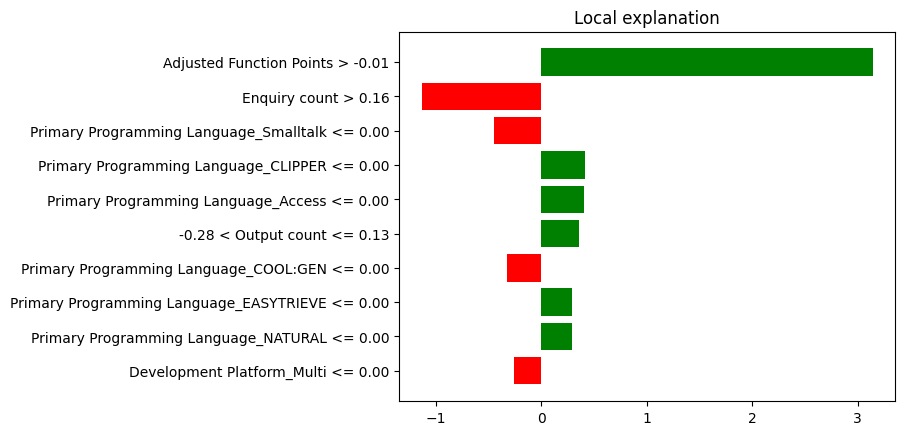

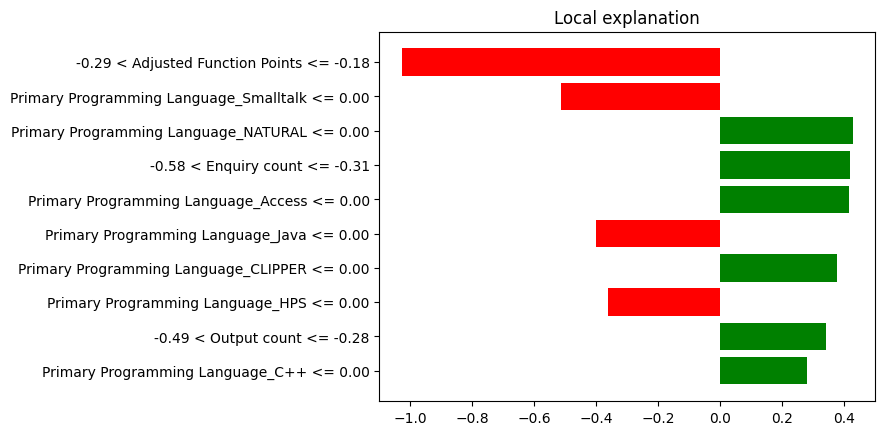

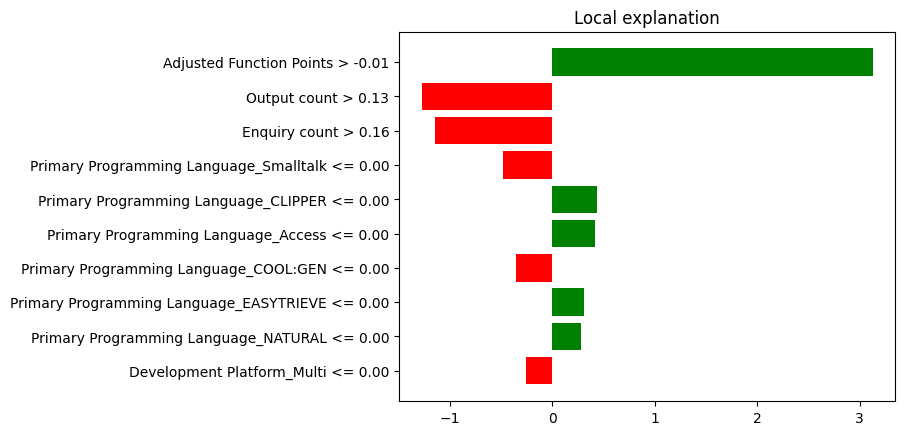

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 36])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(35)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)
lime_df_max.at[0, "Variable"] = "Adjusted Function Points"
lime_df_max.at[1, "Variable"] = "Enquiry count"
lime_df_max.at[2, "Variable"] = "Primary Programming Language_Smalltalk"
lime_df_max.at[3, "Variable"] = "Primary Programming Language_CLIPPER"
lime_df_max.at[4, "Variable"] = "Primary Programming Language_Access"

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

                   Variable  Ranking     Signo
0  Adjusted Function Points        1  Positivo
1              Output count        2  Positivo
2                File count        3  Positivo
3   Development Platform_PC        4  Negativo
4             Enquiry count        5  Positivo
                   Variable  Ranking     Signo
0  Adjusted Function Points        1  Positivo
1                File count        2  Positivo
2              Output count        3  Positivo
3   Development Platform_PC        4  Negativo
4             Enquiry count        5  Positivo
                                 Variable  Ranking     Signo
0                Adjusted Function Points        1  Positivo
1                           Enquiry count        2  Negativo
2  Primary Programming Language_Smalltalk        3  Negativo
3    Primary Programming Language_CLIPPER        4  Positivo
4     Primary Programming Language_Access        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['Adjusted Function Points', 'Output count', 'File count', 'Development Platform_PC', 'Enquiry count']
['Adjusted Function Points', 'File count', 'Output count', 'Development Platform_PC', 'Enquiry count']
['Adjusted Function Points', 'Enquiry count', 'Primary Programming Language_Smalltalk', 'Primary Programming Language_CLIPPER', 'Primary Programming Language_Access']
['Primary Programming Language_CLIPPER', 'Adjusted Function Points', 'Primary Programming Language_Smalltalk', 'Development Platform_PC', 'Primary Programming Language_Access', 'Enquiry count', 'File count', 'Output count']


Variable Breakdown           Shapley  \
                                            Ranking     Signo Ranking   
0    Primary Programming Language_CLIPPER         -         -       -   
1                Adjusted Function Points         1  Positivo       1   
2  Primary Programming Language_Smalltalk         -         -       -   
3                 Development Platform_PC         4  Negativo       4   
4     Primary Programming Language_Access         -         -       -   
5                           Enquiry count         5  Positivo       5   
6                              File count         3  Positivo       2   
7                            Output count         2  Positivo       3   

               Lime            
      Signo Ranking     Signo  
0         -       4  Positivo  
1  Positivo       1  Positivo  
2         -       3  Negativo  
3  Negativo       -         -  
4         -       5  Positivo  
5  Positivo       2  Negativo  
6  Positivo       -         -  
7  Positivo       -         -

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["Adjusted Function Points", "Output count", "File count", "Development Platform_PC", "Enquiry count", "Primary Programming Language_Smalltalk", "Primary Programming Language_CLIPPER", "Primary Programming Language_Access"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley            \
                                         Ranking     Signo Ranking     Signo   
Variable                                                                       
Adjusted Function Points                       1  Positivo       1  Positivo   
Output count                                   2  Positivo       3  Positivo   
File count                                     3  Positivo       2  Positivo   
Development Platform_PC                        4  Negativo       4  Negativo   
Enquiry count                                  5  Positivo       5  Positivo   
Primary Programming Language_Smalltalk         -         -       -         -   
Primary Programming Language_CLIPPER           -         -       -         -   
Primary Programming Language_Access            -         -       -         -   

                                          Lime            
                                       Ranking     Signo  
Variable                                                  
Adjusted Function Points                     1  Positivo  
Output count                                 -         -  
File count                                   -         -  
Development Platform_PC                      -         -  
Enquiry count                                2  Negativo  
Primary Programming Language_Smalltalk       3  Negativo  
Primary Programming Language_CLIPPER         4  Positivo  
Primary Programming Language_Access          5  Positivo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 36])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(35)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[0, "Variable"]="Adjusted Function Points"
lime_df_median.at[1, "Variable"]="Primary Programming Language_Smalltalk"
lime_df_median.at[2, "Variable"]="Primary Programming Language_NATURAL"
lime_df_median.at[3, "Variable"]="Enquiry count"
lime_df_median.at[4, "Variable"]="Primary Programming Language_Access"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

                                    Variable  Ranking     Signo
0                               Output count        1  Positivo
1                   Adjusted Function Points        2  Negativo
2                              Enquiry count        3  Positivo
3                                 File count        4  Positivo
4  Primary Programming Language_Visual Basic        5  Positivo
                                    Variable  Ranking     Signo
0                               Output count        1  Positivo
1                              Enquiry count        2  Positivo
2                                 File count        3  Positivo
3                   Adjusted Function Points        4  Negativo
4  Primary Programming Language_Visual Basic        5  Positivo
                                 Variable  Ranking     Signo
0                Adjusted Function Points        1  Negativo
1  Primary Programming Language_Smalltalk        2  Negativo
2    Primary Programming Language_NATURAL        

In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['Output count', 'Adjusted Function Points', 'Enquiry count', 'File count', 'Primary Programming Language_Visual Basic']
['Output count', 'Enquiry count', 'File count', 'Adjusted Function Points', 'Primary Programming Language_Visual Basic']
['Adjusted Function Points', 'Primary Programming Language_Smalltalk', 'Primary Programming Language_NATURAL', 'Enquiry count', 'Primary Programming Language_Access']
['Primary Programming Language_NATURAL', 'Adjusted Function Points', 'Primary Programming Language_Smalltalk', 'Primary Programming Language_Access', 'Enquiry count', 'File count', 'Output count', 'Primary Programming Language_Visual Basic']


Variable Breakdown           Shapley  \
                                               Ranking     Signo Ranking   
0       Primary Programming Language_NATURAL         -         -       -   
1                   Adjusted Function Points         2  Negativo       4   
2     Primary Programming Language_Smalltalk         -         -       -   
3        Primary Programming Language_Access         -         -       -   
4                              Enquiry count         3  Positivo       2   
5                                 File count         4  Positivo       3   
6                               Output count         1  Positivo       1   
7  Primary Programming Language_Visual Basic         5  Positivo       5   

               Lime            
      Signo Ranking     Signo  
0         -       3  Positivo  
1  Negativo       1  Negativo  
2         -       2  Negativo  
3         -       5  Positivo  
4  Positivo       4  Positivo  
5  Positivo       -         -  
6  Positivo       -         -  
7  Positivo       -         -

In [ ]:
df_final_median.set_index('Variable', inplace=True)
nuevo_orden = ["Output count", "Adjusted Function Points", "Enquiry count", "File count", "Primary Programming Language_Visual Basic", "Primary Programming Language_Smalltalk", "Primary Programming Language_NATURAL", "Primary Programming Language_Access"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley  \
                                            Ranking     Signo Ranking   
Variable                                                                
Output count                                      1  Positivo       1   
Adjusted Function Points                          2  Negativo       4   
Enquiry count                                     3  Positivo       2   
File count                                        4  Positivo       3   
Primary Programming Language_Visual Basic         5  Positivo       5   
Primary Programming Language_Smalltalk            -         -       -   
Primary Programming Language_NATURAL              -         -       -   
Primary Programming Language_Access               -         -       -   

                                                       Lime            
                                              Signo Ranking     Signo  
Variable                                                               
Output count                               Positivo       -         -  
Adjusted Function Points                   Negativo       1  Negativo  
Enquiry count                              Positivo       4  Positivo  
File count                                 Positivo       -         -  
Primary Programming Language_Visual Basic  Positivo       -         -  
Primary Programming Language_Smalltalk            -       2  Negativo  
Primary Programming Language_NATURAL              -       3  Positivo  
Primary Programming Language_Access               -       5  Positivo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 36])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(35)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)
lime_df_min.at[0, "Variable"]="Adjusted Function Points"
lime_df_min.at[1, "Variable"]="Output count"
lime_df_min.at[2, "Variable"]="Enquiry count"
lime_df_min.at[3, "Variable"]="Primary Programming Language_Smalltalk"
lime_df_min.at[4, "Variable"]="Primary Programming Language_CLIPPER"

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

                   Variable  Ranking     Signo
0                File count        1  Negativo
1             Enquiry count        2  Negativo
2  Adjusted Function Points        3  Positivo
3              Output count        4  Negativo
4   Development Platform_PC        5  Negativo
                   Variable  Ranking     Signo
0             Enquiry count        1  Negativo
1                File count        2  Negativo
2  Adjusted Function Points        3  Positivo
3              Output count        4  Negativo
4   Development Platform_PC        5  Negativo
                                 Variable  Ranking     Signo
0                Adjusted Function Points        1  Positivo
1                            Output count        2  Negativo
2                           Enquiry count        3  Negativo
3  Primary Programming Language_Smalltalk        4  Negativo
4    Primary Programming Language_CLIPPER        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['File count', 'Enquiry count', 'Adjusted Function Points', 'Output count', 'Development Platform_PC']
['Enquiry count', 'File count', 'Adjusted Function Points', 'Output count', 'Development Platform_PC']
['Adjusted Function Points', 'Output count', 'Enquiry count', 'Primary Programming Language_Smalltalk', 'Primary Programming Language_CLIPPER']
['Primary Programming Language_CLIPPER', 'Adjusted Function Points', 'Primary Programming Language_Smalltalk', 'Development Platform_PC', 'Enquiry count', 'File count', 'Output count']


Variable Breakdown           Shapley  \
                                            Ranking     Signo Ranking   
0    Primary Programming Language_CLIPPER         -         -       -   
1                Adjusted Function Points         3  Positivo       3   
2  Primary Programming Language_Smalltalk         -         -       -   
3                 Development Platform_PC         5  Negativo       5   
4                           Enquiry count         2  Negativo       1   
5                              File count         1  Negativo       2   
6                            Output count         4  Negativo       4   

               Lime            
      Signo Ranking     Signo  
0         -       5  Positivo  
1  Positivo       1  Positivo  
2         -       4  Negativo  
3  Negativo       -         -  
4  Negativo       3  Negativo  
5  Negativo       -         -  
6  Negativo       2  Negativo

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["File count", "Enquiry count", "Adjusted Function Points", "Output count", "Development Platform_PC", "Primary Programming Language_Smalltalk", "Primary Programming Language_CLIPPER"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley            \
                                         Ranking     Signo Ranking     Signo   
Variable                                                                       
File count                                     1  Negativo       2  Negativo   
Enquiry count                                  2  Negativo       1  Negativo   
Adjusted Function Points                       3  Positivo       3  Positivo   
Output count                                   4  Negativo       4  Negativo   
Development Platform_PC                        5  Negativo       5  Negativo   
Primary Programming Language_Smalltalk         -         -       -         -   
Primary Programming Language_CLIPPER           -         -       -         -   

                                          Lime            
                                       Ranking     Signo  
Variable                                                  
File count                                   -         -  
Enquiry count                                3  Negativo  
Adjusted Function Points                     1  Positivo  
Output count                                 2  Negativo  
Development Platform_PC                      -         -  
Primary Programming Language_Smalltalk       4  Negativo  
Primary Programming Language_CLIPPER         5  Positivo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('Adjusted Function Points', 1), ('Output count', 2), ('File count', 3), ('Development Platform_PC', 4), ('Enquiry count', 5), ('Output count', 1), ('Adjusted Function Points', 2), ('Enquiry count', 3), ('File count', 4), ('Primary Programming Language_Visual Basic', 5), ('File count', 1), ('Enquiry count', 2), ('Adjusted Function Points', 3), ('Output count', 4), ('Development Platform_PC', 5)], 'Shapley': [('Adjusted Function Points', 1), ('Output count', 3), ('File count', 2), ('Development Platform_PC', 4), ('Enquiry count', 5), ('Output count', 1), ('Adjusted Function Points', 4), ('Enquiry count', 2), ('File count', 3), ('Primary Programming Language_Visual Basic', 5), ('File count', 2), ('Enquiry count', 1), ('Adjusted Function Points', 3), ('Output count', 4), ('Development Platform_PC', 5)], 'Lime': [('Adjusted Function Points', 1), ('Enquiry count', 2), ('Primary Programming Language_Smalltalk', 3), ('Primary Programming Language_CLIPPER', 4), ('Primary Program

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_svr = pd.DataFrame(data_dict, index=all_caract)

df_resumen_svr

Breakdown              Shapley  \
                                          Ranking Medio Conteo Ranking Medio   
Output count                                   2.333333      3      2.666667   
File count                                     2.666667      3      2.333333   
Primary Programming Language_Visual Basic           5.0      1           5.0   
Enquiry count                                  3.333333      3      2.666667   
Primary Programming Language_Access                   -      -             -   
Development Platform_PC                             4.5      2           4.5   
Primary Programming Language_Smalltalk                -      -             -   
Adjusted Function Points                            2.0      3      2.666667   
Primary Programming Language_CLIPPER                  -      -             -   
Primary Programming Language_NATURAL                  -      -             -   

                                                          Lime         
                                          Conteo Ranking Medio Conteo  
Output count                                   3           2.0      1  
File count                                     3             -      -  
Primary Programming Language_Visual Basic      1             -      -  
Enquiry count                                  3           3.0      3  
Primary Programming Language_Access            -           5.0      2  
Development Platform_PC                        2             -      -  
Primary Programming Language_Smalltalk         -           3.0      3  
Adjusted Function Points                       3           1.0      3  
Primary Programming Language_CLIPPER           -           4.5      2  
Primary Programming Language_NATURAL           -           3.0      1

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_svr[("General", "Ranking")] = df_resumen_svr[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_svr[("General", "Conteo Total")] = df_resumen_svr[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_svr

Breakdown              Shapley  \
                                          Ranking Medio Conteo Ranking Medio   
Output count                                   2.333333      3      2.666667   
File count                                     2.666667      3      2.333333   
Primary Programming Language_Visual Basic           5.0      1           5.0   
Enquiry count                                  3.333333      3      2.666667   
Primary Programming Language_Access                   -      -             -   
Development Platform_PC                             4.5      2           4.5   
Primary Programming Language_Smalltalk                -      -             -   
Adjusted Function Points                            2.0      3      2.666667   
Primary Programming Language_CLIPPER                  -      -             -   
Primary Programming Language_NATURAL                  -      -             -   

                                                          Lime         \
                                          Conteo Ranking Medio Conteo   
Output count                                   3           2.0      1   
File count                                     3             -      -   
Primary Programming Language_Visual Basic      1             -      -   
Enquiry count                                  3           3.0      3   
Primary Programming Language_Access            -           5.0      2   
Development Platform_PC                        2             -      -   
Primary Programming Language_Smalltalk         -           3.0      3   
Adjusted Function Points                       3           1.0      3   
Primary Programming Language_CLIPPER           -           4.5      2   
Primary Programming Language_NATURAL           -           3.0      1   

                                            General               
                                            Ranking Conteo Total  
Output count                               2.333333            7  
File count                                 2.500000            6  
Primary Programming Language_Visual Basic  5.000000            2  
Enquiry count                              3.000000            9  
Primary Programming Language_Access        5.000000            2  
Development Platform_PC                    4.500000            4  
Primary Programming Language_Smalltalk     3.000000            3  
Adjusted Function Points                   1.888889            9  
Primary Programming Language_CLIPPER       4.500000            2  
Primary Programming Language_NATURAL       3.000000            1

In [ ]:
# Obtener el número de características
num_caract = df_resumen_svr.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_svr[("General", "Peso Rango")] = 1 - ((df_resumen_svr[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_svr[("General", "Peso Conteo")] = df_resumen_svr[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_svr[("General", "Puntaje")] = df_resumen_svr[("General", "Peso Rango")] + df_resumen_svr[("General", "Peso Conteo")]
df_resumen_svr[("General", "Ranking")] = df_resumen_svr[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_svr.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_svr.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_svr.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_svr

Breakdown              Shapley  \
                                          Ranking Medio Conteo Ranking Medio   
Output count                                   2.333333      3      2.666667   
File count                                     2.666667      3      2.333333   
Primary Programming Language_Visual Basic           5.0      1           5.0   
Enquiry count                                  3.333333      3      2.666667   
Primary Programming Language_Access                   -      -             -   
Development Platform_PC                             4.5      2           4.5   
Primary Programming Language_Smalltalk                -      -             -   
Adjusted Function Points                            2.0      3      2.666667   
Primary Programming Language_CLIPPER                  -      -             -   
Primary Programming Language_NATURAL                  -      -             -   

                                                          Lime        General  \
                                          Conteo Ranking Medio Conteo Ranking   
Output count                                   3           2.0      1     2.0   
File count                                     3             -      -     4.0   
Primary Programming Language_Visual Basic      1             -      -     9.0   
Enquiry count                                  3           3.0      3     3.0   
Primary Programming Language_Access            -           5.0      2     9.0   
Development Platform_PC                        2             -      -     6.0   
Primary Programming Language_Smalltalk         -           3.0      3     5.0   
Adjusted Function Points                       3           1.0      3     1.0   
Primary Programming Language_CLIPPER           -           4.5      2     8.0   
Primary Programming Language_NATURAL           -           3.0      1     7.0   

                                                        
                                          Conteo Total  
Output count                                         7  
File count                                           6  
Primary Programming Language_Visual Basic            2  
Enquiry count                                        9  
Primary Programming Language_Access                  2  
Development Platform_PC                              4  
Primary Programming Language_Smalltalk               3  
Adjusted Function Points                             9  
Primary Programming Language_CLIPPER                 2  
Primary Programming Language_NATURAL                 1

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_svr.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_svr = df_resumen_svr[new_columns]

In [ ]:
df_resumen_svr.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_svr[(tech, "Ranking Medio")] = df_resumen_svr[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_svr

General                  Breakdown  \
                                          Ranking Conteo Total Ranking Medio   
Adjusted Function Points                      1.0            9          2.00   
Output count                                  2.0            7          2.33   
Enquiry count                                 3.0            9          3.33   
File count                                    4.0            6          2.67   
Primary Programming Language_Smalltalk        5.0            3             -   
Development Platform_PC                       6.0            4          4.50   
Primary Programming Language_NATURAL          7.0            1             -   
Primary Programming Language_CLIPPER          8.0            2             -   
Primary Programming Language_Visual Basic     9.0            2          5.00   
Primary Programming Language_Access           9.0            2             -   

                                                       Shapley         \
                                          Conteo Ranking Medio Conteo   
Adjusted Function Points                       3          2.67      3   
Output count                                   3          2.67      3   
Enquiry count                                  3          2.67      3   
File count                                     3          2.33      3   
Primary Programming Language_Smalltalk         -             -      -   
Development Platform_PC                        2          4.50      2   
Primary Programming Language_NATURAL           -             -      -   
Primary Programming Language_CLIPPER           -             -      -   
Primary Programming Language_Visual Basic      1          5.00      1   
Primary Programming Language_Access            -             -      -   

                                                   Lime         
                                          Ranking Medio Conteo  
Adjusted Function Points                           1.00      3  
Output count                                       2.00      1  
Enquiry count                                      3.00      3  
File count                                            -      -  
Primary Programming Language_Smalltalk             3.00      3  
Development Platform_PC                               -      -  
Primary Programming Language_NATURAL               3.00      1  
Primary Programming Language_CLIPPER               4.50      2  
Primary Programming Language_Visual Basic             -      -  
Primary Programming Language_Access                5.00      2

## **RandomForest:**

**FEATURE IMPORTANCE:**

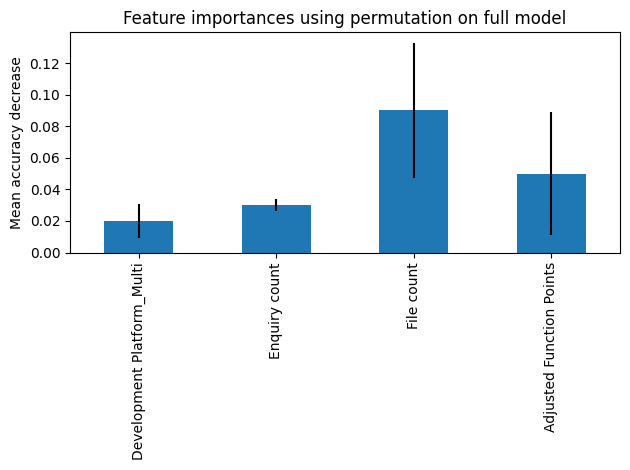

In [ ]:
# Uso de permutation importance
permu = permutation_importance(modelo_rf, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(2), index=feature_names)[permu.importances_mean.round(2) > 0.01]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(2) > 0.01], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

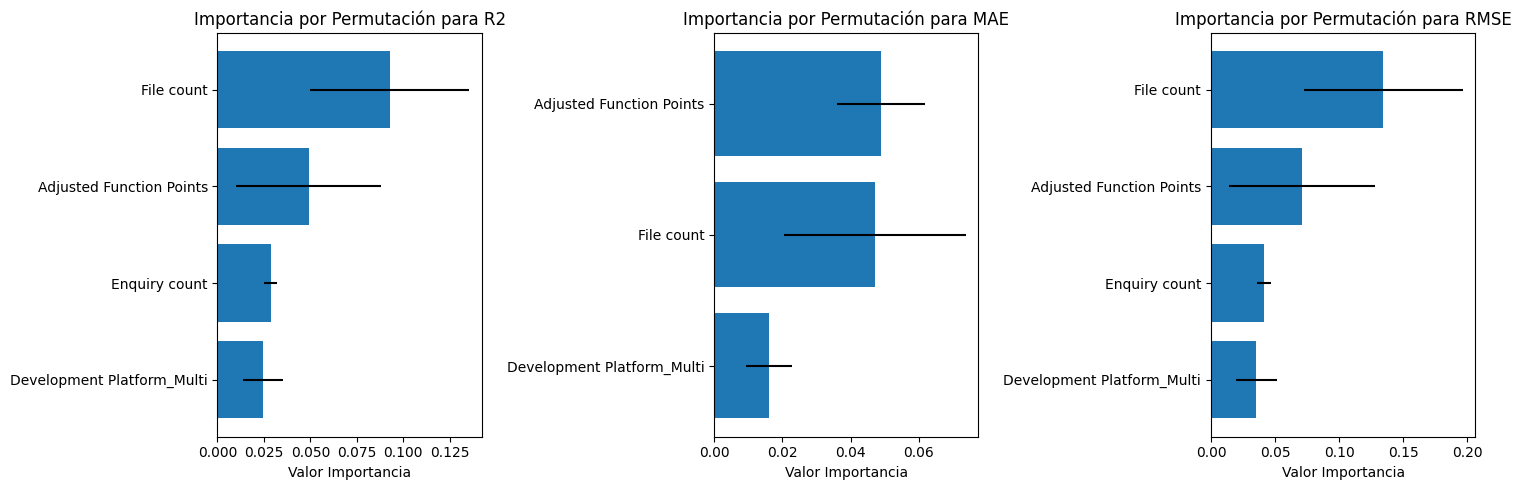

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_rf, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(2) > 0.01]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_rf = {}

permu_score = permutation_importance(modelo_rf, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(2) > 0.01]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_rf[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_rf['df_global_R2']

Feature  Importance_Mean  Importance_Std
2                  File count         0.092649        0.042814
3    Adjusted Function Points         0.049002        0.039109
1               Enquiry count         0.028609        0.003649
0  Development Platform_Multi         0.024431        0.010860

In [ ]:
results_global_rf['df_global_MAE']

Feature  Importance_Mean  Importance_Std
2    Adjusted Function Points         0.048772        0.012893
1                  File count         0.047037        0.026713
0  Development Platform_Multi         0.015974        0.006743

In [ ]:
results_global_rf['df_global_RMSE']

Feature  Importance_Mean  Importance_Std
2                  File count         0.134414        0.062114
3    Adjusted Function Points         0.071091        0.056739
1               Enquiry count         0.041505        0.005294
0  Development Platform_Multi         0.035445        0.015755

**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_rf, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 137 rows 35 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 137 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7a8245779d80> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.629, mean = -0.124, max = 2.47
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.807, mean = 0.0515, max = 3.53
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  23
El valor máximo obtenido es:  2.445554156569786
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  17
El valor mínimo obtenido es:  -0.6280786979395808
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  31
El valor de la mediana es:  -0.2363895146945584


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

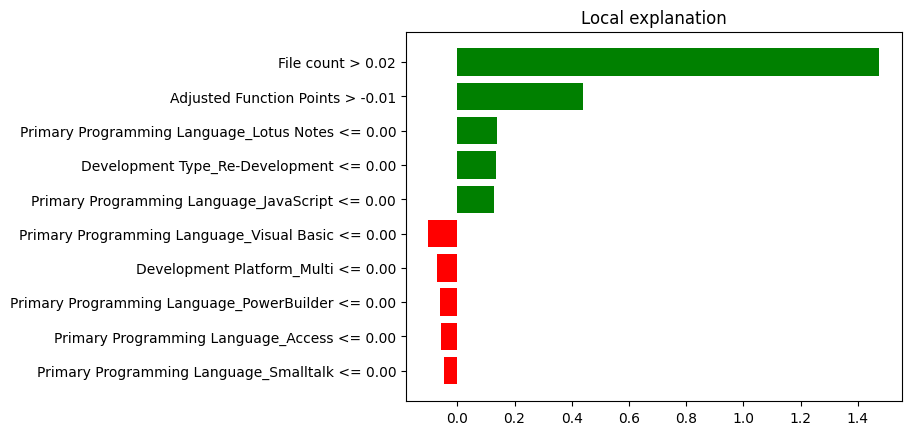

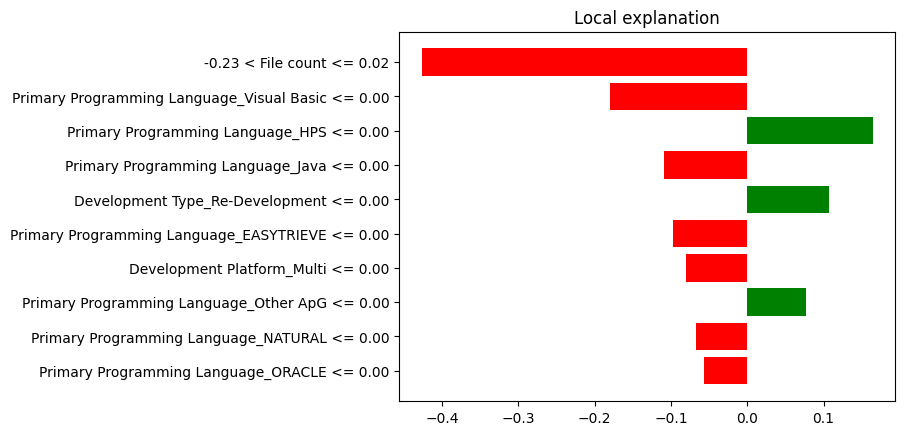

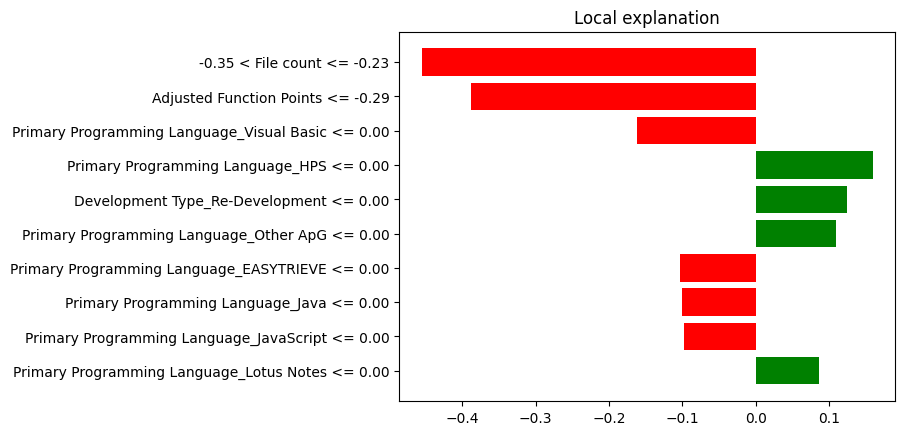

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 36])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(35)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)
lime_df_max.at[0, "Variable"] = "File count"
lime_df_max.at[1, "Variable"] = "Adjusted Function Points"
lime_df_max.at[2, "Variable"] = "Primary Programming Language_Lotus Notes"
lime_df_max.at[3, "Variable"] = "Development Type_Re-Development"
lime_df_max.at[4, "Variable"] = "Primary Programming Language_JavaScript"

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

                   Variable  Ranking     Signo
0                File count        1  Positivo
1  Adjusted Function Points        2  Positivo
2              Output count        3  Positivo
3             Enquiry count        4  Positivo
4           Interface count        5  Positivo
                     Variable  Ranking     Signo
0                  File count        1  Positivo
1    Adjusted Function Points        2  Positivo
2               Enquiry count        3  Positivo
3                Output count        4  Positivo
4  Development Platform_Multi        5  Negativo
                                   Variable  Ranking     Signo
0                                File count        1  Positivo
1                  Adjusted Function Points        2  Positivo
2  Primary Programming Language_Lotus Notes        3  Positivo
3           Development Type_Re-Development        4  Positivo
4   Primary Programming Language_JavaScript        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['File count', 'Adjusted Function Points', 'Output count', 'Enquiry count', 'Interface count']
['File count', 'Adjusted Function Points', 'Enquiry count', 'Output count', 'Development Platform_Multi']
['File count', 'Adjusted Function Points', 'Primary Programming Language_Lotus Notes', 'Development Type_Re-Development', 'Primary Programming Language_JavaScript']
['Interface count', 'Adjusted Function Points', 'Development Platform_Multi', 'Primary Programming Language_JavaScript', 'Development Type_Re-Development', 'Primary Programming Language_Lotus Notes', 'Enquiry count', 'File count', 'Output count']


Variable Breakdown           Shapley  \
                                              Ranking     Signo Ranking   
0                           Interface count         5  Positivo       -   
1                  Adjusted Function Points         2  Positivo       2   
2                Development Platform_Multi         -         -       5   
3   Primary Programming Language_JavaScript         -         -       -   
4           Development Type_Re-Development         -         -       -   
5  Primary Programming Language_Lotus Notes         -         -       -   
6                             Enquiry count         4  Positivo       3   
7                                File count         1  Positivo       1   
8                              Output count         3  Positivo       4   

               Lime            
      Signo Ranking     Signo  
0         -       -         -  
1  Positivo       2  Positivo  
2  Negativo       -         -  
3         -       5  Positivo  
4         -       4  Positivo  
5         -       3  Positivo  
6  Positivo       -         -  
7  Positivo       1  Positivo  
8  Positivo       -         -

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["File count", "Adjusted Function Points", "Output count", "Enquiry count", "Interface count", "Development Platform_Multi", "Primary Programming Language_Lotus Notes", "Development Type_Re-Development", "Primary Programming Language_JavaScript"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley  \
                                           Ranking     Signo Ranking   
Variable                                                               
File count                                       1  Positivo       1   
Adjusted Function Points                         2  Positivo       2   
Output count                                     3  Positivo       4   
Enquiry count                                    4  Positivo       3   
Interface count                                  5  Positivo       -   
Development Platform_Multi                       -         -       5   
Primary Programming Language_Lotus Notes         -         -       -   
Development Type_Re-Development                  -         -       -   
Primary Programming Language_JavaScript          -         -       -   

                                                      Lime            
                                             Signo Ranking     Signo  
Variable                                                              
File count                                Positivo       1  Positivo  
Adjusted Function Points                  Positivo       2  Positivo  
Output count                              Positivo       -         -  
Enquiry count                             Positivo       -         -  
Interface count                                  -       -         -  
Development Platform_Multi                Negativo       -         -  
Primary Programming Language_Lotus Notes         -       3  Positivo  
Development Type_Re-Development                  -       4  Positivo  
Primary Programming Language_JavaScript          -       5  Positivo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 36])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(35)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[0, "Variable"] = "File count"
lime_df_median.at[1, "Variable"] = "Primary Programming Language_Visual Basic"
lime_df_median.at[2, "Variable"] = "Primary Programming Language_HPS"
lime_df_median.at[3, "Variable"] = "Primary Programming Language_Java"
lime_df_median.at[4, "Variable"] = "Development Type_Re-Development"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

                     Variable  Ranking     Signo
0                  File count        1  Negativo
1    Adjusted Function Points        2  Positivo
2  Development Platform_Multi        3  Negativo
3             Interface count        4  Negativo
4               Enquiry count        5  Negativo
                                    Variable  Ranking     Signo
0                                 File count        1  Negativo
1                   Adjusted Function Points        2  Positivo
2                 Development Platform_Multi        3  Negativo
3                            Interface count        4  Negativo
4  Primary Programming Language_Visual Basic        5  Negativo
                                    Variable  Ranking     Signo
0                                 File count        1  Negativo
1  Primary Programming Language_Visual Basic        2  Negativo
2           Primary Programming Language_HPS        3  Positivo
3          Primary Programming Language_Java        4  Negativo
4 

In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['File count', 'Adjusted Function Points', 'Development Platform_Multi', 'Interface count', 'Enquiry count']
['File count', 'Adjusted Function Points', 'Development Platform_Multi', 'Interface count', 'Primary Programming Language_Visual Basic']
['File count', 'Primary Programming Language_Visual Basic', 'Primary Programming Language_HPS', 'Primary Programming Language_Java', 'Development Type_Re-Development']
['Interface count', 'Adjusted Function Points', 'Development Platform_Multi', 'Development Type_Re-Development', 'Primary Programming Language_HPS', 'Enquiry count', 'Primary Programming Language_Java', 'File count', 'Primary Programming Language_Visual Basic']


Variable Breakdown           Shapley  \
                                               Ranking     Signo Ranking   
0                            Interface count         4  Negativo       4   
1                   Adjusted Function Points         2  Positivo       2   
2                 Development Platform_Multi         3  Negativo       3   
3            Development Type_Re-Development         -         -       -   
4           Primary Programming Language_HPS         -         -       -   
5                              Enquiry count         5  Negativo       -   
6          Primary Programming Language_Java         -         -       -   
7                                 File count         1  Negativo       1   
8  Primary Programming Language_Visual Basic         -         -       5   

               Lime            
      Signo Ranking     Signo  
0  Negativo       -         -  
1  Positivo       -         -  
2  Negativo       -         -  
3         -       5  Positivo  
4         -       3  Positivo  
5         -       -         -  
6         -       4  Negativo  
7  Negativo       1  Negativo  
8  Negativo       2  Negativo

In [ ]:
df_final_median.set_index('Variable', inplace=True)

nuevo_orden = ["File count","Adjusted Function Points", "Development Platform_Multi", "Interface count", "Enquiry count", "Primary Programming Language_Visual Basic", "Primary Programming Language_HPS", "Primary Programming Language_Java", "Development Type_Re-Development"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley  \
                                            Ranking     Signo Ranking   
Variable                                                                
File count                                        1  Negativo       1   
Adjusted Function Points                          2  Positivo       2   
Development Platform_Multi                        3  Negativo       3   
Interface count                                   4  Negativo       4   
Enquiry count                                     5  Negativo       -   
Primary Programming Language_Visual Basic         -         -       5   
Primary Programming Language_HPS                  -         -       -   
Primary Programming Language_Java                 -         -       -   
Development Type_Re-Development                   -         -       -   

                                                       Lime            
                                              Signo Ranking     Signo  
Variable                                                               
File count                                 Negativo       1  Negativo  
Adjusted Function Points                   Positivo       -         -  
Development Platform_Multi                 Negativo       -         -  
Interface count                            Negativo       -         -  
Enquiry count                                     -       -         -  
Primary Programming Language_Visual Basic  Negativo       2  Negativo  
Primary Programming Language_HPS                  -       3  Positivo  
Primary Programming Language_Java                 -       4  Negativo  
Development Type_Re-Development                   -       5  Positivo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 36])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(35)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)
lime_df_min.at[0, "Variable"] = "File count"
lime_df_min.at[1, "Variable"] = "Adjusted Function Points"
lime_df_min.at[2, "Variable"] = "Primary Programming Language_Visual Basic"
lime_df_min.at[3, "Variable"] = "Primary Programming Language_HPS"
lime_df_min.at[4, "Variable"] = "Development Type_Re-Development"

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

                                    Variable  Ranking     Signo
0                   Adjusted Function Points        1  Negativo
1                                 File count        2  Negativo
2                              Enquiry count        3  Negativo
3                            Interface count        4  Negativo
4  Primary Programming Language_Visual Basic        5  Negativo
                     Variable  Ranking     Signo
0    Adjusted Function Points        1  Negativo
1                  File count        2  Negativo
2               Enquiry count        3  Negativo
3  Development Platform_Multi        4  Negativo
4             Interface count        5  Negativo
                                    Variable  Ranking     Signo
0                                 File count        1  Negativo
1                   Adjusted Function Points        2  Negativo
2  Primary Programming Language_Visual Basic        3  Negativo
3           Primary Programming Language_HPS        4  Positivo
4 

In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['Adjusted Function Points', 'File count', 'Enquiry count', 'Interface count', 'Primary Programming Language_Visual Basic']
['Adjusted Function Points', 'File count', 'Enquiry count', 'Development Platform_Multi', 'Interface count']
['File count', 'Adjusted Function Points', 'Primary Programming Language_Visual Basic', 'Primary Programming Language_HPS', 'Development Type_Re-Development']
['Interface count', 'Adjusted Function Points', 'Development Platform_Multi', 'Development Type_Re-Development', 'Primary Programming Language_HPS', 'Enquiry count', 'File count', 'Primary Programming Language_Visual Basic']


Variable Breakdown           Shapley  \
                                               Ranking     Signo Ranking   
0                            Interface count         4  Negativo       5   
1                   Adjusted Function Points         1  Negativo       1   
2                 Development Platform_Multi         -         -       4   
3            Development Type_Re-Development         -         -       -   
4           Primary Programming Language_HPS         -         -       -   
5                              Enquiry count         3  Negativo       3   
6                                 File count         2  Negativo       2   
7  Primary Programming Language_Visual Basic         5  Negativo       -   

               Lime            
      Signo Ranking     Signo  
0  Negativo       -         -  
1  Negativo       2  Negativo  
2  Negativo       -         -  
3         -       5  Positivo  
4         -       4  Positivo  
5  Negativo       -         -  
6  Negativo       1  Negativo  
7         -       3  Negativo

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["Adjusted Function Points", "File count", "Enquiry count", "Interface count", "Primary Programming Language_Visual Basic", "Development Platform_Multi", "Primary Programming Language_HPS", "Development Type_Re-Development"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley  \
                                            Ranking     Signo Ranking   
Variable                                                                
Adjusted Function Points                          1  Negativo       1   
File count                                        2  Negativo       2   
Enquiry count                                     3  Negativo       3   
Interface count                                   4  Negativo       5   
Primary Programming Language_Visual Basic         5  Negativo       -   
Development Platform_Multi                        -         -       4   
Primary Programming Language_HPS                  -         -       -   
Development Type_Re-Development                   -         -       -   

                                                       Lime            
                                              Signo Ranking     Signo  
Variable                                                               
Adjusted Function Points                   Negativo       2  Negativo  
File count                                 Negativo       1  Negativo  
Enquiry count                              Negativo       -         -  
Interface count                            Negativo       -         -  
Primary Programming Language_Visual Basic         -       3  Negativo  
Development Platform_Multi                 Negativo       -         -  
Primary Programming Language_HPS                  -       4  Positivo  
Development Type_Re-Development                   -       5  Positivo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('File count', 1), ('Adjusted Function Points', 2), ('Output count', 3), ('Enquiry count', 4), ('Interface count', 5), ('File count', 1), ('Adjusted Function Points', 2), ('Development Platform_Multi', 3), ('Interface count', 4), ('Enquiry count', 5), ('Adjusted Function Points', 1), ('File count', 2), ('Enquiry count', 3), ('Interface count', 4), ('Primary Programming Language_Visual Basic', 5)], 'Shapley': [('File count', 1), ('Adjusted Function Points', 2), ('Output count', 4), ('Enquiry count', 3), ('Development Platform_Multi', 5), ('File count', 1), ('Adjusted Function Points', 2), ('Development Platform_Multi', 3), ('Interface count', 4), ('Primary Programming Language_Visual Basic', 5), ('Adjusted Function Points', 1), ('File count', 2), ('Enquiry count', 3), ('Interface count', 5), ('Development Platform_Multi', 4)], 'Lime': [('File count', 1), ('Adjusted Function Points', 2), ('Primary Programming Language_Lotus Notes', 3), ('Development Type_Re-Development', 4

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_rf = pd.DataFrame(data_dict, index=all_caract)

df_resumen_rf

Breakdown              Shapley  \
                                          Ranking Medio Conteo Ranking Medio   
Output count                                        3.0      1           4.0   
File count                                     1.333333      3      1.333333   
Primary Programming Language_Visual Basic           5.0      1           5.0   
Enquiry count                                       4.0      3           3.0   
Primary Programming Language_Java                     -      -             -   
Primary Programming Language_HPS                      -      -             -   
Primary Programming Language_Lotus Notes              -      -             -   
Development Type_Re-Development                       -      -             -   
Primary Programming Language_JavaScript               -      -             -   
Development Platform_Multi                          3.0      1           4.0   
Adjusted Function Points                       1.666667      3      1.666667   
Interface count                                4.333333      3           4.5   

                                                          Lime         
                                          Conteo Ranking Medio Conteo  
Output count                                   1             -      -  
File count                                     3           1.0      3  
Primary Programming Language_Visual Basic      1           2.5      2  
Enquiry count                                  2             -      -  
Primary Programming Language_Java              -           4.0      1  
Primary Programming Language_HPS               -           3.5      2  
Primary Programming Language_Lotus Notes       -           3.0      1  
Development Type_Re-Development                -      4.666667      3  
Primary Programming Language_JavaScript        -           5.0      1  
Development Platform_Multi                     3             -      -  
Adjusted Function Points                       3           2.0      2  
Interface count                                2             -      -

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_rf[("General", "Ranking")] = df_resumen_rf[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_rf[("General", "Conteo Total")] = df_resumen_rf[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_rf

Breakdown              Shapley  \
                                          Ranking Medio Conteo Ranking Medio   
Output count                                        3.0      1           4.0   
File count                                     1.333333      3      1.333333   
Primary Programming Language_Visual Basic           5.0      1           5.0   
Enquiry count                                       4.0      3           3.0   
Primary Programming Language_Java                     -      -             -   
Primary Programming Language_HPS                      -      -             -   
Primary Programming Language_Lotus Notes              -      -             -   
Development Type_Re-Development                       -      -             -   
Primary Programming Language_JavaScript               -      -             -   
Development Platform_Multi                          3.0      1           4.0   
Adjusted Function Points                       1.666667      3      1.666667   
Interface count                                4.333333      3           4.5   

                                                          Lime         \
                                          Conteo Ranking Medio Conteo   
Output count                                   1             -      -   
File count                                     3           1.0      3   
Primary Programming Language_Visual Basic      1           2.5      2   
Enquiry count                                  2             -      -   
Primary Programming Language_Java              -           4.0      1   
Primary Programming Language_HPS               -           3.5      2   
Primary Programming Language_Lotus Notes       -           3.0      1   
Development Type_Re-Development                -      4.666667      3   
Primary Programming Language_JavaScript        -           5.0      1   
Development Platform_Multi                     3             -      -   
Adjusted Function Points                       3           2.0      2   
Interface count                                2             -      -   

                                            General               
                                            Ranking Conteo Total  
Output count                               3.500000            2  
File count                                 1.222222            9  
Primary Programming Language_Visual Basic  4.166667            4  
Enquiry count                              3.500000            5  
Primary Programming Language_Java          4.000000            1  
Primary Programming Language_HPS           3.500000            2  
Primary Programming Language_Lotus Notes   3.000000            1  
Development Type_Re-Development            4.666667            3  
Primary Programming Language_JavaScript    5.000000            1  
Development Platform_Multi                 3.500000            4  
Adjusted Function Points                   1.777778            8  
Interface count                            4.416667            5

In [ ]:
# Obtener el número de características
num_caract = df_resumen_rf.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_rf[("General", "Peso Rango")] = 1 - ((df_resumen_rf[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_rf[("General", "Peso Conteo")] = df_resumen_rf[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_rf[("General", "Puntaje")] = df_resumen_rf[("General", "Peso Rango")] + df_resumen_rf[("General", "Peso Conteo")]
df_resumen_rf[("General", "Ranking")] = df_resumen_rf[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_rf.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_rf.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_rf.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_rf

Breakdown              Shapley  \
                                          Ranking Medio Conteo Ranking Medio   
Output count                                        3.0      1           4.0   
File count                                     1.333333      3      1.333333   
Primary Programming Language_Visual Basic           5.0      1           5.0   
Enquiry count                                       4.0      3           3.0   
Primary Programming Language_Java                     -      -             -   
Primary Programming Language_HPS                      -      -             -   
Primary Programming Language_Lotus Notes              -      -             -   
Development Type_Re-Development                       -      -             -   
Primary Programming Language_JavaScript               -      -             -   
Development Platform_Multi                          3.0      1           4.0   
Adjusted Function Points                       1.666667      3      1.666667   
Interface count                                4.333333      3           4.5   

                                                          Lime        General  \
                                          Conteo Ranking Medio Conteo Ranking   
Output count                                   1             -      -     6.0   
File count                                     3           1.0      3     1.0   
Primary Programming Language_Visual Basic      1           2.5      2     9.0   
Enquiry count                                  2             -      -     3.0   
Primary Programming Language_Java              -           4.0      1    11.0   
Primary Programming Language_HPS               -           3.5      2     6.0   
Primary Programming Language_Lotus Notes       -           3.0      1     6.0   
Development Type_Re-Development                -      4.666667      3    10.0   
Primary Programming Language_JavaScript        -           5.0      1    12.0   
Development Platform_Multi                     3             -      -     4.0   
Adjusted Function Points                       3           2.0      2     2.0   
Interface count                                2             -      -     5.0   

                                                        
                                          Conteo Total  
Output count                                         2  
File count                                           9  
Primary Programming Language_Visual Basic            4  
Enquiry count                                        5  
Primary Programming Language_Java                    1  
Primary Programming Language_HPS                     2  
Primary Programming Language_Lotus Notes             1  
Development Type_Re-Development                      3  
Primary Programming Language_JavaScript              1  
Development Platform_Multi                           4  
Adjusted Function Points                             8  
Interface count                                      5

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_rf.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_rf = df_resumen_rf[new_columns]

In [ ]:
df_resumen_rf.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_rf[(tech, "Ranking Medio")] = df_resumen_rf[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_rf

General                  Breakdown  \
                                          Ranking Conteo Total Ranking Medio   
File count                                    1.0            9          1.33   
Adjusted Function Points                      2.0            8          1.67   
Enquiry count                                 3.0            5          4.00   
Development Platform_Multi                    4.0            4          3.00   
Interface count                               5.0            5          4.33   
Output count                                  6.0            2          3.00   
Primary Programming Language_HPS              6.0            2             -   
Primary Programming Language_Lotus Notes      6.0            1             -   
Primary Programming Language_Visual Basic     9.0            4          5.00   
Development Type_Re-Development              10.0            3             -   
Primary Programming Language_Java            11.0            1             -   
Primary Programming Language_JavaScript      12.0            1             -   

                                                       Shapley         \
                                          Conteo Ranking Medio Conteo   
File count                                     3          1.33      3   
Adjusted Function Points                       3          1.67      3   
Enquiry count                                  3          3.00      2   
Development Platform_Multi                     1          4.00      3   
Interface count                                3          4.50      2   
Output count                                   1          4.00      1   
Primary Programming Language_HPS               -             -      -   
Primary Programming Language_Lotus Notes       -             -      -   
Primary Programming Language_Visual Basic      1          5.00      1   
Development Type_Re-Development                -             -      -   
Primary Programming Language_Java              -             -      -   
Primary Programming Language_JavaScript        -             -      -   

                                                   Lime         
                                          Ranking Medio Conteo  
File count                                         1.00      3  
Adjusted Function Points                           2.00      2  
Enquiry count                                         -      -  
Development Platform_Multi                            -      -  
Interface count                                       -      -  
Output count                                          -      -  
Primary Programming Language_HPS                   3.50      2  
Primary Programming Language_Lotus Notes           3.00      1  
Primary Programming Language_Visual Basic          2.50      2  
Development Type_Re-Development                    4.67      3  
Primary Programming Language_Java                  4.00      1  
Primary Programming Language_JavaScript            5.00      1

## **GradientBoostingRegresor:**

**FEATURE IMPORTANCE:**

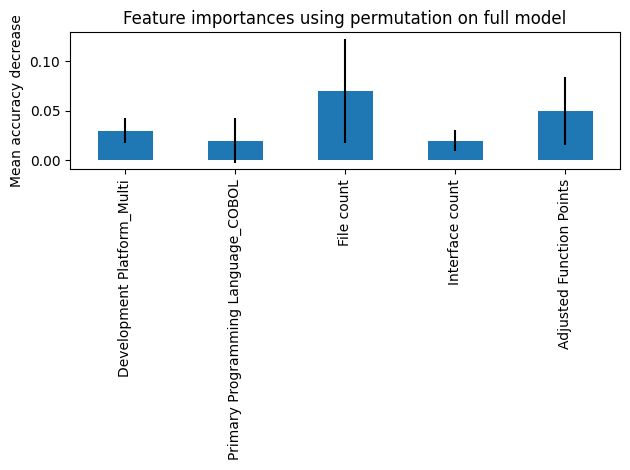

In [ ]:
# Uso de permutation importance
permu = permutation_importance(modelo_gbr, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(2), index=feature_names)[permu.importances_mean.round(2) > 0.01]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(2) > 0.01], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

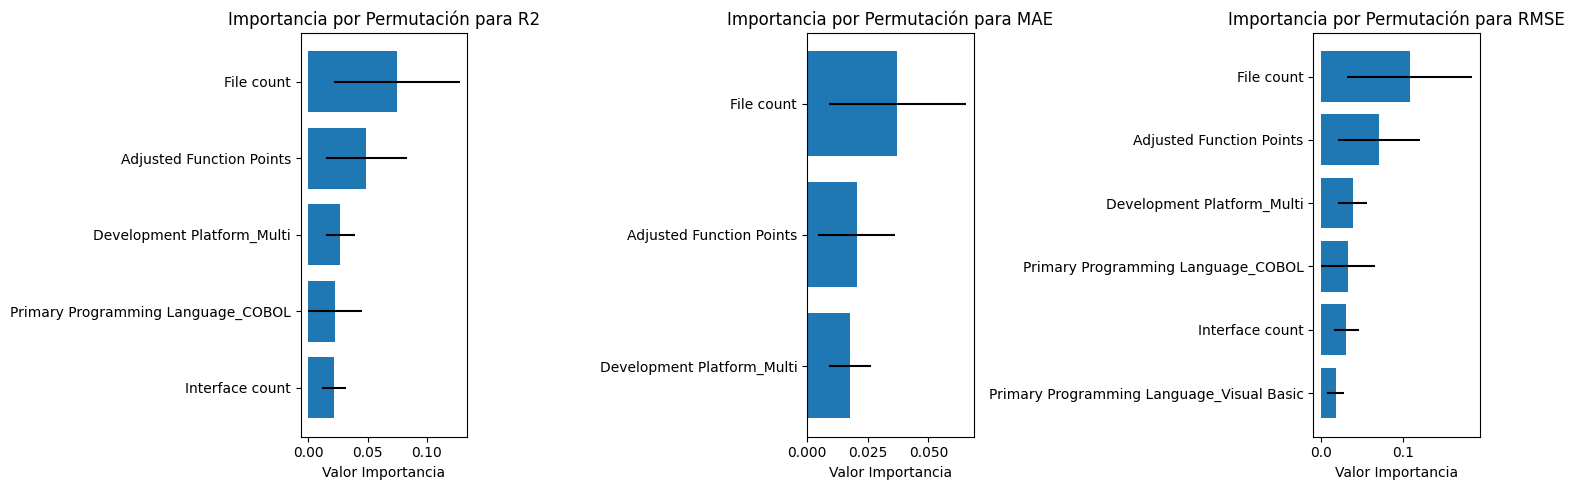

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_gbr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(2) > 0.01]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_gbr = {}

permu_score = permutation_importance(modelo_gbr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(2) > 0.01]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_gbr[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_gbr['df_global_R2']

Feature  Importance_Mean  Importance_Std
2                          File count         0.074840        0.052809
4            Adjusted Function Points         0.048962        0.034393
0          Development Platform_Multi         0.026797        0.012285
1  Primary Programming Language_COBOL         0.022581        0.022728
3                     Interface count         0.021425        0.010315

In [ ]:
results_global_gbr['df_global_MAE']

Feature  Importance_Mean  Importance_Std
1                  File count         0.037106        0.028234
2    Adjusted Function Points         0.020408        0.015966
0  Development Platform_Multi         0.017749        0.008537

In [ ]:
results_global_gbr['df_global_RMSE']

Feature  Importance_Mean  Importance_Std
3                                 File count         0.108578        0.076615
5                   Adjusted Function Points         0.071034        0.049897
0                 Development Platform_Multi         0.038877        0.017824
1         Primary Programming Language_COBOL         0.032760        0.032973
4                            Interface count         0.031083        0.014965
2  Primary Programming Language_Visual Basic         0.017971        0.010598

**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_gbr, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 137 rows 35 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 137 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7a8245779d80> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.654, mean = -0.0734, max = 5.98
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.000467, mean = 0.000555, max = 0.0383
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  23
El valor máximo obtenido es:  2.359949625279178
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  0
El valor mínimo obtenido es:  -0.6142465693468683
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  16
El valor de la mediana es:  -0.26983678123161003


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

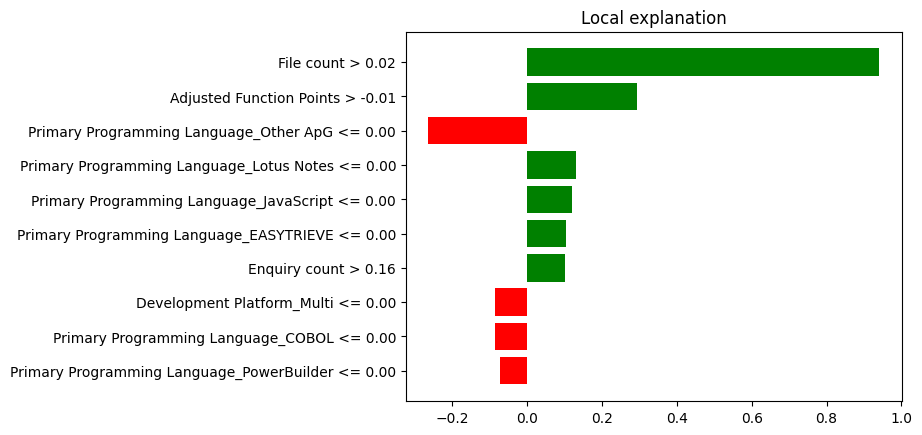

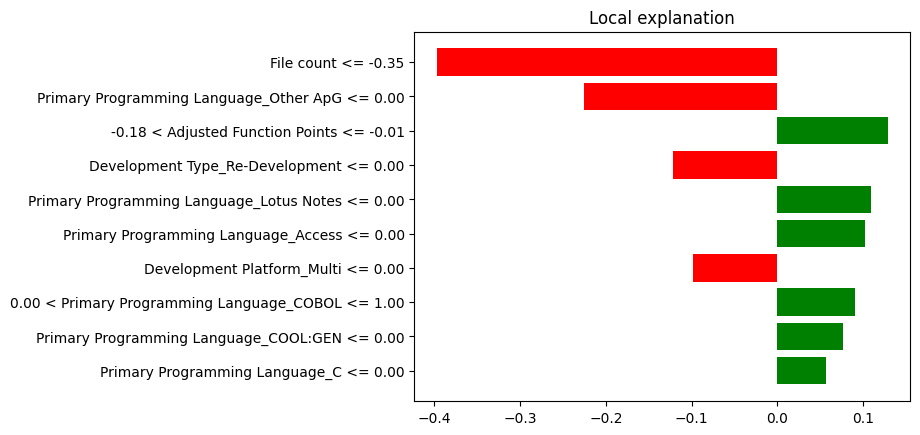

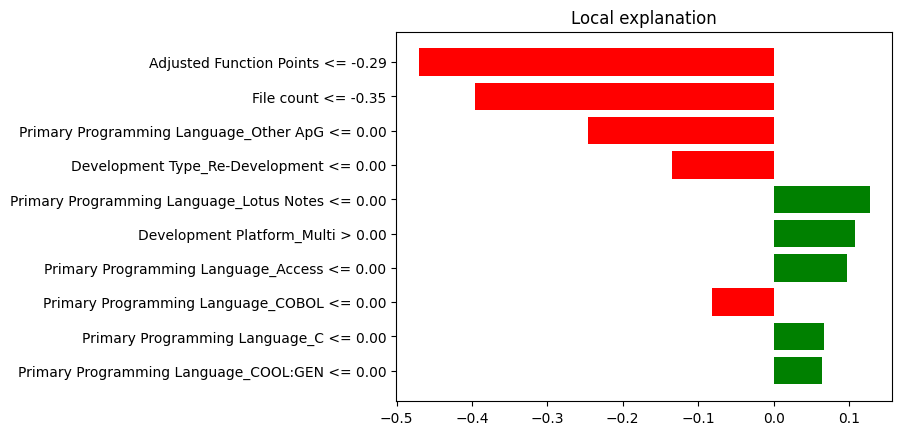

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 36])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(35)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)
lime_df_max.at[0, "Variable"] = "File count"
lime_df_max.at[1, "Variable"] = "Adjusted Function Points"
lime_df_max.at[2, "Variable"] = "Primary Programming Language_Other ApG"
lime_df_max.at[3, "Variable"] = "Primary Programming Language_Lotus Notes"
lime_df_max.at[4, "Variable"] = "Primary Programming Language_JavaScript"

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

                             Variable  Ranking     Signo
0                          File count        1  Positivo
1            Adjusted Function Points        2  Positivo
2    Primary Programming Language_SQL        3  Positivo
3                       Enquiry count        4  Positivo
4  Primary Programming Language_COBOL        5  Negativo
                             Variable  Ranking     Signo
0                          File count        1  Positivo
1            Adjusted Function Points        2  Positivo
2                       Enquiry count        3  Positivo
3  Primary Programming Language_COBOL        4  Negativo
4                        Output count        5  Positivo
                                   Variable  Ranking     Signo
0                                File count        1  Positivo
1                  Adjusted Function Points        2  Positivo
2    Primary Programming Language_Other ApG        3  Negativo
3  Primary Programming Language_Lotus Notes        4  Positivo
4

In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['File count', 'Adjusted Function Points', 'Primary Programming Language_SQL', 'Enquiry count', 'Primary Programming Language_COBOL']
['File count', 'Adjusted Function Points', 'Enquiry count', 'Primary Programming Language_COBOL', 'Output count']
['File count', 'Adjusted Function Points', 'Primary Programming Language_Other ApG', 'Primary Programming Language_Lotus Notes', 'Primary Programming Language_JavaScript']
['Primary Programming Language_Other ApG', 'Primary Programming Language_JavaScript', 'Adjusted Function Points', 'Primary Programming Language_COBOL', 'Primary Programming Language_Lotus Notes', 'Primary Programming Language_SQL', 'Enquiry count', 'File count', 'Output count']


Variable Breakdown           Shapley  \
                                              Ranking     Signo Ranking   
0    Primary Programming Language_Other ApG         -         -       -   
1   Primary Programming Language_JavaScript         -         -       -   
2                  Adjusted Function Points         2  Positivo       2   
3        Primary Programming Language_COBOL         5  Negativo       4   
4  Primary Programming Language_Lotus Notes         -         -       -   
5          Primary Programming Language_SQL         3  Positivo       -   
6                             Enquiry count         4  Positivo       3   
7                                File count         1  Positivo       1   
8                              Output count         -         -       5   

               Lime            
      Signo Ranking     Signo  
0         -       3  Negativo  
1         -       5  Positivo  
2  Positivo       2  Positivo  
3  Negativo       -         -  
4         -       4  Positivo  
5         -       -         -  
6  Positivo       -         -  
7  Positivo       1  Positivo  
8  Positivo       -         -

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["File count", "Adjusted Function Points", "Primary Programming Language_SQL", "Enquiry count", "Primary Programming Language_COBOL", "Output count", "Primary Programming Language_Other ApG", "Primary Programming Language_Lotus Notes", "Primary Programming Language_JavaScript"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley  \
                                           Ranking     Signo Ranking   
Variable                                                               
File count                                       1  Positivo       1   
Adjusted Function Points                         2  Positivo       2   
Primary Programming Language_SQL                 3  Positivo       -   
Enquiry count                                    4  Positivo       3   
Primary Programming Language_COBOL               5  Negativo       4   
Output count                                     -         -       5   
Primary Programming Language_Other ApG           -         -       -   
Primary Programming Language_Lotus Notes         -         -       -   
Primary Programming Language_JavaScript          -         -       -   

                                                      Lime            
                                             Signo Ranking     Signo  
Variable                                                              
File count                                Positivo       1  Positivo  
Adjusted Function Points                  Positivo       2  Positivo  
Primary Programming Language_SQL                 -       -         -  
Enquiry count                             Positivo       -         -  
Primary Programming Language_COBOL        Negativo       -         -  
Output count                              Positivo       -         -  
Primary Programming Language_Other ApG           -       3  Negativo  
Primary Programming Language_Lotus Notes         -       4  Positivo  
Primary Programming Language_JavaScript          -       5  Positivo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 36])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(35)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[0, "Variable"] = "File count"
lime_df_median.at[1, "Variable"] = "Primary Programming Language_Other ApG"
lime_df_median.at[2, "Variable"] = "Adjusted Function Points"
lime_df_median.at[3, "Variable"] = "Development Type_Re-Development"
lime_df_median.at[4, "Variable"] = "Primary Programming Language_Lotus Notes"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

                             Variable  Ranking     Signo
0                          File count        1  Negativo
1                       Enquiry count        2  Negativo
2  Primary Programming Language_COBOL        3  Positivo
3            Adjusted Function Points        4  Negativo
4                     Interface count        5  Negativo
                             Variable  Ranking     Signo
0                          File count        1  Negativo
1  Primary Programming Language_COBOL        2  Positivo
2                       Enquiry count        3  Negativo
3          Development Platform_Multi        4  Negativo
4                     Interface count        5  Negativo
                                   Variable  Ranking     Signo
0                                File count        1  Negativo
1    Primary Programming Language_Other ApG        2  Negativo
2                  Adjusted Function Points        3  Positivo
3           Development Type_Re-Development        4  Negativo
4

In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['File count', 'Enquiry count', 'Primary Programming Language_COBOL', 'Adjusted Function Points', 'Interface count']
['File count', 'Primary Programming Language_COBOL', 'Enquiry count', 'Development Platform_Multi', 'Interface count']
['File count', 'Primary Programming Language_Other ApG', 'Adjusted Function Points', 'Development Type_Re-Development', 'Primary Programming Language_Lotus Notes']
['Primary Programming Language_Other ApG', 'Interface count', 'Adjusted Function Points', 'Primary Programming Language_COBOL', 'Development Platform_Multi', 'Development Type_Re-Development', 'Primary Programming Language_Lotus Notes', 'Enquiry count', 'File count']


Variable Breakdown           Shapley  \
                                              Ranking     Signo Ranking   
0    Primary Programming Language_Other ApG         -         -       -   
1                           Interface count         5  Negativo       5   
2                  Adjusted Function Points         4  Negativo       -   
3        Primary Programming Language_COBOL         3  Positivo       2   
4                Development Platform_Multi         -         -       4   
5           Development Type_Re-Development         -         -       -   
6  Primary Programming Language_Lotus Notes         -         -       -   
7                             Enquiry count         2  Negativo       3   
8                                File count         1  Negativo       1   

               Lime            
      Signo Ranking     Signo  
0         -       2  Negativo  
1  Negativo       -         -  
2         -       3  Positivo  
3  Positivo       -         -  
4  Negativo       -         -  
5         -       4  Negativo  
6         -       5  Positivo  
7  Negativo       -         -  
8  Negativo       1  Negativo

In [ ]:
df_final_median.set_index('Variable', inplace=True)
nuevo_orden = ["File count", "Enquiry count", "Primary Programming Language_COBOL", "Adjusted Function Points", "Interface count", "Primary Programming Language_Other ApG", "Development Type_Re-Development", "Primary Programming Language_Lotus Notes"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley  \
                                           Ranking     Signo Ranking   
Variable                                                               
File count                                       1  Negativo       1   
Enquiry count                                    2  Negativo       3   
Primary Programming Language_COBOL               3  Positivo       2   
Adjusted Function Points                         4  Negativo       -   
Interface count                                  5  Negativo       5   
Primary Programming Language_Other ApG           -         -       -   
Development Type_Re-Development                  -         -       -   
Primary Programming Language_Lotus Notes         -         -       -   

                                                      Lime            
                                             Signo Ranking     Signo  
Variable                                                              
File count                                Negativo       1  Negativo  
Enquiry count                             Negativo       -         -  
Primary Programming Language_COBOL        Positivo       -         -  
Adjusted Function Points                         -       3  Positivo  
Interface count                           Negativo       -         -  
Primary Programming Language_Other ApG           -       2  Negativo  
Development Type_Re-Development                  -       4  Negativo  
Primary Programming Language_Lotus Notes         -       5  Positivo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 36])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(35)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)
lime_df_min.at[0, "Variable"] = "Adjusted Function Points"
lime_df_min.at[1, "Variable"] = "File count"
lime_df_min.at[2, "Variable"] = "Primary Programming Language_Other ApG"
lime_df_min.at[3, "Variable"] = "Development Type_Re-Development"
lime_df_min.at[4, "Variable"] = "Primary Programming Language_Lotus Notes"

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

                     Variable  Ranking     Signo
0                  File count        1  Negativo
1    Adjusted Function Points        2  Negativo
2               Enquiry count        3  Negativo
3  Development Platform_Multi        4  Positivo
4                Output count        5  Negativo
                     Variable  Ranking     Signo
0    Adjusted Function Points        1  Negativo
1                  File count        2  Negativo
2               Enquiry count        3  Negativo
3  Development Platform_Multi        4  Positivo
4                Output count        5  Negativo
                                   Variable  Ranking     Signo
0                  Adjusted Function Points        1  Negativo
1                                File count        2  Negativo
2    Primary Programming Language_Other ApG        3  Negativo
3           Development Type_Re-Development        4  Negativo
4  Primary Programming Language_Lotus Notes        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['File count', 'Adjusted Function Points', 'Enquiry count', 'Development Platform_Multi', 'Output count']
['Adjusted Function Points', 'File count', 'Enquiry count', 'Development Platform_Multi', 'Output count']
['Adjusted Function Points', 'File count', 'Primary Programming Language_Other ApG', 'Development Type_Re-Development', 'Primary Programming Language_Lotus Notes']
['Primary Programming Language_Other ApG', 'Adjusted Function Points', 'Development Platform_Multi', 'Development Type_Re-Development', 'Primary Programming Language_Lotus Notes', 'Enquiry count', 'File count', 'Output count']


Variable Breakdown           Shapley  \
                                              Ranking     Signo Ranking   
0    Primary Programming Language_Other ApG         -         -       -   
1                  Adjusted Function Points         2  Negativo       1   
2                Development Platform_Multi         4  Positivo       4   
3           Development Type_Re-Development         -         -       -   
4  Primary Programming Language_Lotus Notes         -         -       -   
5                             Enquiry count         3  Negativo       3   
6                                File count         1  Negativo       2   
7                              Output count         5  Negativo       5   

               Lime            
      Signo Ranking     Signo  
0         -       3  Negativo  
1  Negativo       1  Negativo  
2  Positivo       -         -  
3         -       4  Negativo  
4         -       5  Positivo  
5  Negativo       -         -  
6  Negativo       2  Negativo  
7  Negativo       -         -

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["File count", "Adjusted Function Points", "Enquiry count", "Development Platform_Multi", "Output count", "Primary Programming Language_Other ApG", "Development Type_Re-Development", "Primary Programming Language_Lotus Notes"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley  \
                                           Ranking     Signo Ranking   
Variable                                                               
File count                                       1  Negativo       2   
Adjusted Function Points                         2  Negativo       1   
Enquiry count                                    3  Negativo       3   
Development Platform_Multi                       4  Positivo       4   
Output count                                     5  Negativo       5   
Primary Programming Language_Other ApG           -         -       -   
Development Type_Re-Development                  -         -       -   
Primary Programming Language_Lotus Notes         -         -       -   

                                                      Lime            
                                             Signo Ranking     Signo  
Variable                                                              
File count                                Negativo       2  Negativo  
Adjusted Function Points                  Negativo       1  Negativo  
Enquiry count                             Negativo       -         -  
Development Platform_Multi                Positivo       -         -  
Output count                              Negativo       -         -  
Primary Programming Language_Other ApG           -       3  Negativo  
Development Type_Re-Development                  -       4  Negativo  
Primary Programming Language_Lotus Notes         -       5  Positivo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('File count', 1), ('Adjusted Function Points', 2), ('Primary Programming Language_SQL', 3), ('Enquiry count', 4), ('Primary Programming Language_COBOL', 5), ('File count', 1), ('Enquiry count', 2), ('Primary Programming Language_COBOL', 3), ('Adjusted Function Points', 4), ('Interface count', 5), ('File count', 1), ('Adjusted Function Points', 2), ('Enquiry count', 3), ('Development Platform_Multi', 4), ('Output count', 5)], 'Shapley': [('File count', 1), ('Adjusted Function Points', 2), ('Enquiry count', 3), ('Primary Programming Language_COBOL', 4), ('Output count', 5), ('File count', 1), ('Enquiry count', 3), ('Primary Programming Language_COBOL', 2), ('Interface count', 5), ('File count', 2), ('Adjusted Function Points', 1), ('Enquiry count', 3), ('Development Platform_Multi', 4), ('Output count', 5)], 'Lime': [('File count', 1), ('Adjusted Function Points', 2), ('Primary Programming Language_Other ApG', 3), ('Primary Programming Language_Lotus Notes', 4), ('Primary

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_gbr = pd.DataFrame(data_dict, index=all_caract)

df_resumen_gbr

Breakdown              Shapley  \
                                         Ranking Medio Conteo Ranking Medio   
Output count                                       5.0      1           5.0   
File count                                         1.0      3      1.333333   
Primary Programming Language_SQL                   3.0      1             -   
Enquiry count                                      3.0      3           3.0   
Primary Programming Language_Lotus Notes             -      -             -   
Development Type_Re-Development                      -      -             -   
Primary Programming Language_JavaScript              -      -             -   
Development Platform_Multi                         4.0      1           4.0   
Primary Programming Language_COBOL                 4.0      2           3.0   
Adjusted Function Points                      2.666667      3           1.5   
Interface count                                    5.0      1           5.0   
Primary Programming Language_Other ApG               -      -             -   

                                                         Lime         
                                         Conteo Ranking Medio Conteo  
Output count                                  2             -      -  
File count                                    3      1.333333      3  
Primary Programming Language_SQL              -             -      -  
Enquiry count                                 3             -      -  
Primary Programming Language_Lotus Notes      -      4.666667      3  
Development Type_Re-Development               -           4.0      2  
Primary Programming Language_JavaScript       -           5.0      1  
Development Platform_Multi                    1             -      -  
Primary Programming Language_COBOL            2             -      -  
Adjusted Function Points                      2           2.0      3  
Interface count                               1             -      -  
Primary Programming Language_Other ApG        -      2.666667      3

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_gbr[("General", "Ranking")] = df_resumen_gbr[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_gbr[("General", "Conteo Total")] = df_resumen_gbr[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_gbr

Breakdown              Shapley  \
                                         Ranking Medio Conteo Ranking Medio   
Output count                                       5.0      1           5.0   
File count                                         1.0      3      1.333333   
Primary Programming Language_SQL                   3.0      1             -   
Enquiry count                                      3.0      3           3.0   
Primary Programming Language_Lotus Notes             -      -             -   
Development Type_Re-Development                      -      -             -   
Primary Programming Language_JavaScript              -      -             -   
Development Platform_Multi                         4.0      1           4.0   
Primary Programming Language_COBOL                 4.0      2           3.0   
Adjusted Function Points                      2.666667      3           1.5   
Interface count                                    5.0      1           5.0   
Primary Programming Language_Other ApG               -      -             -   

                                                         Lime         \
                                         Conteo Ranking Medio Conteo   
Output count                                  2             -      -   
File count                                    3      1.333333      3   
Primary Programming Language_SQL              -             -      -   
Enquiry count                                 3             -      -   
Primary Programming Language_Lotus Notes      -      4.666667      3   
Development Type_Re-Development               -           4.0      2   
Primary Programming Language_JavaScript       -           5.0      1   
Development Platform_Multi                    1             -      -   
Primary Programming Language_COBOL            2             -      -   
Adjusted Function Points                      2           2.0      3   
Interface count                               1             -      -   
Primary Programming Language_Other ApG        -      2.666667      3   

                                           General               
                                           Ranking Conteo Total  
Output count                              5.000000            3  
File count                                1.222222            9  
Primary Programming Language_SQL          3.000000            1  
Enquiry count                             3.000000            6  
Primary Programming Language_Lotus Notes  4.666667            3  
Development Type_Re-Development           4.000000            2  
Primary Programming Language_JavaScript   5.000000            1  
Development Platform_Multi                4.000000            2  
Primary Programming Language_COBOL        3.500000            4  
Adjusted Function Points                  2.055556            8  
Interface count                           5.000000            2  
Primary Programming Language_Other ApG    2.666667            3

In [ ]:
# Obtener el número de características
num_caract = df_resumen_gbr.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_gbr[("General", "Peso Rango")] = 1 - ((df_resumen_gbr[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_gbr[("General", "Peso Conteo")] = df_resumen_gbr[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_gbr[("General", "Puntaje")] = df_resumen_gbr[("General", "Peso Rango")] + df_resumen_gbr[("General", "Peso Conteo")]
df_resumen_gbr[("General", "Ranking")] = df_resumen_gbr[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_gbr.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_gbr.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_gbr.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_gbr

Breakdown              Shapley  \
                                         Ranking Medio Conteo Ranking Medio   
Output count                                       5.0      1           5.0   
File count                                         1.0      3      1.333333   
Primary Programming Language_SQL                   3.0      1             -   
Enquiry count                                      3.0      3           3.0   
Primary Programming Language_Lotus Notes             -      -             -   
Development Type_Re-Development                      -      -             -   
Primary Programming Language_JavaScript              -      -             -   
Development Platform_Multi                         4.0      1           4.0   
Primary Programming Language_COBOL                 4.0      2           3.0   
Adjusted Function Points                      2.666667      3           1.5   
Interface count                                    5.0      1           5.0   
Primary Programming Language_Other ApG               -      -             -   

                                                         Lime        General  \
                                         Conteo Ranking Medio Conteo Ranking   
Output count                                  2             -      -    10.0   
File count                                    3      1.333333      3     1.0   
Primary Programming Language_SQL              -             -      -     7.0   
Enquiry count                                 3             -      -     3.0   
Primary Programming Language_Lotus Notes      -      4.666667      3     6.0   
Development Type_Re-Development               -           4.0      2     8.0   
Primary Programming Language_JavaScript       -           5.0      1    12.0   
Development Platform_Multi                    1             -      -     8.0   
Primary Programming Language_COBOL            2             -      -     5.0   
Adjusted Function Points                      2           2.0      3     2.0   
Interface count                               1             -      -    11.0   
Primary Programming Language_Other ApG        -      2.666667      3     4.0   

                                                       
                                         Conteo Total  
Output count                                        3  
File count                                          9  
Primary Programming Language_SQL                    1  
Enquiry count                                       6  
Primary Programming Language_Lotus Notes            3  
Development Type_Re-Development                     2  
Primary Programming Language_JavaScript             1  
Development Platform_Multi                          2  
Primary Programming Language_COBOL                  4  
Adjusted Function Points                            8  
Interface count                                     2  
Primary Programming Language_Other ApG              3

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_gbr.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_gbr = df_resumen_gbr[new_columns]

In [ ]:
df_resumen_gbr.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_gbr[(tech, "Ranking Medio")] = df_resumen_gbr[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_gbr

General                  Breakdown  \
                                         Ranking Conteo Total Ranking Medio   
File count                                   1.0            9          1.00   
Adjusted Function Points                     2.0            8          2.67   
Enquiry count                                3.0            6          3.00   
Primary Programming Language_Other ApG       4.0            3             -   
Primary Programming Language_COBOL           5.0            4          4.00   
Primary Programming Language_Lotus Notes     6.0            3             -   
Primary Programming Language_SQL             7.0            1          3.00   
Development Type_Re-Development              8.0            2             -   
Development Platform_Multi                   8.0            2          4.00   
Output count                                10.0            3          5.00   
Interface count                             11.0            2          5.00   
Primary Programming Language_JavaScript     12.0            1             -   

                                                      Shapley         \
                                         Conteo Ranking Medio Conteo   
File count                                    3          1.33      3   
Adjusted Function Points                      3          1.50      2   
Enquiry count                                 3          3.00      3   
Primary Programming Language_Other ApG        -             -      -   
Primary Programming Language_COBOL            2          3.00      2   
Primary Programming Language_Lotus Notes      -             -      -   
Primary Programming Language_SQL              1             -      -   
Development Type_Re-Development               -             -      -   
Development Platform_Multi                    1          4.00      1   
Output count                                  1          5.00      2   
Interface count                               1          5.00      1   
Primary Programming Language_JavaScript       -             -      -   

                                                  Lime         
                                         Ranking Medio Conteo  
File count                                        1.33      3  
Adjusted Function Points                          2.00      3  
Enquiry count                                        -      -  
Primary Programming Language_Other ApG            2.67      3  
Primary Programming Language_COBOL                   -      -  
Primary Programming Language_Lotus Notes          4.67      3  
Primary Programming Language_SQL                     -      -  
Development Type_Re-Development                   4.00      2  
Development Platform_Multi                           -      -  
Output count                                         -      -  
Interface count                                      -      -  
Primary Programming Language_JavaScript           5.00      1

## **Voting:**

**FEATURE IMPORTANCE:**

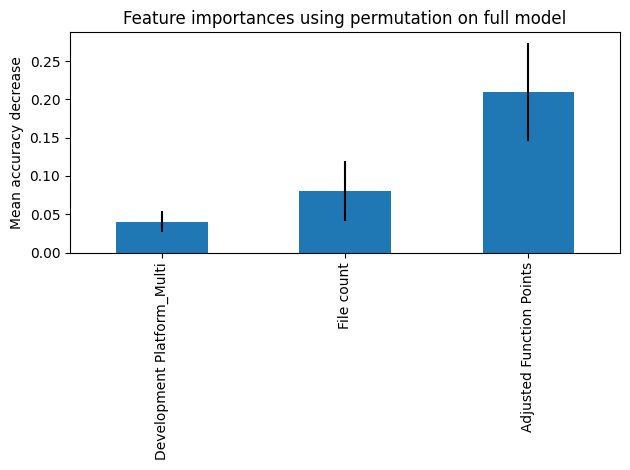

In [ ]:
# Uso de permutation importance
permu = permutation_importance(modelo_voting, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(2), index=feature_names)[permu.importances_mean.round(2) > 0.01]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(2) > 0.01], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

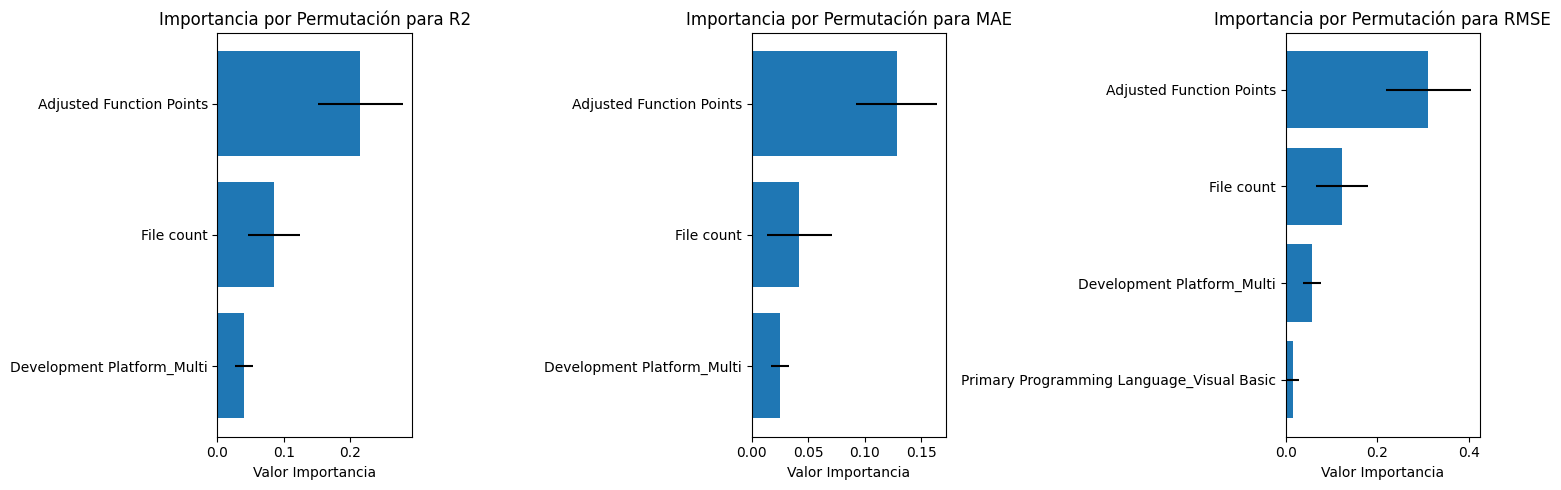

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_voting, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(2) > 0.01]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_vot = {}

permu_score = permutation_importance(modelo_voting, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(2) > 0.01]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_vot[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_vot['df_global_R2']

Feature  Importance_Mean  Importance_Std
2    Adjusted Function Points         0.214773        0.063766
1                  File count         0.084710        0.039356
0  Development Platform_Multi         0.039558        0.013661

In [ ]:
results_global_vot['df_global_MAE']

Feature  Importance_Mean  Importance_Std
2    Adjusted Function Points         0.128333        0.035500
1                  File count         0.042410        0.029090
0  Development Platform_Multi         0.024936        0.008008

In [ ]:
results_global_vot['df_global_RMSE']

Feature  Importance_Mean  Importance_Std
3                   Adjusted Function Points         0.311591        0.092511
2                                 File count         0.122897        0.057098
0                 Development Platform_Multi         0.057390        0.019819
1  Primary Programming Language_Visual Basic         0.015721        0.013969

**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_voting, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 137 rows 35 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 137 values
  -> model_class       : sklearn.ensemble._voting.VotingRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7a8245779d80> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -19.0, mean = -0.407, max = 2.56
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.69, mean = 0.334, max = 25.0
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  22
El valor máximo obtenido es:  1.6695929891196013
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  10
El valor mínimo obtenido es:  -1.6350503600566677
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  4
El valor de la mediana es:  -0.2669410735138326


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

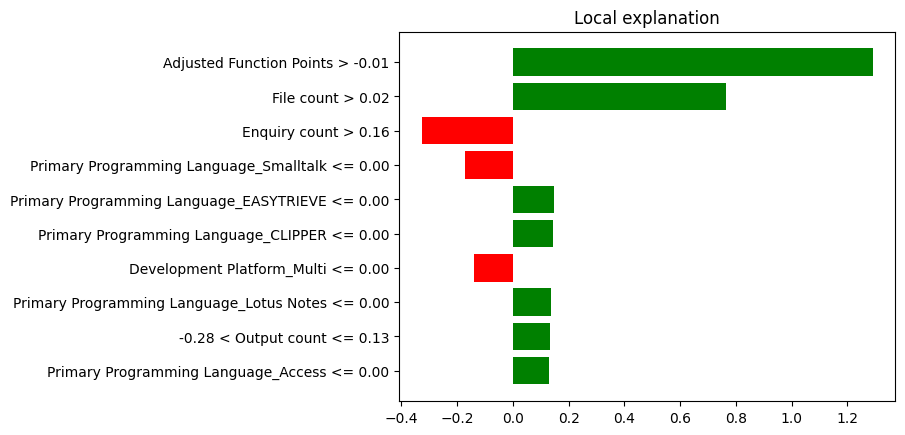

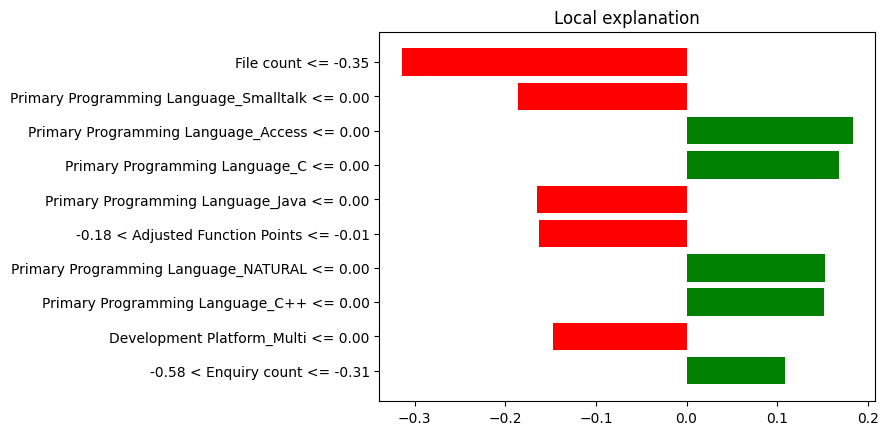

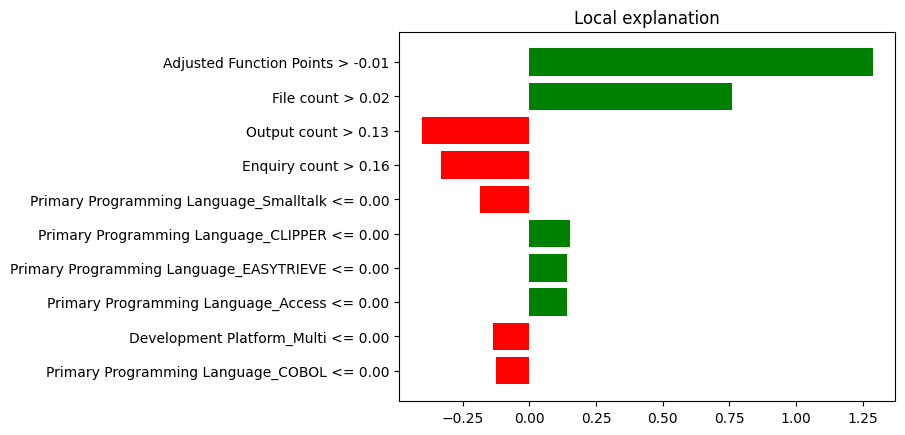

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 36])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(35)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)
lime_df_max.at[0, "Variable"] = "Adjusted Function Points"
lime_df_max.at[1, "Variable"] = "File count"
lime_df_max.at[2, "Variable"] = "Enquiry count"
lime_df_max.at[3, "Variable"] = "Primary Programming Language_Smalltalk"
lime_df_max.at[4, "Variable"] = "Primary Programming Language_EASYTRIEVE"

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

                             Variable  Ranking     Signo
0                          File count        1  Positivo
1            Adjusted Function Points        2  Positivo
2                        Output count        3  Positivo
3             Development Platform_PC        4  Negativo
4  Primary Programming Language_COBOL        5  Negativo
                             Variable  Ranking     Signo
0                          File count        1  Positivo
1            Adjusted Function Points        2  Positivo
2                        Output count        3  Positivo
3             Development Platform_PC        4  Negativo
4  Primary Programming Language_COBOL        5  Negativo
                                  Variable  Ranking     Signo
0                 Adjusted Function Points        1  Positivo
1                               File count        2  Positivo
2                            Enquiry count        3  Negativo
3   Primary Programming Language_Smalltalk        4  Negativo
4  Pri

In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['File count', 'Adjusted Function Points', 'Output count', 'Development Platform_PC', 'Primary Programming Language_COBOL']
['File count', 'Adjusted Function Points', 'Output count', 'Development Platform_PC', 'Primary Programming Language_COBOL']
['Adjusted Function Points', 'File count', 'Enquiry count', 'Primary Programming Language_Smalltalk', 'Primary Programming Language_EASYTRIEVE']
['Primary Programming Language_EASYTRIEVE', 'Adjusted Function Points', 'Primary Programming Language_COBOL', 'Primary Programming Language_Smalltalk', 'Development Platform_PC', 'Enquiry count', 'File count', 'Output count']


Variable Breakdown           Shapley  \
                                             Ranking     Signo Ranking   
0  Primary Programming Language_EASYTRIEVE         -         -       -   
1                 Adjusted Function Points         2  Positivo       2   
2       Primary Programming Language_COBOL         5  Negativo       5   
3   Primary Programming Language_Smalltalk         -         -       -   
4                  Development Platform_PC         4  Negativo       4   
5                            Enquiry count         -         -       -   
6                               File count         1  Positivo       1   
7                             Output count         3  Positivo       3   

               Lime            
      Signo Ranking     Signo  
0         -       5  Positivo  
1  Positivo       1  Positivo  
2  Negativo       -         -  
3         -       4  Negativo  
4  Negativo       -         -  
5         -       3  Negativo  
6  Positivo       2  Positivo  
7  Positivo       -         -

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["File count", "Adjusted Function Points", "Output count", "Development Platform_PC", "Primary Programming Language_COBOL", "Enquiry count", "Primary Programming Language_Smalltalk", "Primary Programming Language_EASYTRIEVE"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley            \
                                          Ranking     Signo Ranking     Signo   
Variable                                                                        
File count                                      1  Positivo       1  Positivo   
Adjusted Function Points                        2  Positivo       2  Positivo   
Output count                                    3  Positivo       3  Positivo   
Development Platform_PC                         4  Negativo       4  Negativo   
Primary Programming Language_COBOL              5  Negativo       5  Negativo   
Enquiry count                                   -         -       -         -   
Primary Programming Language_Smalltalk          -         -       -         -   
Primary Programming Language_EASYTRIEVE         -         -       -         -   

                                           Lime            
                                        Ranking     Signo  
Variable                                                   
File count                                    2  Positivo  
Adjusted Function Points                      1  Positivo  
Output count                                  -         -  
Development Platform_PC                       -         -  
Primary Programming Language_COBOL            -         -  
Enquiry count                                 3  Negativo  
Primary Programming Language_Smalltalk        4  Negativo  
Primary Programming Language_EASYTRIEVE       5  Positivo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 36])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(35)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[0, "Variable"] = "File count"
lime_df_median.at[1, "Variable"] = "Primary Programming Language_Smalltalk"
lime_df_median.at[2, "Variable"] = "Primary Programming Language_Access"
lime_df_median.at[3, "Variable"] = "Primary Programming Language_C"
lime_df_median.at[4, "Variable"] = "Primary Programming Language_Java"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

                                Variable  Ranking     Signo
0                           Output count        1  Positivo
1                             File count        2  Negativo
2  Primary Programming Language_COOL:GEN        3  Positivo
3               Adjusted Function Points        4  Positivo
4     Primary Programming Language_COBOL        5  Negativo
                                Variable  Ranking     Signo
0                             File count        1  Negativo
1                           Output count        2  Positivo
2  Primary Programming Language_COOL:GEN        3  Positivo
3                          Enquiry count        4  Positivo
4               Adjusted Function Points        5  Positivo
                                 Variable  Ranking     Signo
0                              File count        1  Negativo
1  Primary Programming Language_Smalltalk        2  Negativo
2     Primary Programming Language_Access        3  Positivo
3          Primary Programming Langu

In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['Output count', 'File count', 'Primary Programming Language_COOL:GEN', 'Adjusted Function Points', 'Primary Programming Language_COBOL']
['File count', 'Output count', 'Primary Programming Language_COOL:GEN', 'Enquiry count', 'Adjusted Function Points']
['File count', 'Primary Programming Language_Smalltalk', 'Primary Programming Language_Access', 'Primary Programming Language_C', 'Primary Programming Language_Java']
['Adjusted Function Points', 'Primary Programming Language_COBOL', 'Primary Programming Language_Smalltalk', 'Primary Programming Language_COOL:GEN', 'Primary Programming Language_Java', 'Primary Programming Language_Access', 'Enquiry count', 'Primary Programming Language_C', 'File count', 'Output count']


Variable Breakdown           Shapley  \
                                            Ranking     Signo Ranking   
0                Adjusted Function Points         4  Positivo       5   
1      Primary Programming Language_COBOL         5  Negativo       -   
2  Primary Programming Language_Smalltalk         -         -       -   
3   Primary Programming Language_COOL:GEN         3  Positivo       3   
4       Primary Programming Language_Java         -         -       -   
5     Primary Programming Language_Access         -         -       -   
6                           Enquiry count         -         -       4   
7          Primary Programming Language_C         -         -       -   
8                              File count         2  Negativo       1   
9                            Output count         1  Positivo       2   

               Lime            
      Signo Ranking     Signo  
0  Positivo       -         -  
1         -       -         -  
2         -       2  Negativo  
3  Positivo       -         -  
4         -       5  Negativo  
5         -       3  Positivo  
6  Positivo       -         -  
7         -       4  Positivo  
8  Negativo       1  Negativo  
9  Positivo       -         -

In [ ]:
df_final_median.set_index('Variable', inplace=True)
nuevo_orden = ["Output count", "File count", "Primary Programming Language_COOL:GEN", "Adjusted Function Points", "Primary Programming Language_COBOL", "Enquiry count", "Primary Programming Language_Smalltalk", "Primary Programming Language_Access", "Primary Programming Language_C", "Primary Programming Language_Java"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley            \
                                         Ranking     Signo Ranking     Signo   
Variable                                                                       
Output count                                   1  Positivo       2  Positivo   
File count                                     2  Negativo       1  Negativo   
Primary Programming Language_COOL:GEN          3  Positivo       3  Positivo   
Adjusted Function Points                       4  Positivo       5  Positivo   
Primary Programming Language_COBOL             5  Negativo       -         -   
Enquiry count                                  -         -       4  Positivo   
Primary Programming Language_Smalltalk         -         -       -         -   
Primary Programming Language_Access            -         -       -         -   
Primary Programming Language_C                 -         -       -         -   
Primary Programming Language_Java              -         -       -         -   

                                          Lime            
                                       Ranking     Signo  
Variable                                                  
Output count                                 -         -  
File count                                   1  Negativo  
Primary Programming Language_COOL:GEN        -         -  
Adjusted Function Points                     -         -  
Primary Programming Language_COBOL           -         -  
Enquiry count                                -         -  
Primary Programming Language_Smalltalk       2  Negativo  
Primary Programming Language_Access          3  Positivo  
Primary Programming Language_C               4  Positivo  
Primary Programming Language_Java            5  Negativo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 36])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(35)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)
lime_df_min.at[0, "Variable"] = "Adjusted Function Points"
lime_df_min.at[1, "Variable"] = "File count"
lime_df_min.at[2, "Variable"] = "Output count"
lime_df_min.at[3, "Variable"] = "Enquiry count"
lime_df_min.at[4, "Variable"] = "Primary Programming Language_Smalltalk"

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

                   Variable  Ranking     Signo
0             Enquiry count        1  Negativo
1  Adjusted Function Points        2  Positivo
2                File count        3  Negativo
3              Output count        4  Negativo
4   Development Platform_PC        5  Negativo
                   Variable  Ranking     Signo
0             Enquiry count        1  Negativo
1  Adjusted Function Points        2  Positivo
2              Output count        3  Negativo
3                File count        4  Negativo
4   Development Platform_PC        5  Negativo
                                 Variable  Ranking     Signo
0                Adjusted Function Points        1  Positivo
1                              File count        2  Positivo
2                            Output count        3  Negativo
3                           Enquiry count        4  Negativo
4  Primary Programming Language_Smalltalk        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['Enquiry count', 'Adjusted Function Points', 'File count', 'Output count', 'Development Platform_PC']
['Enquiry count', 'Adjusted Function Points', 'Output count', 'File count', 'Development Platform_PC']
['Adjusted Function Points', 'File count', 'Output count', 'Enquiry count', 'Primary Programming Language_Smalltalk']
['Adjusted Function Points', 'Primary Programming Language_Smalltalk', 'Development Platform_PC', 'Enquiry count', 'File count', 'Output count']


Variable Breakdown           Shapley  \
                                            Ranking     Signo Ranking   
0                Adjusted Function Points         2  Positivo       2   
1  Primary Programming Language_Smalltalk         -         -       -   
2                 Development Platform_PC         5  Negativo       5   
3                           Enquiry count         1  Negativo       1   
4                              File count         3  Negativo       4   
5                            Output count         4  Negativo       3   

               Lime            
      Signo Ranking     Signo  
0  Positivo       1  Positivo  
1         -       5  Negativo  
2  Negativo       -         -  
3  Negativo       4  Negativo  
4  Negativo       2  Positivo  
5  Negativo       3  Negativo

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["Enquiry count", "Adjusted Function Points", "File count", "Output count", "Development Platform_PC", "Primary Programming Language_Smalltalk"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley            \
                                         Ranking     Signo Ranking     Signo   
Variable                                                                       
Enquiry count                                  1  Negativo       1  Negativo   
Adjusted Function Points                       2  Positivo       2  Positivo   
File count                                     3  Negativo       4  Negativo   
Output count                                   4  Negativo       3  Negativo   
Development Platform_PC                        5  Negativo       5  Negativo   
Primary Programming Language_Smalltalk         -         -       -         -   

                                          Lime            
                                       Ranking     Signo  
Variable                                                  
Enquiry count                                4  Negativo  
Adjusted Function Points                     1  Positivo  
File count                                   2  Positivo  
Output count                                 3  Negativo  
Development Platform_PC                      -         -  
Primary Programming Language_Smalltalk       5  Negativo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('File count', 1), ('Adjusted Function Points', 2), ('Output count', 3), ('Development Platform_PC', 4), ('Primary Programming Language_COBOL', 5), ('Output count', 1), ('File count', 2), ('Primary Programming Language_COOL:GEN', 3), ('Adjusted Function Points', 4), ('Primary Programming Language_COBOL', 5), ('Enquiry count', 1), ('Adjusted Function Points', 2), ('File count', 3), ('Output count', 4), ('Development Platform_PC', 5)], 'Shapley': [('File count', 1), ('Adjusted Function Points', 2), ('Output count', 3), ('Development Platform_PC', 4), ('Primary Programming Language_COBOL', 5), ('Output count', 2), ('File count', 1), ('Primary Programming Language_COOL:GEN', 3), ('Adjusted Function Points', 5), ('Enquiry count', 4), ('Enquiry count', 1), ('Adjusted Function Points', 2), ('File count', 4), ('Output count', 3), ('Development Platform_PC', 5)], 'Lime': [('File count', 2), ('Adjusted Function Points', 1), ('Enquiry count', 3), ('Primary Programming Language_Smal

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_vot = pd.DataFrame(data_dict, index=all_caract)

df_resumen_vot

Breakdown              Shapley  \
                                        Ranking Medio Conteo Ranking Medio   
Output count                                 2.666667      3      2.666667   
File count                                        2.0      3           2.0   
Primary Programming Language_C                      -      -             -   
Enquiry count                                     1.0      1           2.5   
Primary Programming Language_Access                 -      -             -   
Primary Programming Language_Java                   -      -             -   
Development Platform_PC                           4.5      2           4.5   
Primary Programming Language_COOL:GEN             3.0      1           3.0   
Primary Programming Language_Smalltalk              -      -             -   
Primary Programming Language_COBOL                5.0      2           5.0   
Adjusted Function Points                     2.666667      3           3.0   
Primary Programming Language_EASYTRIEVE             -      -             -   

                                                        Lime         
                                        Conteo Ranking Medio Conteo  
Output count                                 3           3.0      1  
File count                                   3      1.666667      3  
Primary Programming Language_C               -           4.0      1  
Enquiry count                                2           3.5      2  
Primary Programming Language_Access          -           3.0      1  
Primary Programming Language_Java            -           5.0      1  
Development Platform_PC                      2             -      -  
Primary Programming Language_COOL:GEN        1             -      -  
Primary Programming Language_Smalltalk       -      3.666667      3  
Primary Programming Language_COBOL           1             -      -  
Adjusted Function Points                     3           1.0      2  
Primary Programming Language_EASYTRIEVE      -           5.0      1

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_vot[("General", "Ranking")] = df_resumen_vot[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_vot[("General", "Conteo Total")] = df_resumen_vot[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_vot

Breakdown              Shapley  \
                                        Ranking Medio Conteo Ranking Medio   
Output count                                 2.666667      3      2.666667   
File count                                        2.0      3           2.0   
Primary Programming Language_C                      -      -             -   
Enquiry count                                     1.0      1           2.5   
Primary Programming Language_Access                 -      -             -   
Primary Programming Language_Java                   -      -             -   
Development Platform_PC                           4.5      2           4.5   
Primary Programming Language_COOL:GEN             3.0      1           3.0   
Primary Programming Language_Smalltalk              -      -             -   
Primary Programming Language_COBOL                5.0      2           5.0   
Adjusted Function Points                     2.666667      3           3.0   
Primary Programming Language_EASYTRIEVE             -      -             -   

                                                        Lime          General  \
                                        Conteo Ranking Medio Conteo   Ranking   
Output count                                 3           3.0      1  2.777778   
File count                                   3      1.666667      3  1.888889   
Primary Programming Language_C               -           4.0      1  4.000000   
Enquiry count                                2           3.5      2  2.333333   
Primary Programming Language_Access          -           3.0      1  3.000000   
Primary Programming Language_Java            -           5.0      1  5.000000   
Development Platform_PC                      2             -      -  4.500000   
Primary Programming Language_COOL:GEN        1             -      -  3.000000   
Primary Programming Language_Smalltalk       -      3.666667      3  3.666667   
Primary Programming Language_COBOL           1             -      -  5.000000   
Adjusted Function Points                     3           1.0      2  2.222222   
Primary Programming Language_EASYTRIEVE      -           5.0      1  5.000000   

                                                      
                                        Conteo Total  
Output count                                       7  
File count                                         9  
Primary Programming Language_C                     1  
Enquiry count                                      5  
Primary Programming Language_Access                1  
Primary Programming Language_Java                  1  
Development Platform_PC                            4  
Primary Programming Language_COOL:GEN              2  
Primary Programming Language_Smalltalk             3  
Primary Programming Language_COBOL                 3  
Adjusted Function Points                           8  
Primary Programming Language_EASYTRIEVE            1

In [ ]:
# Obtener el número de características
num_caract = df_resumen_vot.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_vot[("General", "Peso Rango")] = 1 - ((df_resumen_vot[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_vot[("General", "Peso Conteo")] = df_resumen_vot[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_vot[("General", "Puntaje")] = df_resumen_vot[("General", "Peso Rango")] + df_resumen_vot[("General", "Peso Conteo")]
df_resumen_vot[("General", "Ranking")] = df_resumen_vot[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_vot.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_vot.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_vot.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_vot

Breakdown              Shapley  \
                                        Ranking Medio Conteo Ranking Medio   
Output count                                 2.666667      3      2.666667   
File count                                        2.0      3           2.0   
Primary Programming Language_C                      -      -             -   
Enquiry count                                     1.0      1           2.5   
Primary Programming Language_Access                 -      -             -   
Primary Programming Language_Java                   -      -             -   
Development Platform_PC                           4.5      2           4.5   
Primary Programming Language_COOL:GEN             3.0      1           3.0   
Primary Programming Language_Smalltalk              -      -             -   
Primary Programming Language_COBOL                5.0      2           5.0   
Adjusted Function Points                     2.666667      3           3.0   
Primary Programming Language_EASYTRIEVE             -      -             -   

                                                        Lime        General  \
                                        Conteo Ranking Medio Conteo Ranking   
Output count                                 3           3.0      1     3.0   
File count                                   3      1.666667      3     1.0   
Primary Programming Language_C               -           4.0      1    10.0   
Enquiry count                                2           3.5      2     3.0   
Primary Programming Language_Access          -           3.0      1     8.0   
Primary Programming Language_Java            -           5.0      1    11.0   
Development Platform_PC                      2             -      -     7.0   
Primary Programming Language_COOL:GEN        1             -      -     5.0   
Primary Programming Language_Smalltalk       -      3.666667      3     6.0   
Primary Programming Language_COBOL           1             -      -     9.0   
Adjusted Function Points                     3           1.0      2     2.0   
Primary Programming Language_EASYTRIEVE      -           5.0      1    11.0   

                                                      
                                        Conteo Total  
Output count                                       7  
File count                                         9  
Primary Programming Language_C                     1  
Enquiry count                                      5  
Primary Programming Language_Access                1  
Primary Programming Language_Java                  1  
Development Platform_PC                            4  
Primary Programming Language_COOL:GEN              2  
Primary Programming Language_Smalltalk             3  
Primary Programming Language_COBOL                 3  
Adjusted Function Points                           8  
Primary Programming Language_EASYTRIEVE            1

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_vot.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_vot = df_resumen_vot[new_columns]

In [ ]:
df_resumen_vot.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_vot[(tech, "Ranking Medio")] = df_resumen_vot[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_vot

General                  Breakdown  \
                                        Ranking Conteo Total Ranking Medio   
File count                                  1.0            9          2.00   
Adjusted Function Points                    2.0            8          2.67   
Output count                                3.0            7          2.67   
Enquiry count                               3.0            5          1.00   
Primary Programming Language_COOL:GEN       5.0            2          3.00   
Primary Programming Language_Smalltalk      6.0            3             -   
Development Platform_PC                     7.0            4          4.50   
Primary Programming Language_Access         8.0            1             -   
Primary Programming Language_COBOL          9.0            3          5.00   
Primary Programming Language_C             10.0            1             -   
Primary Programming Language_Java          11.0            1             -   
Primary Programming Language_EASYTRIEVE    11.0            1             -   

                                                     Shapley         \
                                        Conteo Ranking Medio Conteo   
File count                                   3          2.00      3   
Adjusted Function Points                     3          3.00      3   
Output count                                 3          2.67      3   
Enquiry count                                1          2.50      2   
Primary Programming Language_COOL:GEN        1          3.00      1   
Primary Programming Language_Smalltalk       -             -      -   
Development Platform_PC                      2          4.50      2   
Primary Programming Language_Access          -             -      -   
Primary Programming Language_COBOL           2          5.00      1   
Primary Programming Language_C               -             -      -   
Primary Programming Language_Java            -             -      -   
Primary Programming Language_EASYTRIEVE      -             -      -   

                                                 Lime         
                                        Ranking Medio Conteo  
File count                                       1.67      3  
Adjusted Function Points                         1.00      2  
Output count                                     3.00      1  
Enquiry count                                    3.50      2  
Primary Programming Language_COOL:GEN               -      -  
Primary Programming Language_Smalltalk           3.67      3  
Development Platform_PC                             -      -  
Primary Programming Language_Access              3.00      1  
Primary Programming Language_COBOL                  -      -  
Primary Programming Language_C                   4.00      1  
Primary Programming Language_Java                5.00      1  
Primary Programming Language_EASYTRIEVE          5.00      1

## Local Datasets

In [ ]:
# Lista de DataFrames resumen y algoritmo
dfs_resumen = [df_resumen_svr, df_resumen_rf, df_resumen_gbr, df_resumen_vot]
algorithms = ['SVR', 'RF', 'GBR', 'VOT']

# Crear un conjunto de índices único
index_set = set()

# Iterar sobre cada DataFrame resumen y agregar sus índices al conjunto
for df_resumen in dfs_resumen:
    index_set.update(df_resumen.index)
index_list = list(index_set)

# Crear un nuevo DataFrame para el resultado final
df_resumen_final = pd.DataFrame(index=index_list)

# Agregar las columnas de "General" con "Ranking" y "Conteo Total" para cada algoritmo
for algorithm, df_resumen in zip(algorithms, dfs_resumen):
    df_resumen_final[(algorithm, 'Ranking')] = df_resumen[('General', 'Ranking')]
    df_resumen_final[(algorithm, 'Conteo Total')] = df_resumen[('General', 'Conteo Total')]

# Rellenar el DataFrame final con datos o '-'
df_resumen_final = df_resumen_final.fillna('-')

# Calcular el ranking final promediando los rankings de las técnicas
df_resumen_final["Ranking Final"] = df_resumen_final[[(algo, "Ranking") for algo in algorithms]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_final[("Conteo Final")] = df_resumen_final[[(algo, "Conteo Total") for algo in algorithms]].replace('-', 0).sum(axis=1)

# Obtener el número de características
num_caract = df_resumen_final.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_final[("Peso Rango")] = 1 - ((df_resumen_final[("Ranking Final")].rank(ascending=True) - 1) / num_caract)
df_resumen_final[("Peso Conteo")] = df_resumen_final[("Conteo Final")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_final[("Puntaje")] = df_resumen_final[("Peso Rango")] + df_resumen_final[("Peso Conteo")]
df_resumen_final[("Ranking Final")] = df_resumen_final[("Puntaje")].rank(ascending=False, method="min")


# Eliminar las columnas innecesarias
df_resumen_final.drop("Peso Rango", axis=1, inplace=True)
df_resumen_final.drop("Peso Conteo", axis=1, inplace=True)
df_resumen_final.drop("Puntaje", axis=1, inplace=True)

df_resumen_final.sort_values(by=("Ranking Final"), ascending=True, inplace=True)

# Formatear los valores
for algo in algorithms:
    df_resumen_final[(algo, "Ranking")] = df_resumen_final[(algo, "Ranking")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)
    df_resumen_final[(algo, "Conteo Total")] = df_resumen_final[(algo, "Conteo Total")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)

df_resumen_final[("Ranking Final")] = df_resumen_final[("Ranking Final")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)
df_resumen_final[("Conteo Final")] = df_resumen_final[("Conteo Final")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)

df_resumen_final

(SVR, Ranking) (SVR, Conteo Total)  \
File count                                             4                   6   
Adjusted Function Points                               1                   9   
Enquiry count                                          3                   9   
Output count                                           2                   7   
Primary Programming Language_Smalltalk                 5                   3   
Development Platform_PC                                6                   4   
Primary Programming Language_Other ApG                 -                   -   
Development Platform_Multi                             -                   -   
Primary Programming Language_COBOL                     -                   -   
Primary Programming Language_Lotus Notes               -                   -   
Interface count                                        -                   -   
Primary Programming Language_COOL:GEN                  -                   -   
Primary Programming Language_HPS                       -                   -   
Primary Programming Language_Visual Basic              9                   2   
Development Type_Re-Development                        -                   -   
Primary Programming Language_Access                    9                   2   
Primary Programming Language_CLIPPER                   8                   2   
Primary Programming Language_SQL                       -                   -   
Primary Programming Language_NATURAL                   7                   1   
Primary Programming Language_Java                      -                   -   
Primary Programming Language_JavaScript                -                   -   
Primary Programming Language_C                         -                   -   
Primary Programming Language_EASYTRIEVE                -                   -   

                                          (RF, Ranking) (RF, Conteo Total)  \
File count                                            1                  9   
Adjusted Function Points                              2                  8   
Enquiry count                                         3                  5   
Output count                                          6                  2   
Primary Programming Language_Smalltalk                -                  -   
Development Platform_PC                               -                  -   
Primary Programming Language_Other ApG                -                  -   
Development Platform_Multi                            4                  4   
Primary Programming Language_COBOL                    -                  -   
Primary Programming Language_Lotus Notes              6                  1   
Interface count                                       5                  5   
Primary Programming Language_COOL:GEN                 -                  -   
Primary Programming Language_HPS                      6                  2   
Primary Programming Language_Visual Basic             9                  4   
Development Type_Re-Development                      10                  3   
Primary Programming Language_Access                   -                  -   
Primary Programming Language_CLIPPER                  -                  -   
Primary Programming Language_SQL                      -                  -   
Primary Programming Language_NATURAL                  -                  -   
Primary Programming Language_Java                    11                  1   
Primary Programming Language_JavaScript              12                  1   
Primary Programming Language_C                        -                  -   
Primary Programming Language_EASYTRIEVE               -                  -   

                                          (GBR, Ranking) (GBR, Conteo Total)  \
File count                                             1                   9   
Adjusted Function Points                               2                   8   
Enquiry 

In [ ]:
# Lista de DataFrames resumen y algoritmo
dfs_resumen = [df_resumen_svr, df_resumen_rf, df_resumen_gbr, df_resumen_vot]
algorithms = ['SVR', 'RF', 'GBR', 'VOT']

# Crear un conjunto de índices único
index_set = set()

# Iterar sobre cada DataFrame resumen y agregar sus índices al conjunto
for df_resumen in dfs_resumen:
    index_set.update(df_resumen.index)

index_list = list(index_set)

# Crear un nuevo DataFrame para el resultado final con los índices únicos
df_resumen_final = pd.DataFrame(index=index_list)

# Agregar las columnas de "General" con "Ranking" y "Conteo Total" para cada algoritmo
for algorithm, df_resumen in zip(algorithms, dfs_resumen):
    df_resumen_final[(algorithm, 'Ranking')] = df_resumen[('General', 'Ranking')]
    df_resumen_final[(algorithm, 'Conteo Total')] = df_resumen[('General', 'Conteo Total')]

# Rellenar el DataFrame final con datos o '-'
df_resumen_final = df_resumen_final.fillna('-')

# Calcular el ranking final promediando los rankings de las técnicas
df_resumen_final["Ranking Final"] = df_resumen_final[[(algo, "Ranking") for algo in algorithms]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_final["Conteo Final"] = df_resumen_final[[(algo, "Conteo Total") for algo in algorithms]].replace('-', 0).sum(axis=1)

# Obtener el número de características
num_caract = df_resumen_final.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_final[("Peso Rango")] = 1 - ((df_resumen_final[("Ranking Final")].rank(ascending=True) - 1) / num_caract)
df_resumen_final[("Peso Conteo")] = df_resumen_final[("Conteo Final")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_final[("Puntaje")] = df_resumen_final[("Peso Rango")] + df_resumen_final[("Peso Conteo")]
df_resumen_final[("Ranking Final")] = df_resumen_final[("Puntaje")].rank(ascending=False, method="min")

# Eliminar las subcolumnas innecesarias
df_resumen_final.drop("Peso Rango", axis=1, inplace=True)
df_resumen_final.drop("Peso Conteo", axis=1, inplace=True)
df_resumen_final.drop("Puntaje", axis=1, inplace=True)

df_resumen_final.sort_values(by=("Ranking Final"), ascending=True, inplace=True)

df_resumen_final

(SVR, Ranking) (SVR, Conteo Total)  \
File count                                           4.0                 6.0   
Adjusted Function Points                             1.0                 9.0   
Enquiry count                                        3.0                 9.0   
Output count                                         2.0                 7.0   
Primary Programming Language_Smalltalk               5.0                 3.0   
Development Platform_PC                              6.0                 4.0   
Primary Programming Language_Other ApG                 -                   -   
Development Platform_Multi                             -                   -   
Primary Programming Language_COBOL                     -                   -   
Primary Programming Language_Lotus Notes               -                   -   
Interface count                                        -                   -   
Primary Programming Language_COOL:GEN                  -                   -   
Primary Programming Language_HPS                       -                   -   
Primary Programming Language_Visual Basic            9.0                 2.0   
Development Type_Re-Development                        -                   -   
Primary Programming Language_Access                  9.0                 2.0   
Primary Programming Language_CLIPPER                 8.0                 2.0   
Primary Programming Language_SQL                       -                   -   
Primary Programming Language_NATURAL                 7.0                 1.0   
Primary Programming Language_Java                      -                   -   
Primary Programming Language_JavaScript                -                   -   
Primary Programming Language_C                         -                   -   
Primary Programming Language_EASYTRIEVE                -                   -   

                                          (RF, Ranking) (RF, Conteo Total)  \
File count                                          1.0                9.0   
Adjusted Function Points                            2.0                8.0   
Enquiry count                                       3.0                5.0   
Output count                                        6.0                2.0   
Primary Programming Language_Smalltalk                -                  -   
Development Platform_PC                               -                  -   
Primary Programming Language_Other ApG                -                  -   
Development Platform_Multi                          4.0                4.0   
Primary Programming Language_COBOL                    -                  -   
Primary Programming Language_Lotus Notes            6.0                1.0   
Interface count                                     5.0                5.0   
Primary Programming Language_COOL:GEN                 -                  -   
Primary Programming Language_HPS                    6.0                2.0   
Primary Programming Language_Visual Basic           9.0                4.0   
Development Type_Re-Development                    10.0                3.0   
Primary Programming Language_Access                   -                  -   
Primary Programming Language_CLIPPER                  -                  -   
Primary Programming Language_SQL                      -                  -   
Primary Programming Language_NATURAL                  -                  -   
Primary Programming Language_Java                  11.0                1.0   
Primary Programming Language_JavaScript            12.0                1.0   
Primary Programming Language_C                        -                  -   
Primary Programming Language_EASYTRIEVE               -                  -   

                                          (GBR, Ranking) (GBR, Conteo Total)  \
File count                                           1.0                 9.0   
Adjusted Function Points                             2.0                 8.0   
Enquiry 

# Resultados:

In [ ]:
score_result=score_result.drop("MSE",axis=1)

In [ ]:
score_result

Modelo       MAE      RMSE        R2      MMRE  PRED(0.25)
0               SVR  0.390254  0.728170  0.417103  0.555911    0.750640
1      RandomForest  0.400921  0.785526  0.357678  0.660863    0.761166
2  GradientBoosting  0.396665  0.759640  0.398580  0.622815    0.755761
3            Voting  0.378091  0.728571  0.442015  0.566667    0.766287

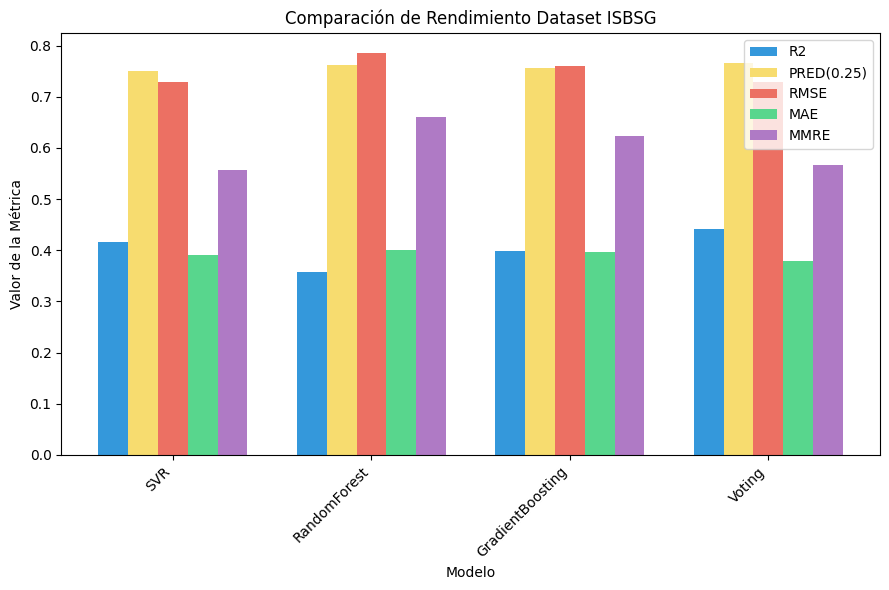

In [ ]:
metricas = ['R2', 'PRED(0.25)', 'RMSE', 'MAE', 'MMRE']
colores = ['#3498DB', '#F7DC6F','#EC7063', '#58D68D', '#AF7AC5']

num_modelos = len(score_result)
ancho_barra = 0.15
x = range(num_modelos)

plt.figure(figsize=(9, 6))

# Crear un gráfico de barras para cada métrica
for i, metrica in enumerate(metricas):
    # Calcular la posición para las barras de esta métrica
    posiciones_x = [pos + i * ancho_barra for pos in x]

    # Obtener los valores de la métrica actual
    valores_metrica = score_result[metrica]

    # Crear las barras para la métrica actual
    plt.bar(
        posiciones_x,
        valores_metrica,
        width=ancho_barra,
        label=metrica,
        color=colores[i],
    )

# Personalizar el gráfico
plt.xlabel('Modelo')
plt.ylabel('Valor de la Métrica')
plt.title('Comparación de Rendimiento Dataset ISBSG')
plt.xticks([pos + (len(metricas) - 1) * ancho_barra / 2 for pos in x], score_result['Modelo'], rotation=45, ha="right")
plt.legend(loc='upper right')

# Mostrar el gráfico combinado
plt.tight_layout()
plt.show()

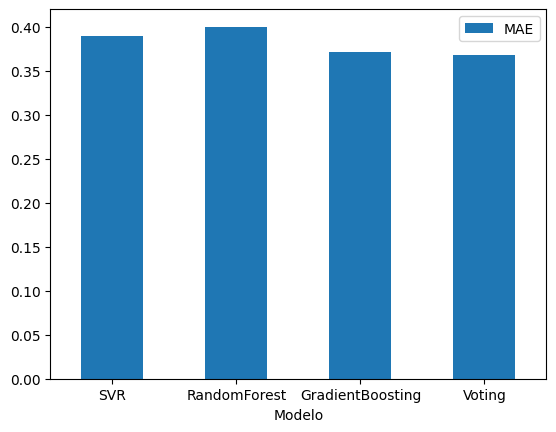

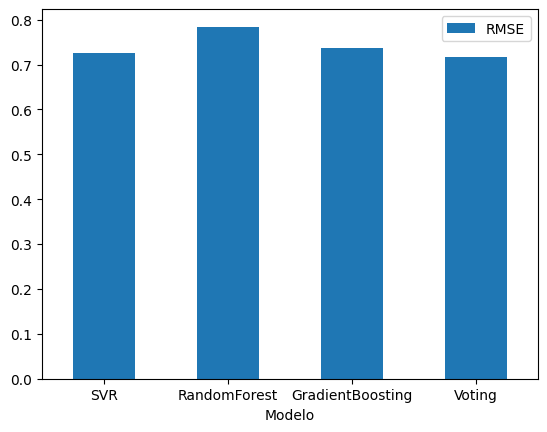

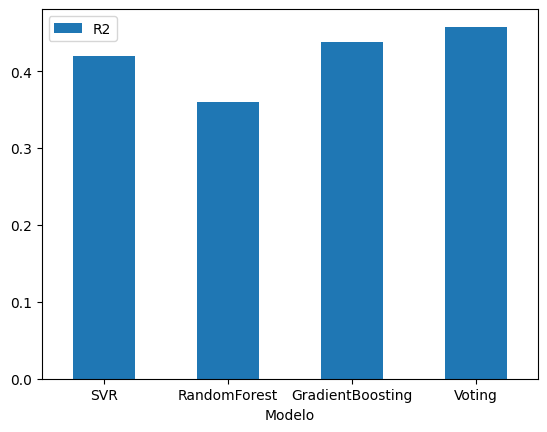

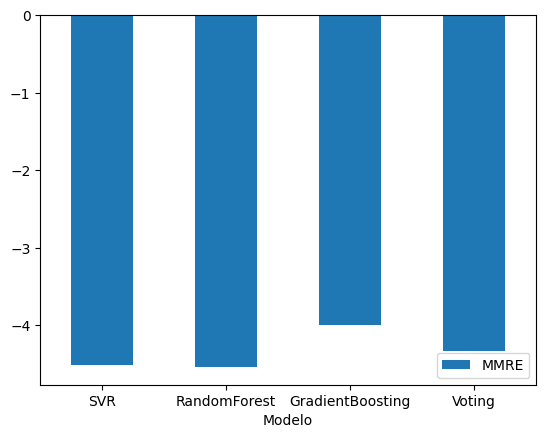

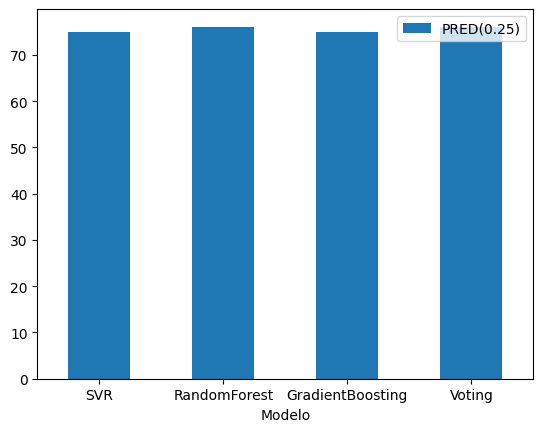

In [ ]:
variables=list(score_result)
variables.pop(0)

for var in variables:
  score_result.plot.bar(x='Modelo', y=var, rot=0)